In [1]:
#pip install jyquickhelper
from jyquickhelper import add_notebook_menu  
add_notebook_menu()

In [2]:
import sys
print(sys.executable)

C:\Users\belaziw\Anaconda3\envs\new_env\python.exe


## <div class="alert alert-info"><font color='dimgray'>I. Présentation du projet N°7</font></div>

### <div class="alert alert-info"><font color='dimgray'>I.1 Introduction  </font> </div>

<div class="alert alert-success">

Notre entreprise, **Prêt à dépenser**, se positionne comme un acteur innovant en offrant des solutions de crédit à la consommation. Nous nous adressons spécifiquement à une clientèle peu ou pas du tout familière avec le monde des prêts, une niche souvent négligée par les institutions financières traditionnelles. Notre objectif est de combler cette lacune tout en assurant une gestion des risques efficace et éclairée. Face à ce défi, l'analyse de données se présente comme un outil incontournable pour orienter nos décisions et stratégies.

</div>

### <div class="alert alert-info"><font color='dimgray'>I.2 Enjeux  </font> </div>

<div class="alert alert-success">

L'enjeu principal de notre projet est double. D'une part, il s'agit de développer un outil de **scoring crédit** sophistiqué et fiable, capable de calculer la probabilité de remboursement d'un prêt par un client, et ainsi d'optimiser nos décisions d'octroi de crédit. D'autre part, en adéquation avec les valeurs de transparence et de confiance que nous souhaitons véhiculer, il est essentiel de rendre ce processus compréhensible et accessible à nos clients. Cette démarche vise non seulement à renforcer la confiance de nos clients mais aussi à répondre aux normes réglementaires et éthiques de plus en plus strictes dans le secteur financier.
    
</div>

### <div class="alert alert-info"><font color='dimgray'>I.3 Contexte  </font> </div>

<div class="alert alert-success">

Actuellement, le marché du crédit à la consommation est en pleine mutation, avec une demande croissante pour des solutions de financement adaptées à des profils clients diversifiés, notamment ceux sans historique de crédit établi. Cette situation crée un terrain fertile pour l'innovation, mais présente également des défis significatifs en termes d'évaluation des risques. Dans ce contexte, l'utilisation de méthodes de data science et d'intelligence artificielle pour le scoring de crédit devient une nécessité pour rester compétitifs et efficaces.

</div>

### <div class="alert alert-info"><font color='dimgray'>I.4 Problématique  </font> </div>

<div class="alert alert-success">

La problématique centrale de notre projet se concentre sur la question suivante : Comment développer un modèle de scoring de crédit à la fois précis et transparent pour les individus ayant peu ou pas d'historique de prêt, afin de maximiser à la fois la réduction des risques pour l'entreprise et la satisfaction des clients ?

 </div>

### <div class="alert alert-info"><font color='dimgray'>I.5 Objectifs  </font> </div>

<div class="alert alert-success">

Pour répondre à cette problématique, nous avons défini les objectifs suivants :
    
1. **Développement d'un Modèle de Scoring :** Construire un modèle prédictif robuste pour évaluer la probabilité de remboursement d'un prêt par un client, en tenant compte des spécificités de notre clientèle cible. 
    
2. **Création d'un Dashboard Interactif :** Développer un outil de visualisation et d'interprétation des scores de crédit, destiné à nos gestionnaires de la relation client, afin de faciliter la communication et la transparence avec nos clients.
    
3. **Mise en Production et API :** Déployer le modèle et le dashboard via une API assurant ainsi une accessibilité et une efficacité maximales.   
   
4. **Suivi et Maintenance :** Mettre en place une stratégie de suivi continu de la performance des modèles et de maintenance prédictive, pour garantir la fiabilité et l'actualité de nos outils de décision.    
</div>

## <div class="alert alert-info"><font color='dimgray'> II. Import des Librairies d'Analyse</font> </div>

<div class="alert alert-success">
    
Importons dans un premier temps l'ensemble des librairies qui vont nous servir durant l'entièreté de ce Projet.</div>

<div class="alert alert-success">
    
**Traitement et Analyse de Données**</div>

In [3]:
import pandas as pd  # Manipulation et analyse de données
import numpy as np  # Calcul scientifique
import scipy.stats as st  # Calculs statistiques
import missingno as msno  # Visualisation des données manquantes
from os import listdir  # Pour lister les fichiers d'un dossier

# Configurations globales pour pandas
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.max_colwidth', None)

<div class="alert alert-success">
    
**Visualisation de Données**</div>

In [4]:
import matplotlib.pyplot as plt  # Visualisation graphique
import seaborn as sns  # Visualisation statistique basée sur matplotlib
import plotly.graph_objs as go  # Plotly pour la création de graphiques interactifs

<div class="alert alert-success">
    
**Configuration**</div>

In [5]:
#Système management
import os  # Interaction avec le système d'exploitation

## <div class="alert alert-info"><font color='dimgray'>III. Fonctions  </font> </div>

In [6]:
def stats_datasets(chemin_dossier):
    stats = []

    for fichier in os.listdir(chemin_dossier):
        if fichier.endswith('.csv'):  # Assurez-vous que le fichier est un CSV
            chemin_fichier = os.path.join(chemin_dossier, fichier)
            print(chemin_fichier)
            df = pd.read_csv(chemin_fichier, encoding = 'utf8')
            print(df.shape)
            nb_lignes = df.shape[0]
            nb_colonnes = df.shape[1]
            pourcentage_remplissage = (df.count().sum() / (nb_lignes * nb_colonnes)) * 100

            stats.append({
                'Nom du Dataset': fichier,
                'Nombre de Lignes': nb_lignes,
                'Nombre de Colonnes': nb_colonnes,
                'Pourcentage de Remplissage Total': pourcentage_remplissage
            })

    return pd.DataFrame(stats)

In [7]:
def test_remplissage(data):

    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de remplissage", "Nombre de valeurs manquantes"]).sort_values(by="Taux de remplissage", ascending=False)

In [8]:
def display_histplot(data, x=None, y=None, title='Histplot', figsize=(8, 6), kde=False, hue=None,
                     bins='auto'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.histplot(data=data, x=x, y=y, kde=kde, hue=hue, bins=bins)
    plt.show()

In [9]:
def data_train_category(data, column, limit=None):
    """
    Affiche le pourcentage d'échec de remboursement (TARGET = 1) pour une colonne catégorielle sélectionnée.

    :param data: DataFrame contenant les données.
    :param column: La colonne catégorielle sur laquelle effectuer l'analyse.
    :param limit: Limite optionnelle sur le nombre de catégories à afficher.
    """

    # Grouper les données par la colonne spécifiée et calculer la moyenne de 'TARGET' pour chaque catégorie
    grouped_data = data[[column, TARGET]].groupby(column).mean().reset_index()

    # Trier les données par le pourcentage d'échec de remboursement, en ordre décroissant
    grouped_data = grouped_data.sort_values(by=TARGET, ascending=False)

    # Déterminer les catégories et leur nombre
    categories = grouped_data[column].unique()
    n_categories = len(categories)
    avg_len = sum(len(cat) for cat in categories) / n_categories

    # Ajuster la rotation des étiquettes sur l'axe X si les noms des catégories sont longs
    xrotation = 70 if avg_len > 4 else 0
    
    # Ajuster la taille du graphique en fonction du nombre de catégories
    figsize = (6, 6) if n_categories < 4 else (12, 6)

    # Afficher le graphique à barres pour le pourcentage d'échec de remboursement
    display_barplot(grouped_data, x=column, y=TARGET, xrotation=xrotation, figsize=figsize,
                    title=f"Échec de remboursement (TARGET = 1) par {column}", ylabel="Pourcentage d'échec de remboursement")


In [10]:
# Display barplot
def display_barplot(data=None, x=None, y=None, title='Barplot', figsize=(8, 6),
                    order=None, palette=None, xrotation=0, ylabel=None):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.barplot(data=data, x=x, y=y, order=order, palette=palette)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.xticks(rotation=xrotation)
    plt.show()

<div class="alert alert-success">
 
Dans le cadre de ce projet, **Prêt à dépenser** met à notre disposition un ensemble de dataSets.
    
</div>

## <div class="alert alert-info"><font color='dimgray'>IV Charger les données et Exploration Préliminaire  </font> </div>

![home_credit_datasets](home_credit_datasets.png)

![image_modele_donnees](image_modele_donnees.png)

In [11]:
# Chemin vers votre dossier contenant les datasets
chemin_dossier ="C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk"
# Liste de jeux de données
nom_dataset = os.listdir(chemin_dossier)

In [12]:
# Conversion de la liste en DataFrame
df_nom_dataset = pd.DataFrame(nom_dataset, columns=['Nom du Dataset'])

In [13]:
df_nom_dataset

Nom du Dataset
0                application_test.csv
1               application_train.csv
2                          bureau.csv
3                  bureau_balance.csv
4             credit_card_balance.csv
5  HomeCredit_columns_description.csv
6           installments_payments.csv
7                POS_CASH_balance.csv
8            previous_application.csv
9               sample_submission.csv

In [14]:
df_stats = stats_datasets(chemin_dossier)

C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\application_test.csv
(48744, 121)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\application_train.csv
(307511, 122)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\bureau.csv
(1716428, 17)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\bureau_balance.csv
(27299925, 3)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\credit_card_balance.csv
(3840312, 23)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk\HomeCredit_columns_description.csv
(219, 5)
C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/L

In [15]:
df_stats

Nom du Dataset  Nombre de Lignes  Nombre de Colonnes  \
0                application_test.csv             48744                 121   
1               application_train.csv            307511                 122   
2                          bureau.csv           1716428                  17   
3                  bureau_balance.csv          27299925                   3   
4             credit_card_balance.csv           3840312                  23   
5  HomeCredit_columns_description.csv               219                   5   
6           installments_payments.csv          13605401                   8   
7                POS_CASH_balance.csv          10001358                   8   
8            previous_application.csv           1670214                  37   
9               sample_submission.csv             48744                   2   

   Pourcentage de Remplissage Total  
0                         76.188313  
1                         75.604058  
2                         86.497448  
3                        100.000000  
4                         93.345926  
5                         87.853881  
6                         99.994662  
7                         99.934811  
8                         82.023123  
9                        100.000000

<div class="alert alert-success">
 
**Brève Description de Chaque Table**
    
**1. application_{train|test}.csv :**
Il s'agit de la table principale, divisée en deux fichiers pour le Train (avec TARGET) et le Test (sans TARGET).
Données statiques pour toutes les demandes. Une ligne représente un prêt.
    
**2. bureau.csv :**
Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au Bureau de crédit (pour les clients ayant un prêt dans le jeu de données).
Pour chaque prêt dans notre jeu de données, il y a autant de lignes que de crédits que le client avait au Bureau de crédit avant la date de la demande.
    
**3. bureau_balance.csv :**
Soldes mensuels des crédits antérieurs au Bureau de crédit.
Cette table contient une ligne pour chaque mois d'historique de chaque crédit antérieur signalé au Bureau de crédit. C'est-à-dire que la table contient (**prêts dans le jeu de données * **crédits antérieurs relatifs** * **mois où nous avons une historique observable pour les crédits antérieurs**) lignes.
    
**4. POS_CASH_balance.csv :**
Ce table fournit des informations détaillées sur l'historique des soldes mensuels pour des types spécifiques de prêts que les demandeurs ont eus avec Home Credit.     
Instantanés des soldes mensuels : La table enregistre les soldes (l'état du compte) mois par mois pour chaque prêt. Ces "instantanés" montrent comment le solde du prêt a évolué au fil du temps, offrant un aperçu de la manière dont le demandeur gère ses remboursements de prêt.   
Types de prêts concernés : Les prêts couverts par cette table incluent les prêts POS (Point of Sale) et les prêts en espèces. Les prêts POS sont souvent liés à l'achat de biens de consommation, où le crédit est accordé au point de vente. Les prêts en espèces sont, comme leur nom l'indique, des prêts où les fonds sont fournis directement en espèces au demandeur. La table contient un nombre de lignes égal au nombre total de prêts dans l'échantillon multiplié par le nombre de crédits antérieurs relatifs à ces prêts chez Home Credit, multiplié par le nombre de mois d'historique observable pour chaque crédit.    
    
**5. credit_card_balance.csv::**
Cette table contient des informations détaillées sur l'historique mensuel des soldes des cartes de crédit que les demandeurs ont eues avec Home Credit.
cette table enregistre les soldes pour chaque mois pour chaque carte de crédit que le demandeur a eue avec Home Credit. Cela permet de suivre l'évolution du solde de la carte de crédit au fil du temps, y compris les remboursements, les dépenses et l'accumulation de dettes.Toutes les informations de carte de crédit référencées dans cette table concernent des comptes gérés par Home Credit. Ainsi, même si un demandeur a des cartes de crédit ou des lignes de crédit auprès d'autres institutions financières, ces données ne sont pas incluses ici.Le nombre total de lignes dans la table est déterminé par le nombre de prêts dans l'échantillon, multiplié par le nombre de cartes de crédit antérieures liées à ces prêts chez Home Credit, et multiplié par le nombre de mois d'historique observable pour chaque carte de crédit.

**6. previous_application.csv:**
Toutes les demandes antérieures de prêts Home Credit des clients qui ont des prêts dans notre jeu de données. Il y a une ligne pour chaque demande antérieure liée aux prêts dans notre jeu de données.
    
**7. installments_payments.csv:**
Historique de remboursement pour les crédits précédemment déboursés chez Home Credit liés aux prêts dans notre jeu. Il y a une ligne pour chaque paiement qui a été effectué plus une ligne pour chaque paiement manqué. Une ligne est équivalente à un paiement d'une échéance OU une échéance correspondant à un paiement d'un crédit Home Credit antérieur lié aux prêts dans notre jeu de données.
    
**8 HomeCredit_columns_description.csv :**
Ce fichier contient les descriptions des colonnes dans les différents fichiers de données.
    
</div>

### <div class="alert alert-info"><font color='dimgray'>IV.1 Lecture des données  </font> </div>

In [16]:
df_nom_dataset

Nom du Dataset
0                application_test.csv
1               application_train.csv
2                          bureau.csv
3                  bureau_balance.csv
4             credit_card_balance.csv
5  HomeCredit_columns_description.csv
6           installments_payments.csv
7                POS_CASH_balance.csv
8            previous_application.csv
9               sample_submission.csv

<div class="alert alert-success">
 
Il 10 fichiers :

- 1 fichier principal pour l'entraînement (avec la cible) : application_train.
    
- 1 fichier principal pour le test (sans la cible): application_test.
    
- 1 fichier de soumission d'exemples.
    
- 7 autres fichiers contenant des informations supplémentaires sur chaque prêt.
    
</div>

In [17]:
application_test = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/application_test.csv",
    low_memory=False)
application_train = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/application_train.csv",
    low_memory=False)
bureau = pd.read_csv("C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/bureau.csv",
                     low_memory=False)
bureau_balance = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/bureau_balance.csv",
    low_memory=False)
credit_card_balance = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/credit_card_balance.csv",
    low_memory=False)
HomeCredit_columns_description = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/HomeCredit_columns_description.csv", low_memory=True)
installments_payments = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/installments_payments.csv",
    low_memory=False)
POS_CASH_balance = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/POS_CASH_balance.csv",
    low_memory=False)
previous_application = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/previous_application.csv",
    low_memory=False)
sample_submission = pd.read_csv(
    "C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/sample_submission.csv",
    low_memory=False)

### <div class="alert alert-info"><font color='dimgray'>IV.2 Aperçu général: jeu de données application_train  </font> </div>

In [18]:
print('Taille de jeu de données: ', application_test.shape)
application_train.head()

Taille de jeu de données:  (48744, 121)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<div class="alert alert-success">
 
La base de données **application_train** rassemble les détails relatifs aux demandes de prêts. Dans cette base, chaque demande est représentée par une ligne unique et est identifiable par l'identifiant **SK_ID_CURR**. Elle constitue la base d'entraînement. La variable **TARGET** figure comme la variable cible : 
    
Une valeur de **0 signifie que le prêt a été remboursé**, tandis qu'une valeur de **1 indique un prêt non remboursé**.
    
</div>

In [19]:
# Visualisation des description du DataFrame : 

HomeCredit_columns_description =HomeCredit_columns_description.drop('index', axis=1)
HomeCredit_columns_description_train_test = HomeCredit_columns_description[HomeCredit_columns_description['Table'] == 'application_{train|test}.csv']

In [20]:
HomeCredit_columns_description_train_test.shape

(122, 4)

In [21]:
HomeCredit_columns_description_train_test

Table                           Row  \
0    application_{train|test}.csv                   OWN_CAR_AGE   
10   application_{train|test}.csv       HOUR_APPR_PROCESS_START   
12   application_{train|test}.csv                    DAYS_BIRTH   
13   application_{train|test}.csv              NAME_INCOME_TYPE   
18   application_{train|test}.csv                    AMT_CREDIT   
26   application_{train|test}.csv              FLAG_DOCUMENT_10   
27   application_{train|test}.csv              FLAG_DOCUMENT_11   
28   application_{train|test}.csv              FLAG_DOCUMENT_12   
29   application_{train|test}.csv              FLAG_DOCUMENT_13   
30   application_{train|test}.csv              FLAG_DOCUMENT_14   
31   application_{train|test}.csv              FLAG_DOCUMENT_15   
32   application_{train|test}.csv              FLAG_DOCUMENT_16   
33   application_{train|test}.csv              FLAG_DOCUMENT_17   
34   application_{train|test}.csv              FLAG_DOCUMENT_18   
35   application_{train|test}.csv              FLAG_DOCUMENT_19   
36   application_{train|test}.csv               FLAG_DOCUMENT_2   
37   application_{train|test}.csv              FLAG_DOCUMENT_20   
38   application_{train|test}.csv              FLAG_DOCUMENT_21   
39   application_{train|test}.csv               FLAG_DOCUMENT_3   
40   application_{train|test}.csv               FLAG_DOCUMENT_4   
41   application_{train|test}.csv               FLAG_DOCUMENT_5   
42   application_{train|test}.csv               FLAG_DOCUMENT_6   
43   application_{train|test}.csv               FLAG_DOCUMENT_7   
44   application_{train|test}.csv               FLAG_DOCUMENT_8   
45   application_{train|test}.csv               FLAG_DOCUMENT_9   
46   application_{train|test}.csv                    FLAG_EMAIL   
47   application_{train|test}.csv                    FLAG_PHONE   
48   application_{train|test}.csv               FLAG_WORK_PHONE   
49   application_{train|test}.csv                    FLAG_MOBIL   
50   application_{train|test}.csv                FLAG_EMP_PHONE   
58   application_{train|test}.csv            NAME_FAMILY_STATUS   
60   application_{train|test}.csv               FLAG_OWN_REALTY   
61   application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
62   application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
63   application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
64   application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
65   application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
66   application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
69   application_{train|test}.csv                  FLAG_OWN_CAR   
71   application_{train|test}.csv               AMT_GOODS_PRICE   
73   application_{train|test}.csv                   CODE_GENDER   
76   application_{train|test}.csv        DAYS_LAST_PHONE_CHANGE   
79   application_{train|test}.csv             DAYS_REGISTRATION   
80   application_{train|test}.csv               DAYS_ID_PUBLISH   
81   application_{train|test}.csv                 DAYS_EMPLOYED   
82   application_{train|test}.csv               CNT_FAM_MEMBERS   
83   application_{train|test}.csv      DEF_30_CNT_SOCIAL_CIRCLE   
84   application_{train|test}.csv      DEF_60_CNT_SOCIAL_CIRCLE   
85   application_{train|test}.csv      OBS_30_CNT_SOCIAL_CIRCLE   
86   application_{train|test}.csv      OBS_60_CNT_SOCIAL_CIRCLE   
90   application_{train|test}.csv                    SK_ID_CURR   
100  application_{train|test}.csv            NAME_CONTRACT_TYPE   
101  application_{train|test}.csv              AMT_INCOME_TOTAL   
105  application_{train|test}.csv           NAME_EDUCATION_TYPE   
106  application_{train|test}.csv                   AMT_ANNUITY   
112  application_{train|test}.csv                APARTMENTS_AVG   
113  application_{train|test}.csv               APARTMENTS_MEDI   
114  application_{train|test}.csv               APARTMENTS_MODE   
115  application_{train|test}.csv              BASEMENTAREA_AVG   
116  app

In [22]:
#compter le type de variables
data_type_train=application_train.dtypes.value_counts(normalize=True)
data_type_train

float64    0.532787
int64      0.336066
object     0.131148
Name: proportion, dtype: float64

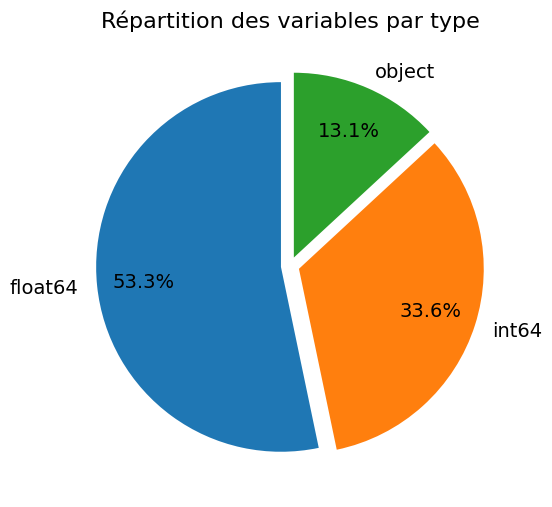

In [23]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_train.index
explode = (0.05, 0.05, 0.05)
plt.pie(x=data_type_train, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

<div class="alert alert-success">

D'après les résultats, il semble que le jeu de données contienne principalement des données de type **"float64"** et **"int64"**, représentant respectivement environ **53%** et **34%** des données. Les types **"object"** semblent être moins représentés, représentant environ **13%** des données.</div>

### <div class="alert alert-info"><font color='dimgray'> IV.2.1 Description et exploration des données</font> </div> 

In [24]:
def pourcentage_valeurs_manquantes(data):
    """
    Calcule le pourcentage de valeurs manquantes pour chaque colonne du DataFrame.

    :param data: pandas DataFrame.
    :return: DataFrame avec le nom de la colonne et le pourcentage de valeurs manquantes, trié de manière décroissante.
    """
    # Calcul du pourcentage de valeurs manquantes pour chaque colonne
    pourcentage = (data.isnull().sum() / len(data)) * 100

    # Création d'un DataFrame pour les pourcentages
    pourcentage_valeurs_manquantes = pd.DataFrame({'Nom_Variable': pourcentage.index, 
                                                   'Pourcentage': pourcentage.values})

    # Tri des résultats de manière décroissante
    pourcentage_valeurs_manquantes = pourcentage_valeurs_manquantes.sort_values(by='Pourcentage', ascending=False)

    return pourcentage_valeurs_manquantes


In [25]:
# Affichage des résultats
tableau_valeurs_manquantes_train = pourcentage_valeurs_manquantes(application_train)
tableau_valeurs_manquantes_train

Nom_Variable  Pourcentage
76                COMMONAREA_MEDI    69.872297
48                 COMMONAREA_AVG    69.872297
62                COMMONAREA_MODE    69.872297
70       NONLIVINGAPARTMENTS_MODE    69.432963
56        NONLIVINGAPARTMENTS_AVG    69.432963
84       NONLIVINGAPARTMENTS_MEDI    69.432963
86             FONDKAPREMONT_MODE    68.386172
68          LIVINGAPARTMENTS_MODE    68.354953
54           LIVINGAPARTMENTS_AVG    68.354953
82          LIVINGAPARTMENTS_MEDI    68.354953
52                  FLOORSMIN_AVG    67.848630
66                 FLOORSMIN_MODE    67.848630
80                 FLOORSMIN_MEDI    67.848630
75               YEARS_BUILD_MEDI    66.497784
61               YEARS_BUILD_MODE    66.497784
47                YEARS_BUILD_AVG    66.497784
21                    OWN_CAR_AGE    65.990810
81                  LANDAREA_MEDI    59.376738
67                  LANDAREA_MODE    59.376738
53                   LANDAREA_AVG    59.376738
73              BASEMENTAREA_MEDI    58.515956
45               BASEMENTAREA_AVG    58.515956
59              BASEMENTAREA_MODE    58.515956
41                   EXT_SOURCE_1    56.381073
71             NONLIVINGAREA_MODE    55.179164
57              NONLIVINGAREA_AVG    55.179164
85             NONLIVINGAREA_MEDI    55.179164
77                 ELEVATORS_MEDI    53.295980
49                  ELEVATORS_AVG    53.295980
63                 ELEVATORS_MODE    53.295980
89             WALLSMATERIAL_MODE    50.840783
72                APARTMENTS_MEDI    50.749729
44                 APARTMENTS_AVG    50.749729
58                APARTMENTS_MODE    50.749729
78                 ENTRANCES_MEDI    50.348768
50                  ENTRANCES_AVG    50.348768
64                 ENTRANCES_MODE    50.348768
55                 LIVINGAREA_AVG    50.193326
69                LIVINGAREA_MODE    50.193326
83                LIVINGAREA_MEDI    50.193326
87                 HOUSETYPE_MODE    50.176091
65                 FLOORSMAX_MODE    49.760822
79                 FLOORSMAX_MEDI    49.760822
51                  FLOORSMAX_AVG    49.760822
60   YEARS_BEGINEXPLUATATION_MODE    48.781019
74   YEARS_BEGINEXPLUATATION_MEDI    48.781019
46    YEARS_BEGINEXPLUATATION_AVG    48.781019
88                 TOTALAREA_MODE    48.268517
90            EMERGENCYSTATE_MODE    47.398304
28                OCCUPATION_TYPE    31.345545
43                   EXT_SOURCE_3    19.825307
116    AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
117     AMT_REQ_CREDIT_BUREAU_DAY    13.501631
118    AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
119     AMT_REQ_CREDIT_BUREAU_MON    13.501631
120     AMT_REQ_CREDIT_BUREAU_QRT    13.501631
121    AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
11                NAME_TYPE_SUITE     0.420148
91       OBS_30_CNT_SOCIAL_CIRCLE     0.332021
92       DEF_30_CNT_SOCIAL_CIRCLE     0.332021
93       OBS_60_CNT_SOCIAL_CIRCLE     0.332021
94       DEF_60_CNT_SOCIAL_CIRCLE     0.332021
42                   EXT_SOURCE_2     0.214626
10                AMT_GOODS_PRICE     0.090403
9                     AMT_ANNUITY     0.003902
29                CNT_FAM_MEMBERS     0.000650
95         DAYS_LAST_PHONE_CHANGE     0.000325
6                    CNT_CHILDREN     0.000000
102               FLAG_DOCUMENT_8     0.000000
2              NAME_CONTRACT_TYPE     0.000000
3                     CODE_GENDER     0.000000
4                    FLAG_OWN_CAR     0.000000
96                FLAG_DOCUMENT_2     0.000000
97                FLAG_DOCUMENT_3     0.000000
98                FLAG_DOCUMENT_4     0.000000
99                FLAG_DOCUMENT_5     0.000000
100               FLAG_DOCUMENT_6     0.000000
101               FLAG_DOCUMENT_7     0.000000
103               FLAG_DOCUMENT_9     0.000000
115              FLAG_DOCUMENT_21     0.000000
104              FLAG_DOCUMENT_10     0.000000
105              FLAG_DOCUMENT_11     0.000000
5                 FLAG_OWN_REALTY     0.000000
107              FLAG_DOCUMENT_13     0.000000
108              FLAG_DOCU

**Il y à 67 variables sur 122 qui possèdent des valeurs manquantes.**

<BarContainer object of 122 artists>

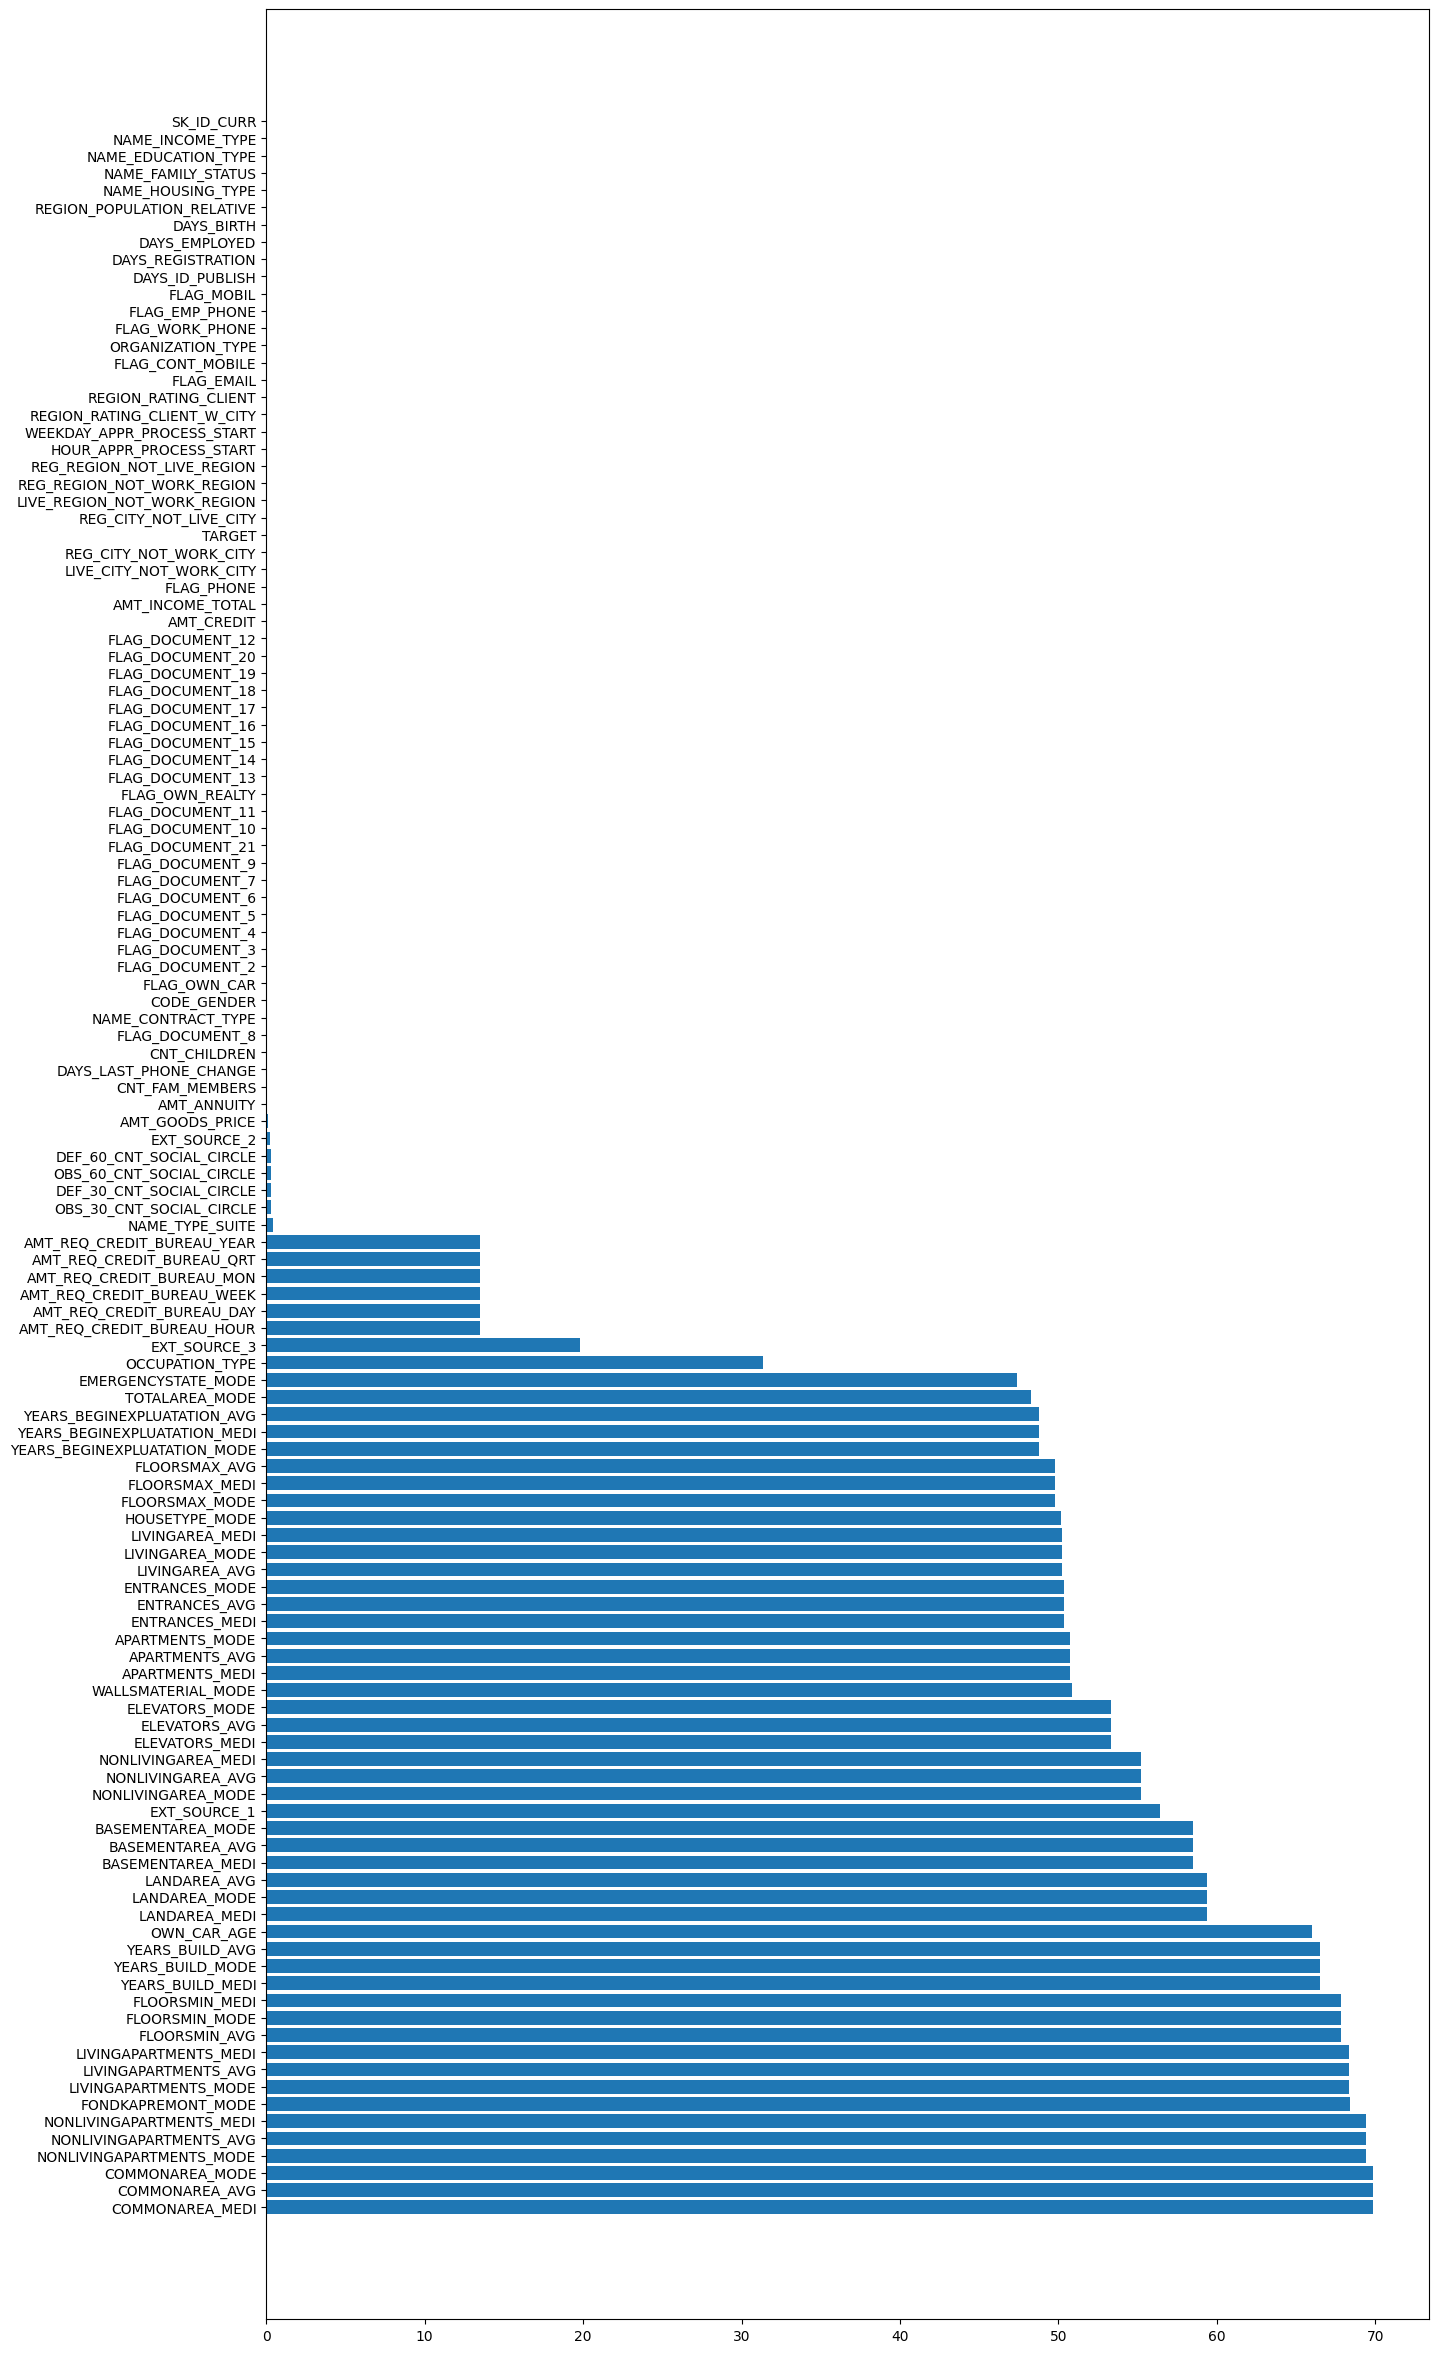

In [26]:
plt.figure(figsize=(15,30))
plt.barh(tableau_valeurs_manquantes_train["Nom_Variable"],tableau_valeurs_manquantes_train["Pourcentage"] )

**Analyse de valeurs manquantes**

<div class="alert alert-success">

L'analyse des valeurs manquantes est une étape cruciale dans l'analyse de données. En effet, les valeurs manquantes peuvent avoir un impact sur les résultats d'une étude et peuvent biaiser les analyses statistiques. Pour cette raison, il est important de traiter les valeurs manquantes avant de procéder à toute analyse exploratoire.</div>

<Axes: >

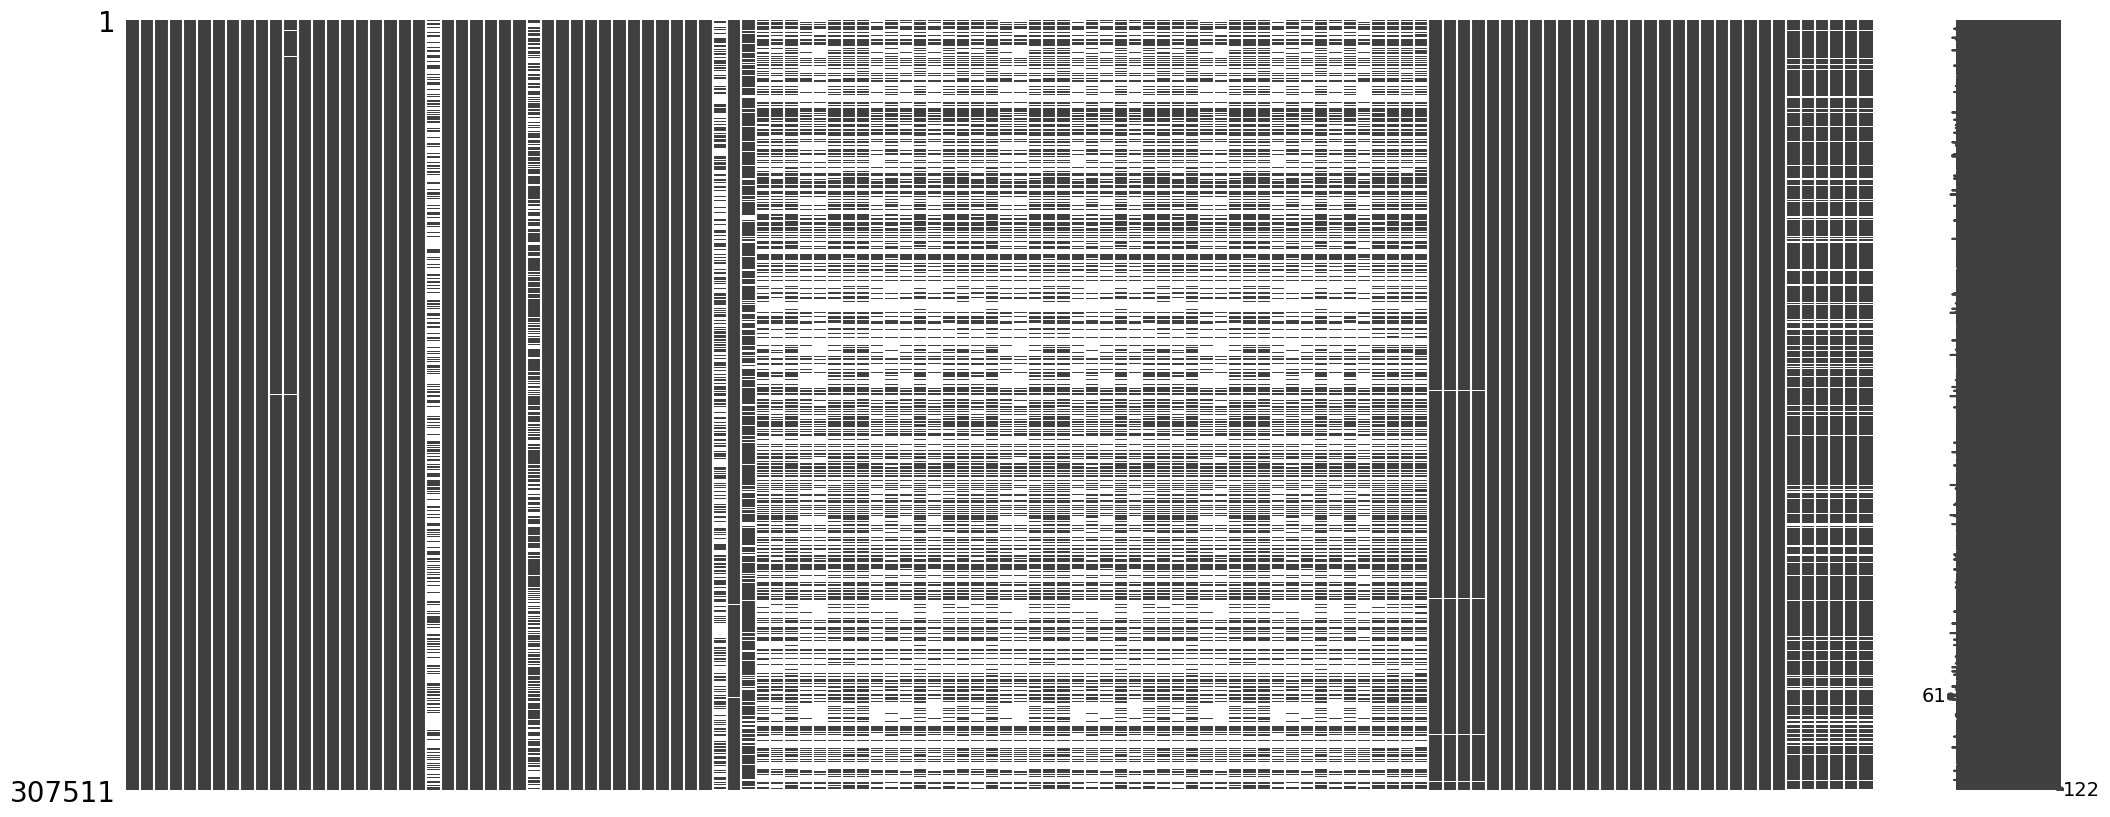

In [27]:
# Visualiser les données manquantes 
msno.matrix(application_train)

<div class="alert alert-success">

- Ces résultats indiquent que certaines variables ont des données manquantes plus fréquemment que d'autres, ce qui peut affecter la qualité de l'analyse de données. Il peut être nécessaire de traiter ces valeurs manquantes avant de procéder à toute analyse exploratoire/modélisation pour obtenir des résultats précis et fiables.</div>

**Données manquantes par ligne**

In [28]:
taux_remplissage_rows_train=(application_train.notnull().sum(axis=1)/application_train.shape[1])*100

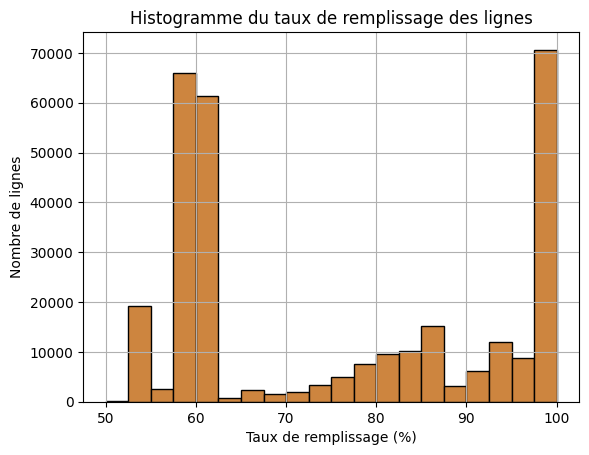

In [29]:
# Afficher un histogramme du taux de remplissage des lignes
plt.hist(taux_remplissage_rows_train.sort_values(), bins=20, color="peru", edgecolor='black')

# Ajouter un titre et des labels aux axes
plt.title('Histogramme du taux de remplissage des lignes')
plt.xlabel('Taux de remplissage (%)')
plt.ylabel('Nombre de lignes')

# Afficher la grille
plt.grid(True)

# Afficher le graphe
plt.show()

<div class="alert alert-success">
- Ce graphique offre une vue utile de la complétude des données.
    
- Il y a deux pics principaux dans la distribution des taux de remplissage.
    
- Le premier pic se situe dans l'intervalle de taux de remplissage de 50% à 60%, avec le nombre de lignes le plus élevé observé dans ce graphique. Le second pic, moins prononcé que le premier, se trouve dans l'intervalle de 90% à 100%.
    
- Il y a un nombre significatif de lignes qui ont un taux de remplissage inférieur à 70%. 
    
- En revanche, il y a également un grand nombre de lignes qui ont un taux de remplissage de 100%, indiquant que toutes les données sont présentes pour ces lignes.
</div>

**Valeurs Aberrantes**

In [30]:
# Description colonnes num et catg
print("\nColonnes numériques: ")
display(application_train.describe(include=[np.number]))
print("\ncolonnes catégorielles: ")
display(application_train.describe(exclude=[np.number]))


Colonnes numériques: 


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       


colonnes catégorielles: 


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

<div class="alert alert-success">Nous avons créé une fonction pour détecter les valeurs aberrantes en utilisant la méthode interquartile. </div>

In [31]:
def pourcentage_valeurs_aberrantes(data):
    """
    Calcule le pourcentage de valeurs aberrantes pour chaque colonne numérique du DataFrame.

    :param data: pandas DataFrame.
    :return: DataFrame avec le nom de la colonne et le pourcentage de valeurs aberrantes, trié de manière décroissante.
    """
    resultats = []

    # Itération sur chaque colonne numérique
    for col in data.select_dtypes(include=['number']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcul des bornes pour détecter les valeurs aberrantes
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Calcul du pourcentage de valeurs aberrantes
        total = data[col].count()
        nbr_aberrantes = data[(data[col] < borne_inf) | (data[col] > borne_sup)][col].count()
        pourcentage = (nbr_aberrantes / total) * 100

        resultats.append({'Nom_Colonne': col, 'Pourcentage Aberrantes': pourcentage})

    # Création d'un DataFrame pour les résultats
    pourcentage_aberrantes = pd.DataFrame(resultats)

    # Tri des résultats de manière décroissante
    pourcentage_aberrantes = pourcentage_aberrantes.sort_values(by='Pourcentage Aberrantes', ascending=False)

    return pourcentage_aberrantes

<div class="alert alert-success">La méthode de l'IQR examine chaque variable séparément pour détecter les valeurs aberrantes, puis elle les supprime pour chaque variable.Elle ne considère pas l'effet de la suppression des valeurs aberrantes d'une variable sur les autres variables.</div>

<div class="alert alert-success">Toutefois, nous avons décidé de ne pas les éliminer afin d'analyser l'impact de ces valeurs sur les performances de nos modèles de machine learning d'une part et d'autres part utiliser la quantification des valeurs aberrantes juste pour bien choisir méthode d'imputaion (médiane ou moyenne).</div>

In [32]:
tableau_valeurs_aberrantes_train = pourcentage_valeurs_aberrantes(application_train)
tableau_valeurs_aberrantes_train

Nom_Colonne  Pourcentage Aberrantes
20           REGION_RATING_CLIENT               26.186706
21    REGION_RATING_CLIENT_W_CITY               25.373726
9                   DAYS_EMPLOYED               23.484363
27         REG_CITY_NOT_WORK_CITY               23.045354
15                FLAG_WORK_PHONE               19.936848
104     AMT_REQ_CREDIT_BUREAU_QRT               19.013730
14                 FLAG_EMP_PHONE               18.011063
28        LIVE_CITY_NOT_WORK_CITY               17.955455
44        NONLIVINGAPARTMENTS_AVG               16.574997
103     AMT_REQ_CREDIT_BUREAU_MON               16.451247
72       NONLIVINGAPARTMENTS_MEDI               16.186687
58       NONLIVINGAPARTMENTS_MODE               15.132398
59             NONLIVINGAREA_MODE               13.652424
73             NONLIVINGAREA_MEDI               12.518410
45              NONLIVINGAREA_AVG               12.004730
76       DEF_30_CNT_SOCIAL_CIRCLE               11.473784
84                FLAG_DOCUMENT_6                8.805539
64                COMMONAREA_MEDI                8.639337
36                 COMMONAREA_AVG                8.572415
50                COMMONAREA_MODE                8.568098
57                LIVINGAREA_MODE                8.556356
71                LIVINGAREA_MEDI                8.427080
78       DEF_60_CNT_SOCIAL_CIRCLE                8.407778
43                 LIVINGAREA_AVG                8.172446
70          LIVINGAPARTMENTS_MEDI                8.145963
86                FLAG_DOCUMENT_8                8.137595
42           LIVINGAPARTMENTS_AVG                8.098693
1                          TARGET                8.072882
26         REG_CITY_NOT_LIVE_CITY                7.817281
56          LIVINGAPARTMENTS_MODE                7.675312
74                 TOTALAREA_MODE                7.600578
37                  ELEVATORS_AVG                7.255257
65                 ELEVATORS_MEDI                7.229494
60                APARTMENTS_MEDI                7.083526
32                 APARTMENTS_AVG                7.035325
46                APARTMENTS_MODE                6.864972
51                 ELEVATORS_MODE                6.776215
75       OBS_30_CNT_SOCIAL_CIRCLE                6.516036
77       OBS_60_CNT_SOCIAL_CIRCLE                6.383243
18                     FLAG_EMAIL                5.671992
33               BASEMENTAREA_AVG                5.636210
61              BASEMENTAREA_MEDI                5.634642
55                  LANDAREA_MODE                5.629958
41                   LANDAREA_AVG                5.513885
69                  LANDAREA_MEDI                5.501877
47              BASEMENTAREA_MODE                5.416719
24     REG_REGION_NOT_WORK_REGION                5.076892
6                 AMT_GOODS_PRICE                4.793756
12                    OWN_CAR_AGE                4.715917
3                AMT_INCOME_TOTAL                4.564064
25    LIVE_REGION_NOT_WORK_REGION                4.065871
67                 FLOORSMAX_MEDI                3.469458
39                  FLOORSMAX_AVG                3.375601
53                 FLOORSMAX_MODE                3.303752
48   YEARS_BEGINEXPLUATATION_MODE                3.221505
102    AMT_REQ_CREDIT_BUREAU_WEEK                3.209119
34    YEARS_BEGINEXPLUATATION_AVG                3.037383
62   YEARS_BEGINEXPLUATATION_MEDI                3.023415
7      REGION_POPULATION_RELATIVE                2.735512
66                 ENTRANCES_MEDI                2.549727
38                  ENTRANCES_AVG                2.542523
52                 ENTRANCES_MODE                2.515015
49               YEARS_BUILD_MODE                2.462557
5                     AMT_ANNUITY                2.440333
63               YEARS_BUILD_MEDI                2.207274
4                      AMT_CREDIT                2.133907
35                YEARS_BUILD_AVG                2.090795
23     REG_REGION_NOT_LIVE_REGION                1.514417
83                FL

<div class="alert alert-success">Toutefois, nous avons décidé de ne pas les éliminer afin d'analyser l'impact de ces 

- Les variables **REGION_RATING_CLIENT** et **REGION_RATING_CLIENT_W_CITY** ont un pourcentage élevé de valeurs aberrantes (plus de 25%).
    .
- **DAYS_EMPLOYED**, **REG_CITY_NOT_WORK_CITY**, **FLAG_WORK_PHONE** et plusieurs autres variables montrent également une proportion relativement élevée de valeurs aberrantes.
    
- Certaines variables, comme **DAYS_REGISTRATION**, **FLAG_CONT_MOBILE**, et **DAYS_LAST_PHONE_CHANGE** ont un faible pourcentage de valeurs aberrantes.
    
- Des variables comme **DAYS_BIRTH**, **EXT_SOURCE_2**, **EXT_SOURCE_3**, et d'autres affichent un pourcentage de 0% pour les valeurs aberrantes


</div>

#### <div class="alert alert-info"><font color='dimgray'> IV.2.1.1 Variable Cible (**TARGET**)</font> </div> 

<div class="alert alert-success">
 
**- TARGET :**

**0** : si le prêt a été remboursé à temps ==> Remboursé
    
**1** : si le client a rencontré des difficultés de paiement ==> Non Remboursé
    
</div>

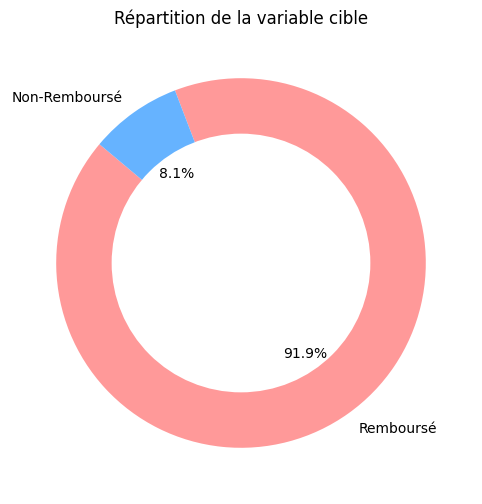

In [36]:
# Création d'un sous-ensemble pour compter les occurrences de chaque catégorie
count_train = application_train['TARGET'].replace({0: 'Remboursé', 1: 'Non-Remboursé'}).value_counts().to_frame().reset_index()

# Renommer les colonnes correctement
count_train.columns = ['Etat', 'Nombre']  # 'Etat' pour l'état de remboursement, 'Nombre' pour le nombre d'occurrences

# Définir les couleurs pour les différentes catégories
colors = ['#ff9999','#66b3ff']  # Rouge pour Non-Remboursé, Bleu pour Remboursé

# Création du graphique en anneau
plt.figure(figsize=(8, 6))
plt.pie(count_train['Nombre'], labels=count_train['Etat'], autopct='%1.1f%%', startangle=140, colors=colors)

# Ajout d'un cercle au centre pour transformer le pie chart en donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajout du titre et affichage du graphique
plt.title('Répartition de la variable cible')
plt.show()

# Nettoyage
del count_train



<div class="alert alert-success">
 
D'après ces informations, nous constatons qu'il s'agit d'un problème de classes déséquilibrées.
Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés.
Lorsque nous utiliserons des modèles d'apprentissage automatique plus sophistiqués, nous pourrons pondérer
les classes en fonction de leur représentation dans les données afin de refléter ce déséquilibre.
    
</div>

#### <div class="alert alert-info"><font color='dimgray'> IV.2.1.2 Matrice de corrélation (**TARGET**)</font> </div> 

**Variables catégorielles**

<div class="alert alert-success">
 
La matrice de corrélation **Phi-K** est une technique pour mesurer la corrélation entre des variables, y compris **les variables catégorielles et numériques**. Elle est particulièrement utile dans les situations où la matrice de corrélation classique, telle que celle basée sur le coefficient de Pearson, ne suffit pas, notamment lorsque les données ne sont pas normalement distribuées ou contiennent des variables catégorielles.
    
</div>

In [37]:
def identifier_et_convertir_colonnes_binaires(data):
    """
    Identifie et convertit automatiquement les colonnes binaires d'un DataFrame en variables catégorielles.

    :param data: pandas DataFrame.
    :return: DataFrame avec les colonnes binaires converties en catégorielles.
    """
    binary_cols = [col for col in data.columns if data[col].nunique() == 2]
    for col in binary_cols:
        data[col] = data[col].astype('category')

    return data

In [38]:
application_train["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [39]:
application_train= identifier_et_convertir_colonnes_binaires(application_train)

In [41]:
import phik
from phik import resources, report

In [42]:
def calculer_et_visualiser_phi_k_train(data, target_col):
    """
    Calcule et visualise la matrice de corrélation Phi-K pour les variables catégorielles d'un DataFrame,
    y compris la variable cible.

    :param data: DataFrame.
    :param target_col: Nom de la colonne cible.
    """
    # Identifier les variables catégorielles
    data_categorical = data.select_dtypes(include=['object', 'category'])

    if target_col not in data_categorical.columns and target_col in data.columns:
        data_categorical[target_col] = data[target_col].astype('category')

    # Calcul de la matrice de corrélation Phi-K
    phi_k_matrix = data_categorical.phik_matrix()

    # Visualisation de la matrice de corrélation Phi-K
    plt.figure(figsize=(12, 8))
    sns.heatmap(phi_k_matrix, annot=True, fmt=".2f", cmap='viridis')
    plt.title("Matrice de Corrélation Phi-K")
    plt.show()

    return phi_k_matrix

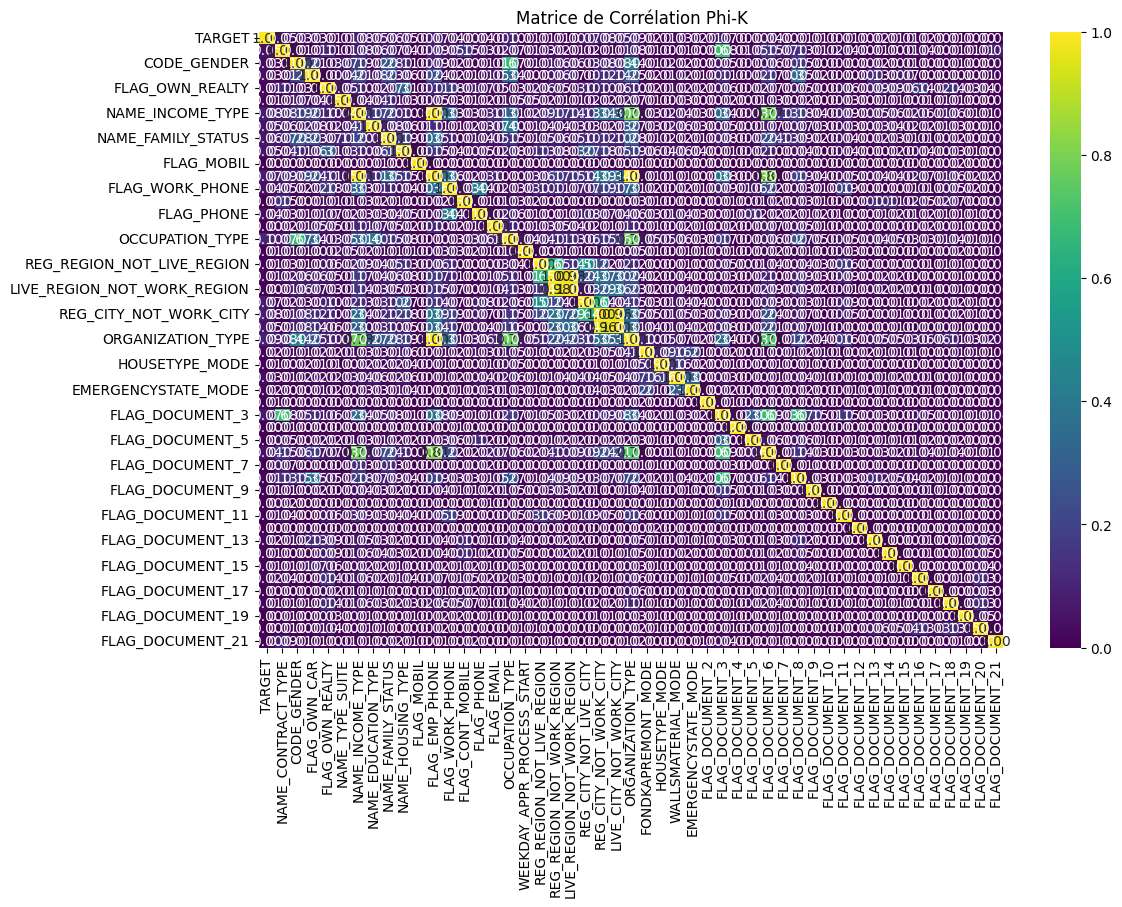

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  \
TARGET                       1.000000            0.048399     0.032921   
NAME_CONTRACT_TYPE           0.048399            1.000000     0.008381   
CODE_GENDER                  0.032921            0.008381     1.000000   
FLAG_OWN_CAR                 0.034179            0.005626     0.211085   
FLAG_OWN_REALTY              0.009212            0.105270     0.026719   
NAME_TYPE_SUITE              0.008746            0.013302     0.067596   
NAME_INCOME_TYPE             0.084831            0.082317     0.187035   
NAME_EDUCATION_TYPE          0.046954            0.055009     0.024767   
NAME_FAMILY_STATUS           0.056043            0.066888     0.275382   
NAME_HOUSING_TYPE            0.051107            0.037330     0.112993   
FLAG_MOBIL                   0.000000            0.000000     0.000000   
FLAG_EMP_PHONE               0.072087            0.086119     0.094927   
FLAG_WORK_PHONE              0.044678            0.052731     0.020841   
FLAG_CONT_MOBILE             0.000000            0.151734     0.003285   
FLAG_PHONE                   0.037258            0.033434     0.012152   
FLAG_EMAIL                   0.000000            0.016705     0.010882   
OCCUPATION_TYPE              0.102846            0.071103     0.672442   
WEEKDAY_APPR_PROCESS_START   0.005163            0.013267     0.008214   
REG_REGION_NOT_LIVE_REGION   0.008207            0.028942     0.014185   
REG_REGION_NOT_WORK_REGION   0.010486            0.024573     0.062348   
LIVE_REGION_NOT_WORK_REGION  0.003343            0.012100     0.063933   
REG_CITY_NOT_LIVE_CITY       0.069588            0.021118     0.029028   
REG_CITY_NOT_WORK_CITY       0.079946            0.006431     0.083000   
LIVE_CITY_NOT_WORK_CITY      0.050956            0.007297     0.080393   
ORGANIZATION_TYPE            0.089164            0.083438     0.438109   
FONDKAPREMONT_MODE           0.018009            0.009225     0.005936   
HOUSETYPE_MODE               0.007787            0.000000     0.016187   
WALLSMATERIAL_MODE           0.027739            0.011420     0.016045   
EMERGENCYSTATE_MODE          0.018600            0.003638     0.000793   
FLAG_DOCUMENT_2              0.006475            0.000000     0.000000   
FLAG_DOCUMENT_3              0.069525            0.684216     0.052680   
FLAG_DOCUMENT_4              0.001394            0.005313     0.000523   
FLAG_DOCUMENT_5              0.000000            0.045965     0.001253   
FLAG_DOCUMENT_6              0.044791            0.154530     0.060720   
FLAG_DOCUMENT_7              0.000000            0.066342     0.000000   
FLAG_DOCUMENT_8              0.012271            0.133001     0.151445   
FLAG_DOCUMENT_9              0.006056            0.009815     0.004613   
FLAG_DOCUMENT_10             0.000000            0.021089     0.000000   
FLAG_DOCUMENT_11             0.005843            0.040583     0.002476   
FLAG_DOCUMENT_12             0.000000            0.000000     0.000000   
FLAG_DOCUMENT_13             0.017812            0.007000     0.024313   
FLAG_DOCUMENT_14             0.014416            0.000000     0.000000   
FLAG_DOCUMENT_15             0.009587            0.011637     0.012484   
FLAG_DOCUMENT_16             0.017927            0.036602     0.000000   
FLAG_DOCUMENT_17             0.003790            0.000000     0.001677   
FLAG_DOCUMENT_18             0.012056            0.011385     0.013286   
FLAG_DOCUMENT_19             0.000000            0.007261     0.002330   
FLAG_DOCUMENT_20             0.000000            0.010726     0.001223   
FLAG_DOCUMENT_21             0.004497            0.087052     0.014316   

                             FLAG_OWN_CAR  FLAG_OWN_REALTY  NAME_TYPE_SUITE  \
TARGET                           0.034179         0.009212         0.008746   
NAME_CONTRACT_TYPE               0.005626         0.105270         0.013302   
CODE_GENDER                      0.211085         0.026719         0.067596   
FLAG_OWN_CAR  

In [43]:
calculer_et_visualiser_phi_k_train(application_train, "TARGET")

In [44]:
display(application_train.describe(exclude=[np.number]))

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count   307511             307511      307511       307511          307511   
unique       2                  2           3            2               2   
top          0         Cash loans           F            N               Y   
freq    282686             278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_EMP_PHONE  \
count              307511             307511      307511          307511   
unique                  6                  6           2               2   
top               Married  House / apartment           1               1   
freq               196432             272868      307510          252125   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
count            307511            307511      307511      307511   
unique                2                 2           2           2   
top                   0                 1           0           0   
freq             246203            306937      221080      290069   

       OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count           211120                     307511                      307511   
unique              18                          7                           2   
top           Laborers                    TUESDAY                           0   
freq             55186                      53901                      302854   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                       307511                       307511   
unique                           2                            2   
top                              0                            0   
freq                        291899                       295008   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count                   307511                  307511   
unique                       2                       2   
top                          0                       0   
freq                    283472                  236644   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                    307511                  307511              97216   
unique                        2                      58                  4   
top                           0  Business Entity Type 3   reg oper account   
freq                     252296                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  \
count           153214             151170              161756   
unique               3                  7                   2   
top     block of flats              Panel                  No   
freq            150503              66040              159428   

        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
count            307511           307511           307511           307511   
unique                2                2                2                2   
top                   0                1                0                0   
freq             307498           218340           307486           302863   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
count            307511           307511           307511           307511   
unique                2                2                2                2   
top                   0                0                0                0   
freq             280433           307452           282487         

In [45]:
def calculer_et_afficher_top_phi_k(data, target_col, top_n=10):
    """
    Calcule la matrice de corrélation Phi-K pour les variables catégorielles d'un DataFrame,
    et affiche les top_n variables les plus corrélées avec la variable cible.

    :param data: DataFrame.
    :param target_col: Nom de la colonne cible.
    :param top_n: Nombre de variables les plus corrélées à afficher.
    :return: DataFrame des top_n variables les plus corrélées avec la variable cible.
    """
    # Identification des variables catégorielle
    data_categorical = data.select_dtypes(include=['object', 'category'])
    
    if target_col not in data_categorical.columns and target_col in data.columns:
        data_categorical[target_col] = data[target_col].astype('category')

    # Calcul de la matrice de corrélation Phi-K
    phi_k_matrix = data_categorical.phik_matrix()

    # Extraction des corrélations avec la variable cible et tri par ordre décroissant
    target_correlations = phi_k_matrix[target_col].sort_values(ascending=False).head(top_n + 1)

    # Création d'un DataFrame pour les résultats
    top_correlations_df = pd.DataFrame(target_correlations).reset_index()
    top_correlations_df.columns = ['Variable', 'PhiK-Correlation']

    # Exclure la corrélation de la variable cible avec elle-même
    top_correlations_df = top_correlations_df[top_correlations_df['Variable'] != target_col]

    return top_correlations_df

In [46]:
top_correlations_train = calculer_et_afficher_top_phi_k(application_train, 'TARGET', 10)
top_correlations_train

Variable  PhiK-Correlation
1           OCCUPATION_TYPE          0.102846
2         ORGANIZATION_TYPE          0.089164
3          NAME_INCOME_TYPE          0.084831
4    REG_CITY_NOT_WORK_CITY          0.079946
5            FLAG_EMP_PHONE          0.072087
6    REG_CITY_NOT_LIVE_CITY          0.069588
7           FLAG_DOCUMENT_3          0.069525
8        NAME_FAMILY_STATUS          0.056043
9         NAME_HOUSING_TYPE          0.051107
10  LIVE_CITY_NOT_WORK_CITY          0.050956

<div class="alert alert-success">Nous allons maintenant tenter de visualiser les corrélations linéaires grâce à une matrice 

 Nous trouvons que les catégories **OCCUPATION_TYPE**, **ORGANIZATION_TYPE**, **NAME_INCOME_TYPE**, **REG_CITY_NOT_WORK_CITY** sont parmi les catégories **les plus fortement corrélées** avec la variable **TARGET**. 

</div>

<div class="alert alert-success">
 
**OCCUPATION_TYPE (0.102846) :**

Cette variable, qui représente le type d'occupation du demandeur, a la corrélation la plus élevée avec la variable cible. Cela suggère que le type d'emploi du demandeur a une influence notable sur le risque de défaut de paiement.
    
**ORGANIZATION_TYPE (0.089164) :**

Le type d'organisation pour laquelle le demandeur travaille montre également une corrélation significative avec la variable cible. Différents types d'organisations peuvent refléter des niveaux de stabilité financière variés.
    
**NAME_INCOME_TYPE (0.084831) :**

Le type de revenu indique différentes sources de revenu pour le demandeur. Cette variable a une corrélation notable, ce qui implique que la source de revenu peut influencer la capacité de remboursement.
    
**REG_CITY_NOT_WORK_CITY (0.079946) :**

Si la ville de résidence du demandeur diffère de sa ville de travail, cela semble avoir une certaine influence sur le risque de défaut de paiement.
    
**FLAG_EMP_PHONE (0.072087) :**

La présence ou l'absence d'un téléphone professionnel est quelque peu corrélée avec la variable cible, suggérant un lien entre la communication professionnelle et la fiabilité financière.
    
**REG_CITY_NOT_LIVE_CITY (0.069588) :**

Semblable à REG_CITY_NOT_WORK_CITY, mais se concentrant sur la différence entre la ville de résidence et la ville enregistrée.
    
**FLAG_DOCUMENT_3 (0.069525) :**

La présentation ou non du document 3 a une légère corrélation avec la variable cible, indiquant une possible relation avec la fiabilité du demandeur.
    
**NAME_FAMILY_STATUS (0.056043) :**

Le statut familial montre une corrélation modérée, ce qui peut refléter comment différents statuts familiaux influencent la stabilité financière.
    
    
**NAME_HOUSING_TYPE (0.051107) :**

Le type de logement du demandeur est légèrement corrélé avec la capacité de remboursement.
    
**LIVE_CITY_NOT_WORK_CITY (0.050956) :**

Semblable à REG_CITY_NOT_WORK_CITY, indiquant une corrélation entre le lieu de vie et de travail et la probabilité de défaut de paiement.
    
</div>

**Variables numériques**

<div class="alert alert-success">Nous allons maintenant tenter de visualiser les corrélations linéaires grâce à une matrice de corrélation de Pearson.</div>

In [47]:
var_numerique = application_train.select_dtypes(include=['number']).drop(columns=['SK_ID_CURR']).columns
print(f"Il y a {len(var_numerique)} variables numériques dans application_train")

Il y a 72 variables numériques dans application_train


<div class="alert alert-success">
Nous avons exclu la colonne **SK_ID_CURR**, car elle n'a pas de pertinence. 
Cette heatmap nous aidera à identifier les caractéristiques numériques fortement corrélées et nous aidera également à identifier les caractéristiques qui sont fortement corrélées avec la variable cible.</div>

In [48]:
def calculer_et_visualiser_correlation_avec_target(data, target_col):
    """
    Calcule et visualise la corrélation de Pearson des variables numériques avec la variable cible sous forme de matrice de corrélation.

    :param data: DataFrame.
    :param target_col: Nom de la colonne cible.
    """
    # Vérifier que la variable cible est présente dans le DataFrame
    if target_col not in data.columns:
        raise ValueError(f"La colonne cible '{target_col}' n'est pas présente dans le DataFrame.")

    # Sélectionner uniquement les variables numériques et supprimer 'SK_ID_CURR','SK_ID_BUREAU' et 'SK_ID_PREV'
    data_numerique = data.select_dtypes(include=['number']).drop(columns=['SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV'], errors='ignore')  # Ajout de errors='ignore' pour éviter des erreurs si la colonne n'existe pas

    # Calcul de la corrélation de Pearson avec la variable cible
    correlation_with_target = data_numerique.corrwith(data[target_col]).to_frame()  # Convertir en DataFrame pour une meilleure compatibilité avec sns.heatmap
    correlation_with_target.columns = ['Correlation']  # Renommer la colonne pour la visualisation
    correlation_matrix = correlation_with_target.sort_values(by='Correlation', ascending=False)

    # Création de la figure pour la visualisation
    plt.figure(figsize=(10, len(correlation_matrix) / 2))  # Ajuster la taille de la figure selon le nombre de variables
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Matrice de corrélation avec la variable cible '{target_col}'")
    plt.show()

    return correlation_with_target

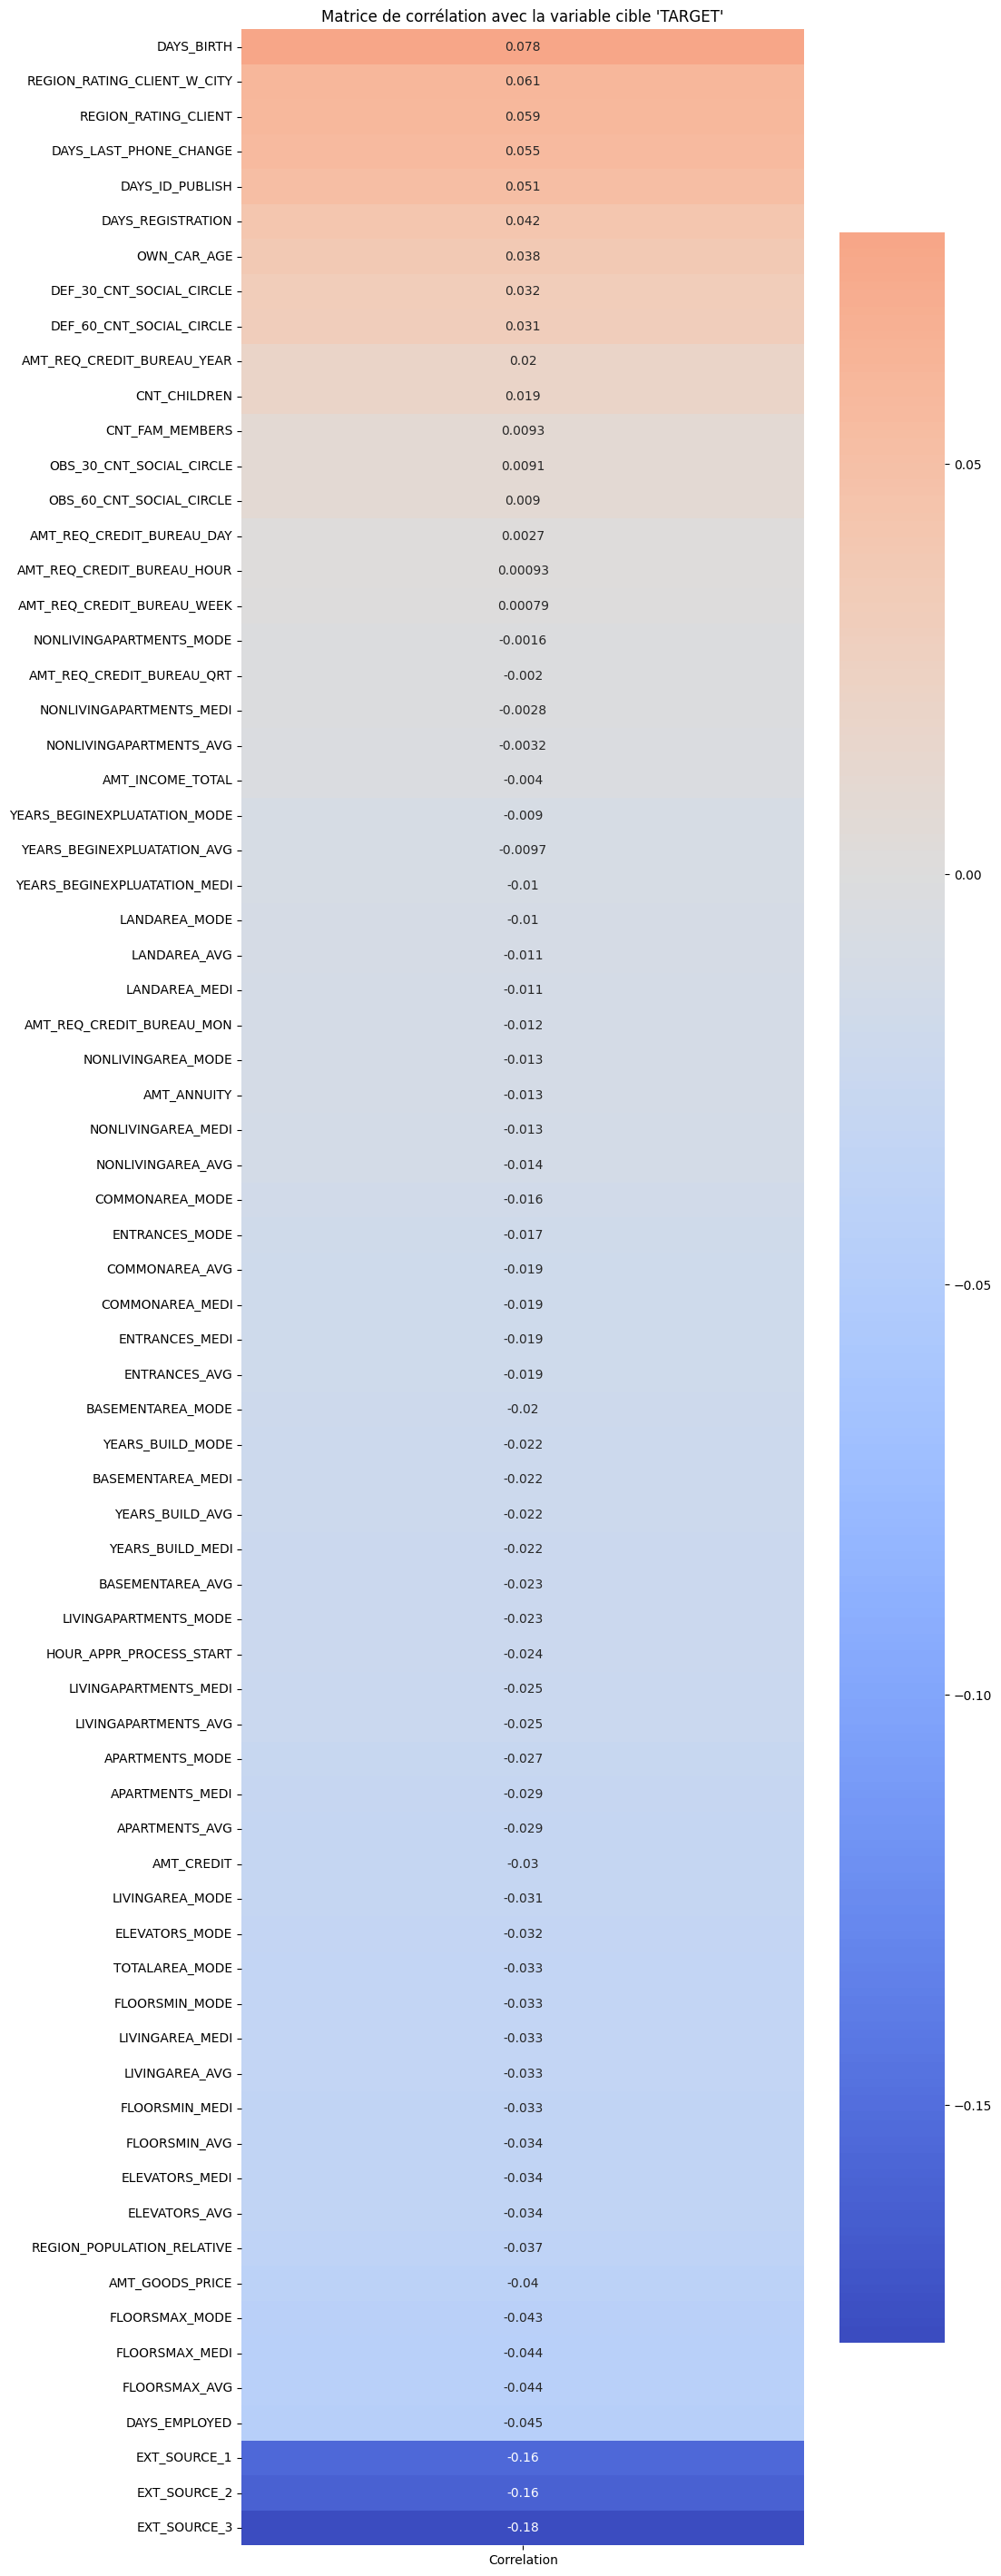

In [49]:
correlation_num_with_target_train = calculer_et_visualiser_correlation_avec_target(application_train, 'TARGET')

In [50]:
def top_correlations_positives_et_negatives_var_num_avec_target(data, target_col, top_n=10):
    """
    Identifie et affiche les top_n meilleures corrélations positives et négatives de variables numériques avec la variable cible.

    :param data: DataFrame.
    :param target_col: Nom de la colonne cible.
    :param top_n: Nombre de corrélations les plus élevées à retourner dans chaque catégorie (positive et négative).
    :return: Deux DataFrames des top_n corrélations positives et négatives.
    """
    # Vérifier que la variable cible est présente dans le DataFrame
    if target_col not in data.columns:
        raise ValueError(f"La colonne cible '{target_col}' n'est pas présente dans le DataFrame.")

    # Sélectionner uniquement les variables numériques et supprimer 'SK_ID_CURR'
    data_numerique = data.select_dtypes(include=['number']).drop(columns=['SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV'], errors='ignore')

    # Calcul de la corrélation de Pearson avec la variable cible
    correlation_with_target = data_numerique.corrwith(data[target_col])

    # Trier et séparer les corrélations positives et négatives
    top_positives = correlation_with_target[correlation_with_target > 0].sort_values(ascending=False).head(top_n)
    top_negatives = correlation_with_target[correlation_with_target < 0].sort_values().head(top_n)

    # Création de DataFrames pour les résultats
    top_positives_df = pd.DataFrame(top_positives).reset_index()
    top_positives_df.columns = ['Variable', 'Corrélation Positive avec TARGET']

    top_negatives_df = pd.DataFrame(top_negatives).reset_index()
    top_negatives_df.columns = ['Variable', 'Corrélation Négative avec TARGET']

    return top_positives_df, top_negatives_df

In [51]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(application_train, 'TARGET', 10)

In [52]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0                   DAYS_BIRTH                          0.078239
1  REGION_RATING_CLIENT_W_CITY                          0.060893
2         REGION_RATING_CLIENT                          0.058899
3       DAYS_LAST_PHONE_CHANGE                          0.055218
4              DAYS_ID_PUBLISH                          0.051457
5            DAYS_REGISTRATION                          0.041975
6                  OWN_CAR_AGE                          0.037612
7     DEF_30_CNT_SOCIAL_CIRCLE                          0.032248
8     DEF_60_CNT_SOCIAL_CIRCLE                          0.031276
9   AMT_REQ_CREDIT_BUREAU_YEAR                          0.019930

In [53]:
top_negatives_train

Variable  Corrélation Négative avec TARGET
0                EXT_SOURCE_3                         -0.178919
1                EXT_SOURCE_2                         -0.160472
2                EXT_SOURCE_1                         -0.155317
3               DAYS_EMPLOYED                         -0.044932
4               FLOORSMAX_AVG                         -0.044003
5              FLOORSMAX_MEDI                         -0.043768
6              FLOORSMAX_MODE                         -0.043226
7             AMT_GOODS_PRICE                         -0.039645
8  REGION_POPULATION_RELATIVE                         -0.037227
9               ELEVATORS_AVG                         -0.034199

#### <div class="alert alert-info"><font color='dimgray'> IV.2.1.3 Exploration de quelques variables</font> </div> 

In [54]:
def tracer_distribution_variable_en_pourcentage(data, variable, target_col='TARGET'):
    """
    Trace la distribution en pourcentage des top 10 valeurs d'une variable donnée pour l'ensemble du DataFrame, 
    puis séparément pour les valeurs cibles 0 et 1.

    :param data: DataFrame.
    :param variable: Nom de la variable à tracer.
    :param target_col: Nom de la colonne cible.
    """
    # Vérifier si la variable et la colonne cible existent
    if variable not in data.columns or target_col not in data.columns:
        raise ValueError(f"Vérifiez que les colonnes '{variable}' et '{target_col}' existent dans le DataFrame.")

    # Préparation des données
    total_count = data[variable].value_counts().head(10)
    total_percent = total_count / total_count.sum() * 100
    target_1_count = data[data[target_col] == 1][variable].value_counts().head(10)
    target_1_percent = target_1_count / target_1_count.sum() * 100
    target_0_count = data[data[target_col] == 0][variable].value_counts().head(10)
    target_0_percent = target_0_count / target_0_count.sum() * 100

    # Création des graphiques
    plt.figure(figsize=(24, 8)) 

    # Fonction pour ajouter des annotations de pourcentage
    def add_annotations(ax, data,fontsize=12 ):
        for p in ax.patches:
            width = p.get_width()
            ax.text(width + 1, p.get_y() + p.get_height() / 2,
                    '{:1.2f}%'.format(width),
                    ha='left', va='center', size=fontsize)

      
    # Graphique pour l'ensemble du DataFrame
    ax1 = plt.subplot(1, 3, 1)
    sns.barplot(x=total_percent.values, y=total_percent.index, orient='h', ax=ax1)
    add_annotations(ax1, total_percent)
    ax1.set_title(f'Distribution de {variable} - TARGET = 1', fontsize=14)  
    ax1.set_xlabel('Pourcentage (%)', fontsize=12)  
    ax1.set_ylabel(variable, fontsize=12)  

    # Graphique pour les cas où TARGET == 1
    ax2 = plt.subplot(1, 3, 2)
    sns.barplot(x=target_1_percent.values, y=target_1_percent.index, orient='h', ax=ax2)
    add_annotations(ax2, target_1_percent)
    ax2.set_title(f'Distribution de {variable} - TARGET = 1', fontsize=14)  
    ax2.set_xlabel('Pourcentage (%)', fontsize=12)  
    ax2.set_ylabel(variable, fontsize=12)  

    # Graphique pour les cas où TARGET == 0
    ax3 = plt.subplot(1, 3, 3)
    sns.barplot(x=target_0_percent.values, y=target_0_percent.index, orient='h', ax=ax3)
    add_annotations(ax3, target_0_percent)
    ax3.set_title(f'Distribution de {variable} - TARGET = 1', fontsize=14)  # Augmenter la taille pour le titre
    ax3.set_xlabel('Pourcentage (%)', fontsize=12)  # Augmenter la taille pour l'axe X
    ax3.set_ylabel(variable, fontsize=12)  # Répéter pour garder la cohérence

    plt.tight_layout()
    plt.show()

In [55]:
application_train["OCCUPATION_TYPE"].value_counts(normalize= True)

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

In [56]:
filtered_df = application_train[application_train["TARGET"] == 0]
occupation_counts = filtered_df["OCCUPATION_TYPE"].value_counts(normalize=True)
occupation_counts

OCCUPATION_TYPE
Laborers                 0.256256
Sales staff              0.150644
Core staff               0.134141
Managers                 0.104080
Drivers                  0.085661
High skill tech staff    0.055454
Accountants              0.048496
Medicine staff           0.041361
Security staff           0.031152
Cooking staff            0.027652
Cleaning staff           0.021841
Private service staff    0.012863
Low-skill Laborers       0.009004
Secretaries              0.006299
Waiters/barmen staff     0.006211
Realty agents            0.003593
HR staff                 0.002737
IT staff                 0.002555
Name: proportion, dtype: float64

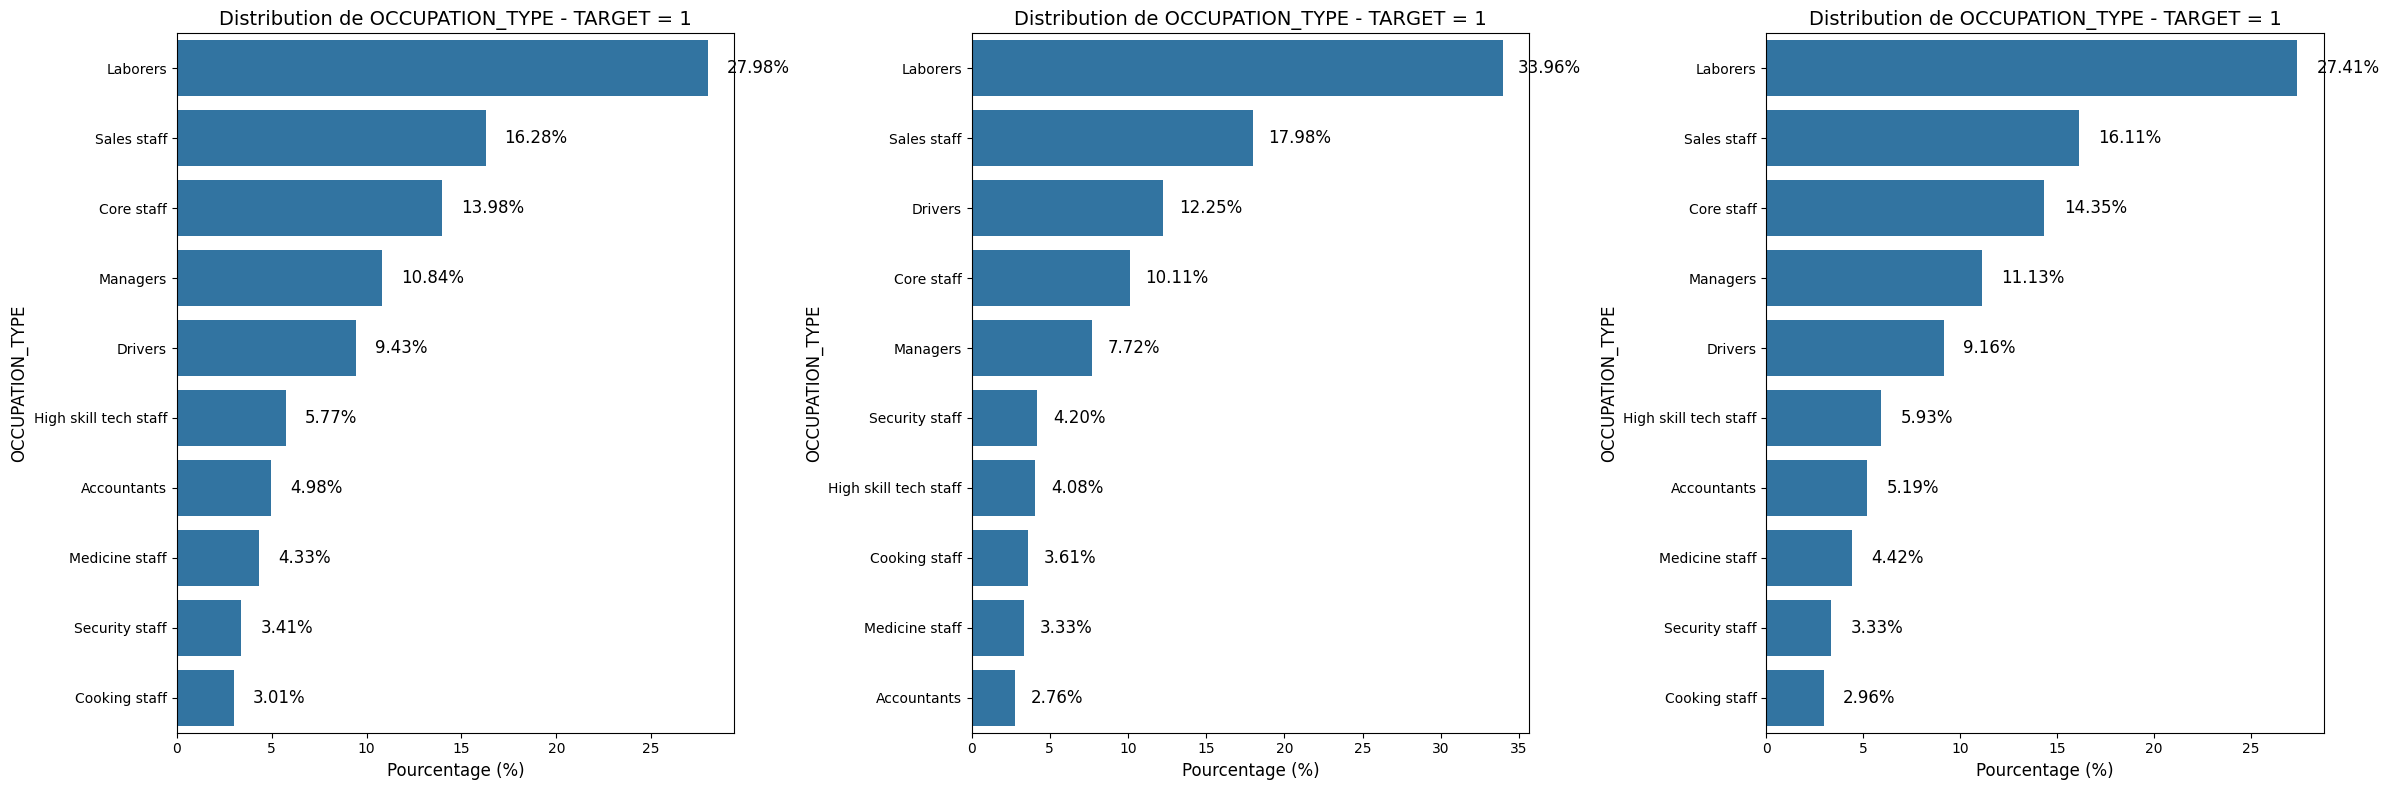

In [57]:
tracer_distribution_variable_en_pourcentage(application_train, "OCCUPATION_TYPE", target_col='TARGET')

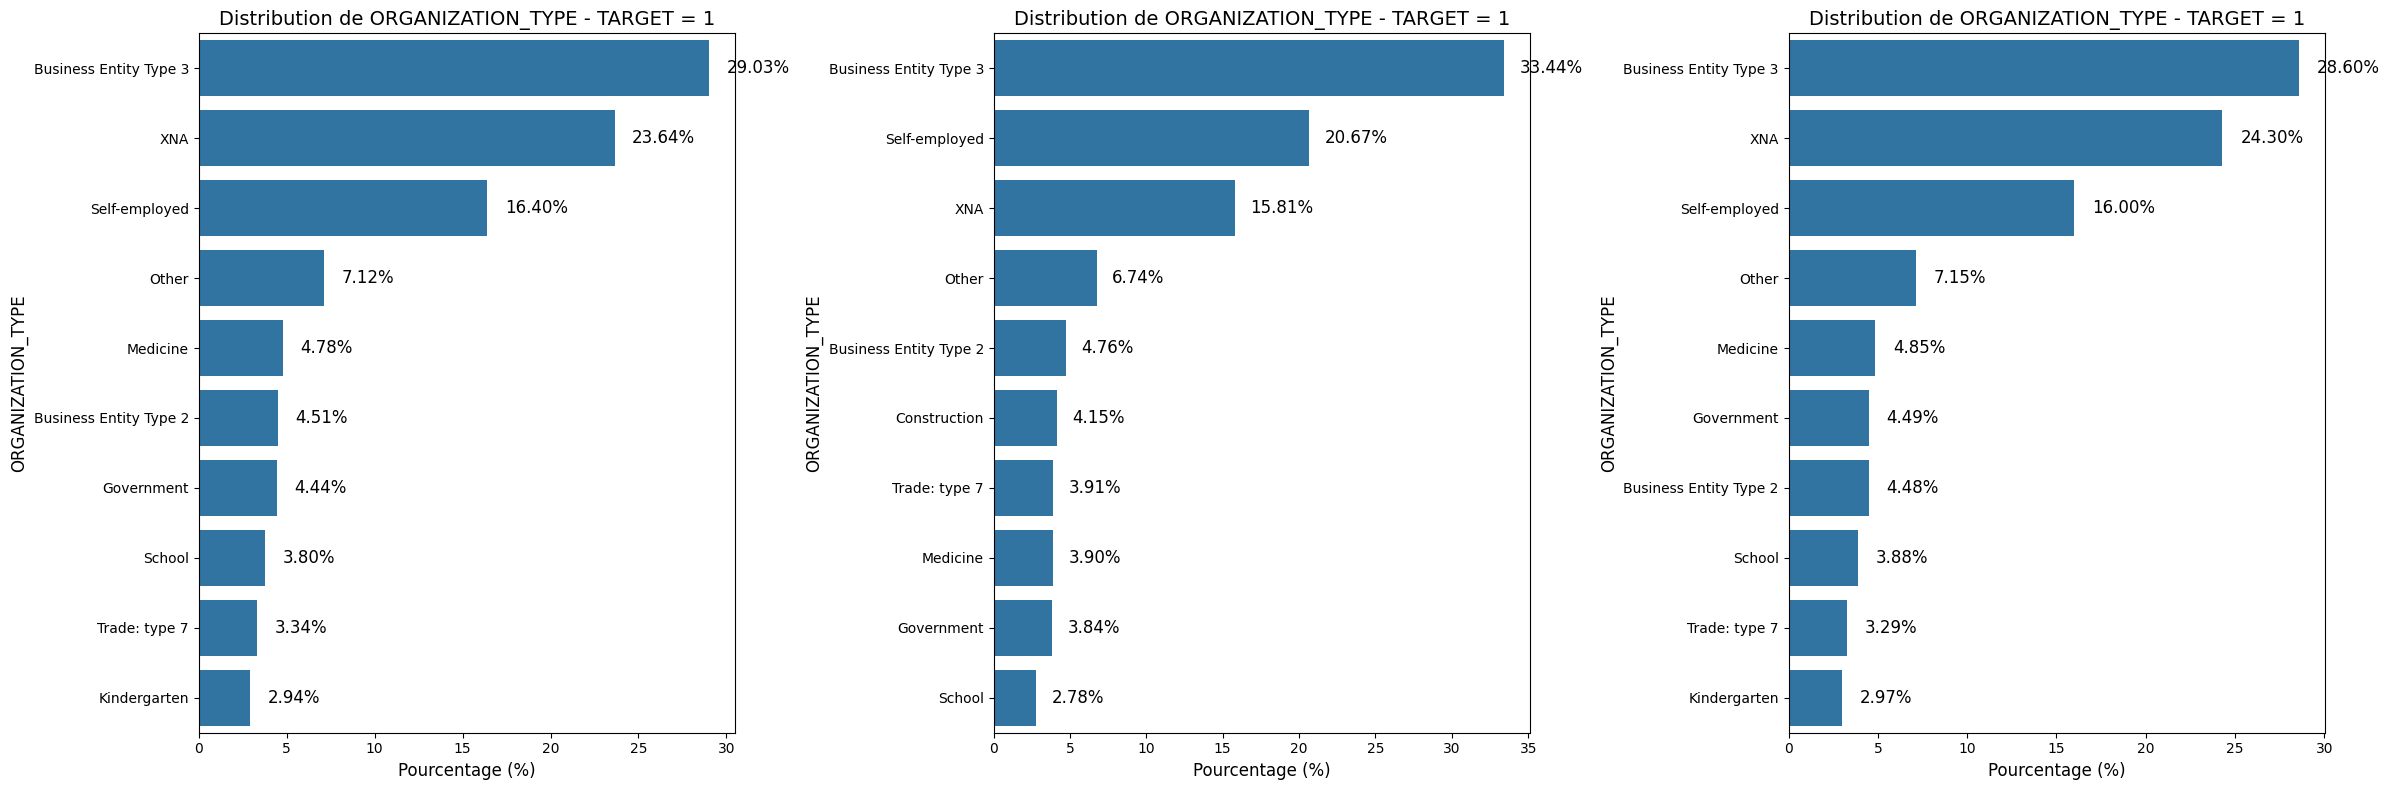

In [58]:
tracer_distribution_variable_en_pourcentage(application_train, "ORGANIZATION_TYPE", target_col='TARGET')

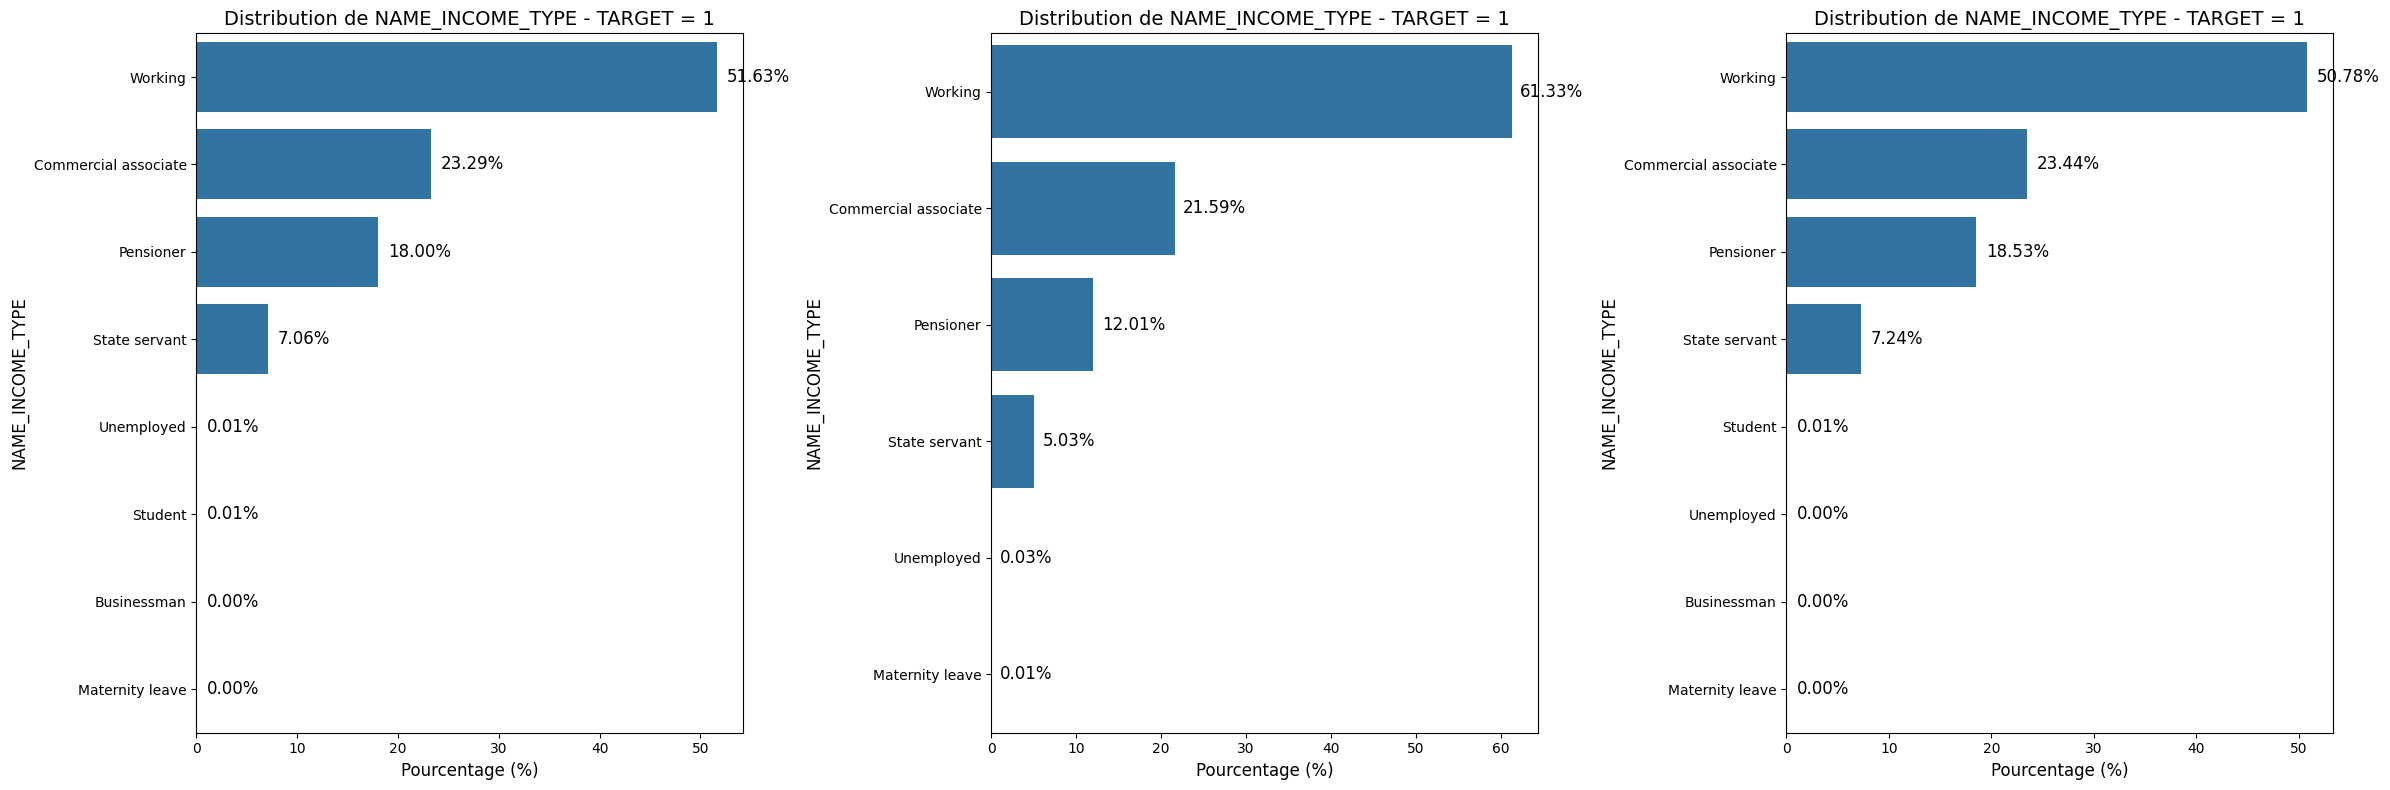

In [59]:
tracer_distribution_variable_en_pourcentage(application_train, "NAME_INCOME_TYPE", target_col='TARGET')

In [60]:
def tracer_distribution_variable_en_pourcentage_v(data, variable, target_col='TARGET'):
    """
    Trace la distribution en pourcentage d'une variable donnée pour l'ensemble du DataFrame, 
    puis séparément pour les valeurs cibles 0 et 1.

    :param data: DataFrame.
    :param variable: Nom de la variable à tracer.
    :param target_col: Nom de la colonne cible.
    """
    # Vérifier si la variable et la colonne cible existent
    if variable not in data.columns or target_col not in data.columns:
        raise ValueError(f"Vérifiez que les colonnes '{variable}' et '{target_col}' existent dans le DataFrame.")

    # Préparation des données
    total_count = data[variable].value_counts()
    total_percent = total_count / total_count.sum() * 100
    target_1_count = data[data[target_col] == 1][variable].value_counts()
    target_1_percent = target_1_count / target_1_count.sum() * 100
    target_0_count = data[data[target_col] == 0][variable].value_counts()
    target_0_percent = target_0_count / target_0_count.sum() * 100

    # Augmenter la taille de la figure
    plt.figure(figsize=(24, 8))  

    # Fonction pour ajouter des annotations de pourcentage
    def add_annotations(ax, data, fontsize=12):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1,
                    '{:1.2f}%'.format(height),
                    ha='center', va='bottom',size=fontsize )

    # Graphique pour l'ensemble du DataFrame
    ax1 = plt.subplot(1, 3, 1)
    sns.barplot(x=total_percent.index, y=total_percent.values, orient='v', ax=ax1)
    add_annotations(ax1, total_percent)
    ax1.set_title(f'Distribution de {variable} - Total', fontsize=14)  
    ax1.set_xlabel('Pourcentage (%)', fontsize=12)  
    ax1.set_ylabel(variable, fontsize=12)
   
    

    # Graphique pour les cas où TARGET == 1
    ax2 = plt.subplot(1, 3, 2)
    sns.barplot(x=target_1_percent.index, y=target_1_percent.values, orient='v', ax=ax2)
    add_annotations(ax2, target_1_percent)
    ax2.set_title(f'Distribution de {variable} - Total', fontsize=14)  
    ax2.set_xlabel('Pourcentage (%)', fontsize=12)  
    ax2.set_ylabel(variable, fontsize=12)
    

    # Graphique pour les cas où TARGET == 0
    ax3 = plt.subplot(1, 3, 3)
    sns.barplot(x=target_0_percent.index, y=target_0_percent.values, orient='v', ax=ax3)
    add_annotations(ax3, target_0_percent)
    ax3.set_title(f'Distribution de {variable} - Total', fontsize=14)  
    ax3.set_xlabel('Pourcentage (%)', fontsize=12)  
    ax3.set_ylabel(variable, fontsize=12)
    

    plt.tight_layout()
    plt.show()

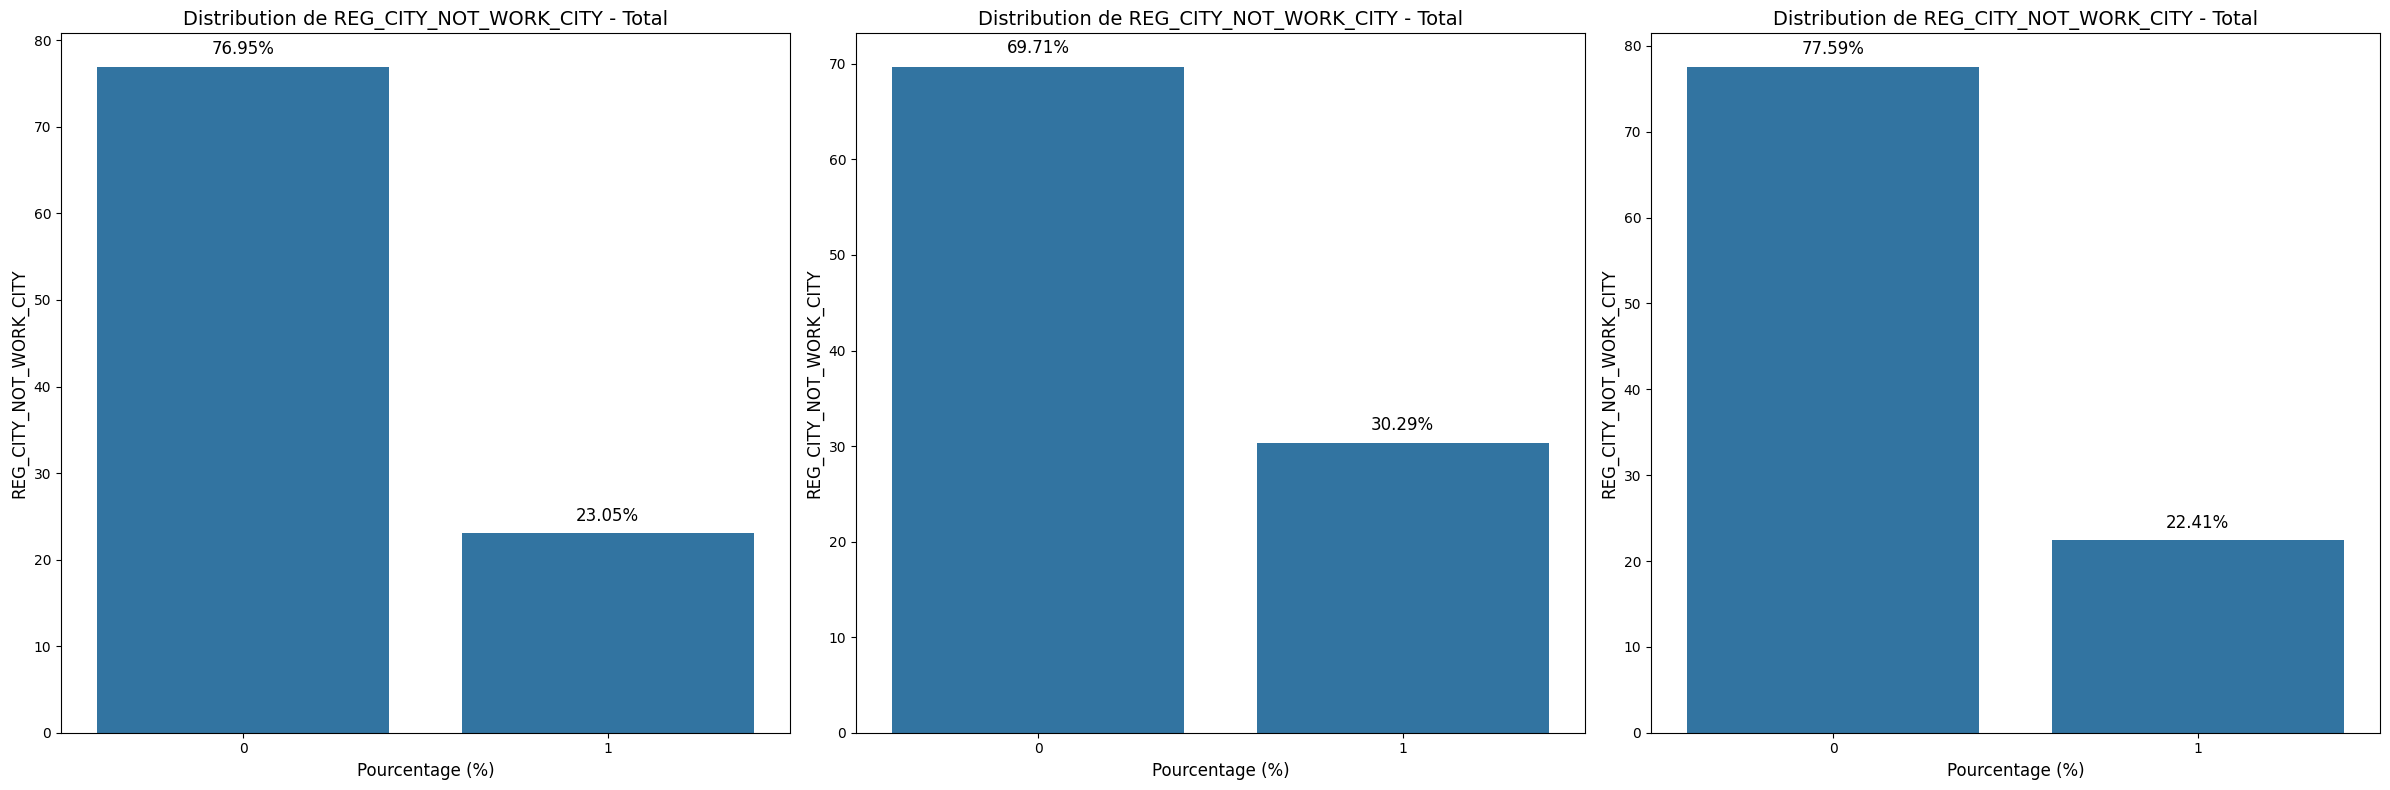

In [61]:
tracer_distribution_variable_en_pourcentage_v(application_train, "REG_CITY_NOT_WORK_CITY", target_col='TARGET')

In [62]:
def graph_variable_EXT_SOURCE(data, column_name, plots=['kde', 'box', 'violin'], valeurs_limites=None, figsize=(24, 8), log_scale=False,palette=['Green', 'Red']):
    """
    Affiche des graphiques pour explorer les variables EXT_SOURCE .
    Trace la distribution et le boxplot séparément pour les valeurs cibles 0 et 1.
    
    :param data: DataFrame.
    :param column_name: Nom de la variable à tracer.
    :param plots : types de graphiques à générer
    """
    
    # 1. Copie du DataFrame : 
    data_to_plot = data.copy()
    
    # 2. Filtres des données en cas de valeurs aberrantes : 
    if valeurs_limites:
        mask_1 = data_to_plot[column_name] > valeurs_limites[0]
        mask_2 = data_to_plot[column_name] < valeurs_limites[1]
        
        data_to_plot = data_to_plot.loc[mask_1 & mask_2]
    
    # 3. Création de la figure des graphiques :     
    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)

    # 4. Création des graphiques en boucle : 
    
    for i, ele in enumerate(plots):
        
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)

        if ele == 'kde':
            
            sns.kdeplot(
                data=data_to_plot[column_name][data['TARGET'] == 0].dropna(),
                label='Non Renboursé',
                color=palette[0],
                )
             
            sns.kdeplot(
                data=data_to_plot[column_name][data['TARGET'] == 1].dropna(),
                label='Renboursé',
                color=palette[1],
                )
             
            
            plt.xlabel(column_name)
            plt.ylabel('Distribution de probabilité')            
            plt.title(f"Distribution de Probabilité de {column_name}")
            plt.legend() 
            
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)')

        if ele == 'violin':
            
            sns.violinplot(
                x='TARGET',
                y=column_name,
                data=data_to_plot,
                palette=palette,
                )
            
            plt.title(f"Violin-Plot de {column_name}")
            
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':
            
            sns.boxplot(
                x='TARGET',
                y=column_name,
                data=data_to_plot,
                palette=palette,
                )
            
            plt.title(f"Box-Plot de {column_name}")
            
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')
        
    # 5. Affichage des graphiques :         
    plt.suptitle(f'Répartition de {column_name}', fontsize=20)
    plt.show()

c:\Windows\Temp\ipykernel_12740\2369242595.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Windows\Temp\ipykernel_12740\2369242595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


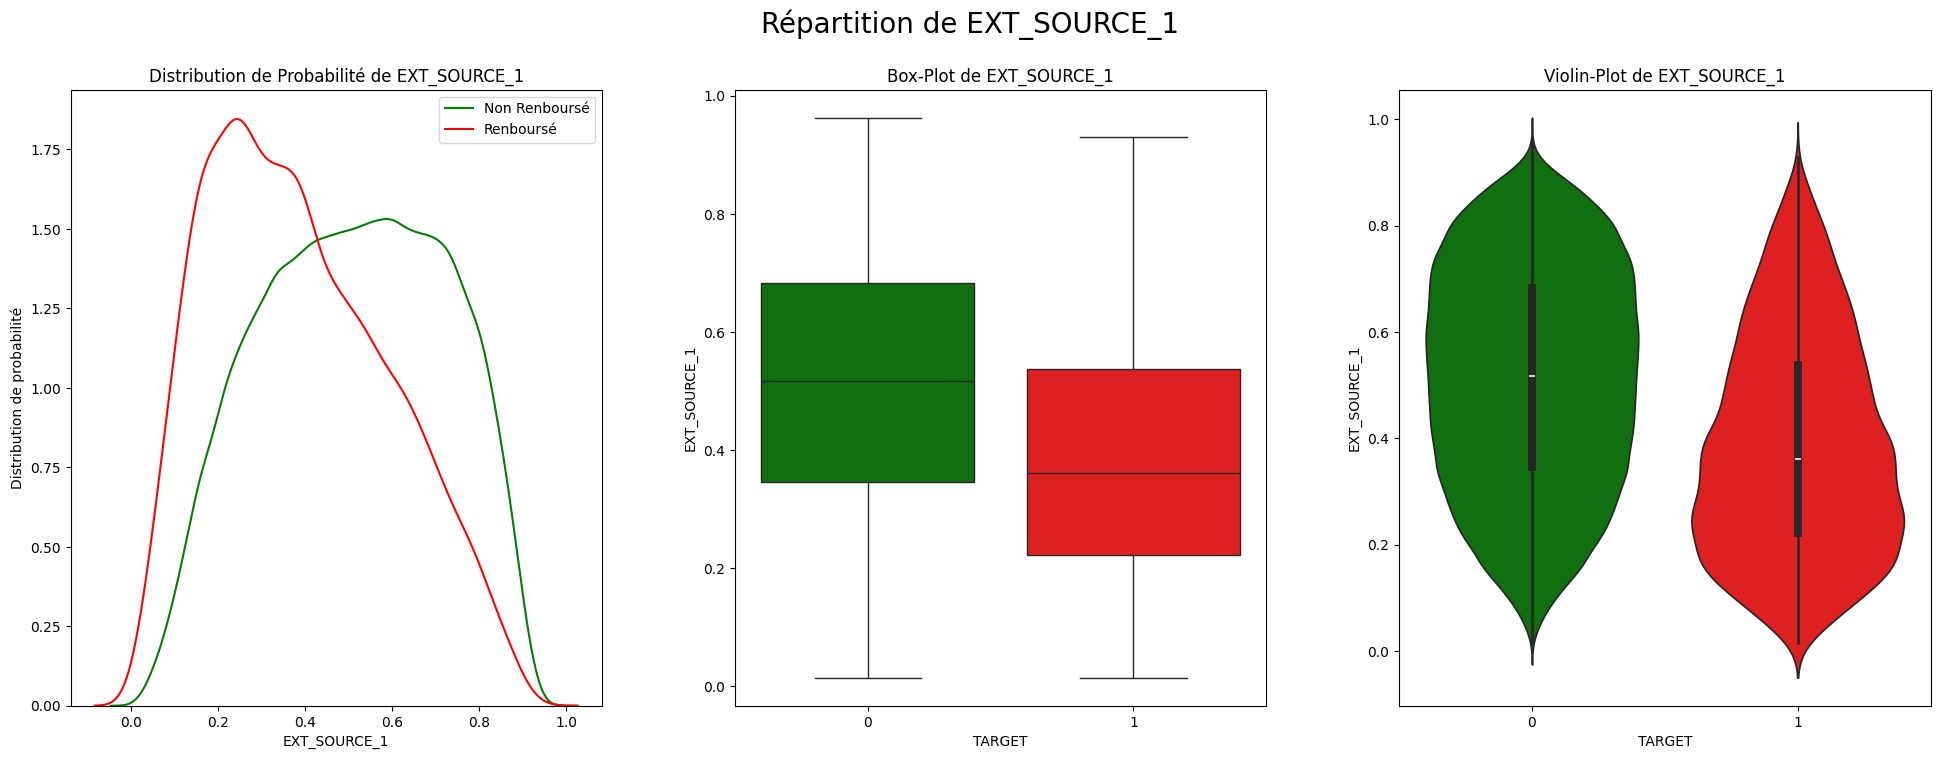

In [63]:
graph_variable_EXT_SOURCE(application_train,'EXT_SOURCE_1', plots=['kde', 'box','violin'], figsize=(24, 8))

c:\Windows\Temp\ipykernel_12740\2369242595.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Windows\Temp\ipykernel_12740\2369242595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


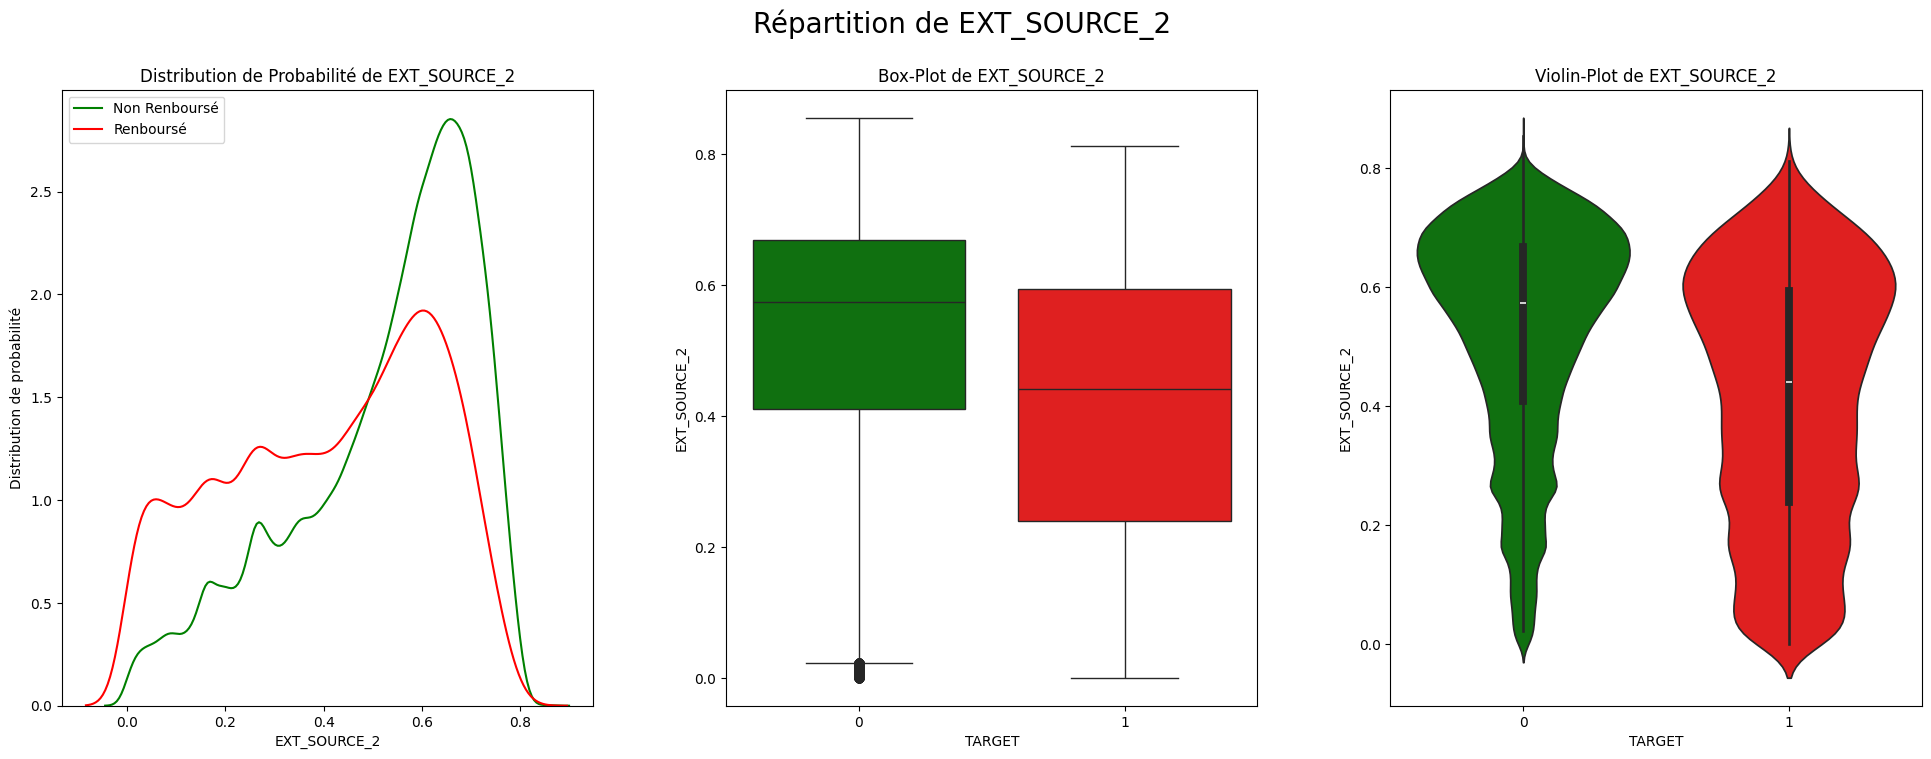

In [64]:
graph_variable_EXT_SOURCE(application_train,'EXT_SOURCE_2', plots=['kde', 'box','violin'], figsize=(24, 8))

c:\Windows\Temp\ipykernel_12740\2369242595.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Windows\Temp\ipykernel_12740\2369242595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


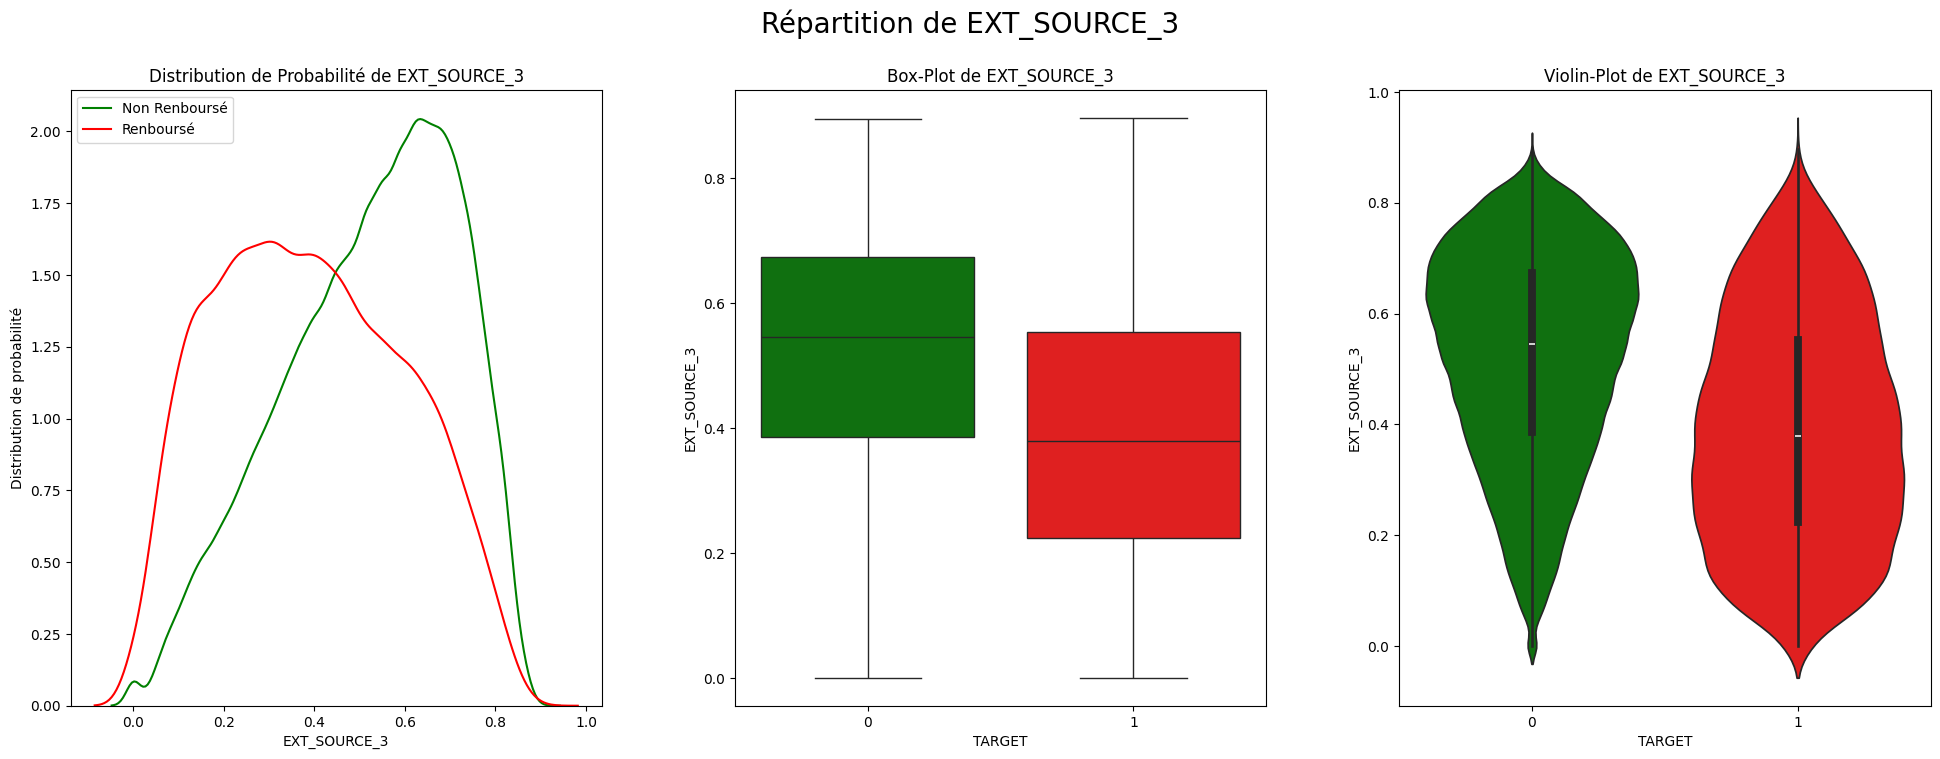

In [65]:
graph_variable_EXT_SOURCE(application_train,'EXT_SOURCE_3', plots=['kde', 'box','violin'], figsize=(24, 8))

**Age de demandeur**

In [66]:
application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [67]:
# Création d'une variable AGE_YEARS représentant l'âge en année du demandeur : 
application_train['AGE_client'] = application_train['DAYS_BIRTH']*(-1) / 365

c:\Windows\Temp\ipykernel_12740\2369242595.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Windows\Temp\ipykernel_12740\2369242595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


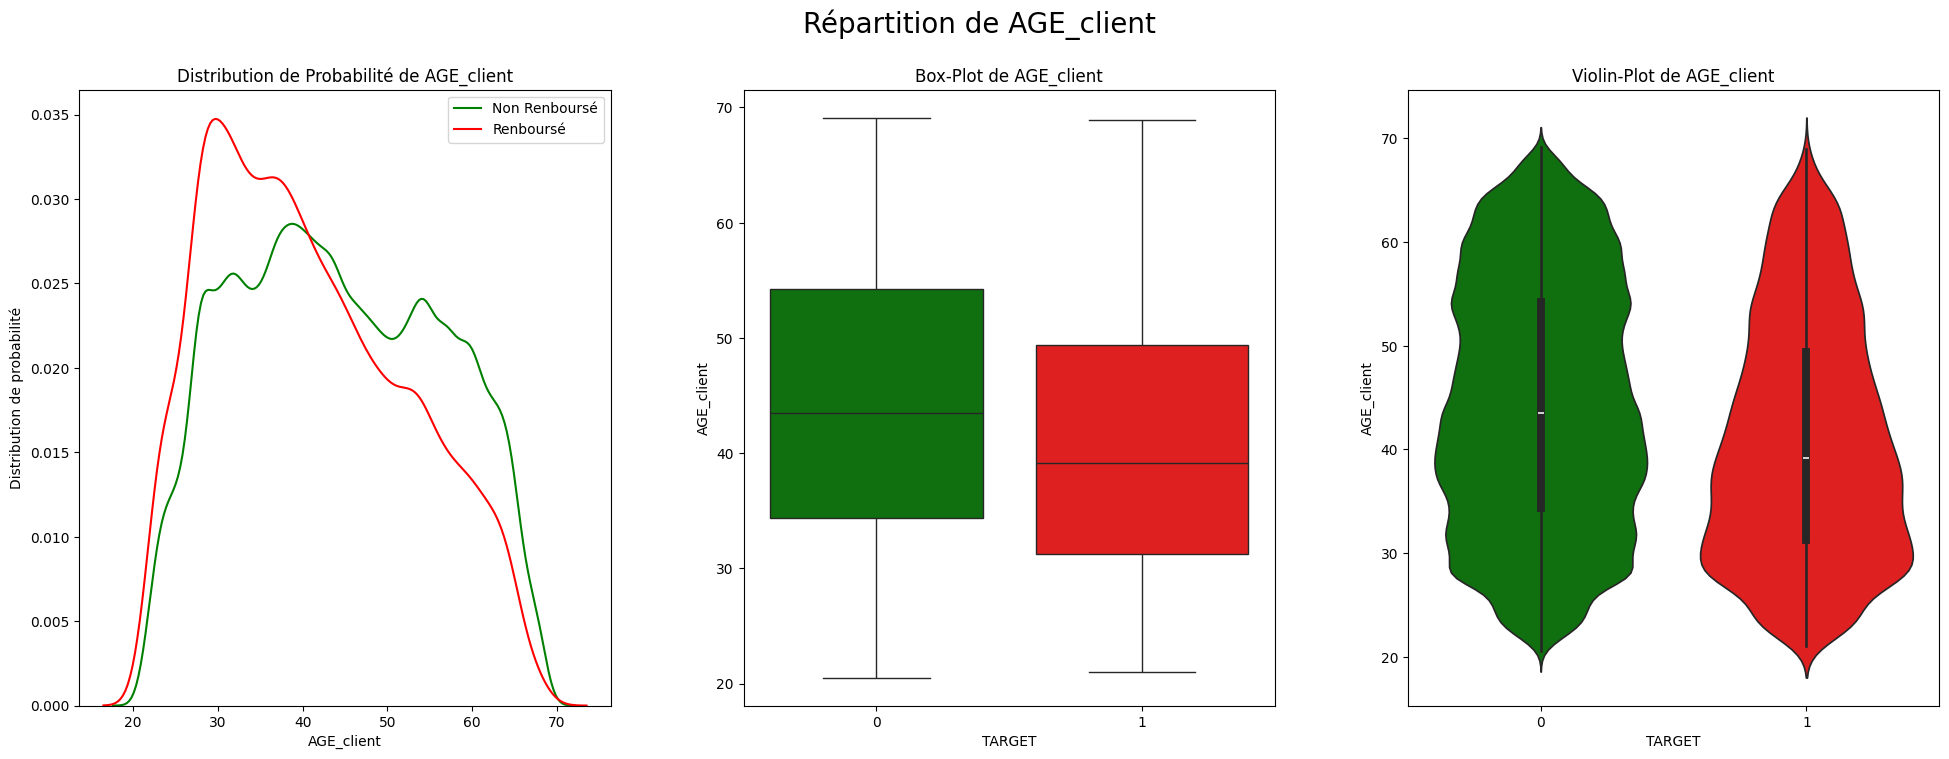

In [68]:
graph_variable_EXT_SOURCE(application_train,'AGE_client', plots=['kde', 'box','violin'], figsize=(24, 8))

#### <div class="alert alert-info"><font color='dimgray'> IV.2.1.4 Variables Days</font> </div> 

In [69]:
# Identifier les colonnes qui commencent par "DAYS"
colonnes_days = [col for col in application_train.columns if col.startswith('DAYS')]

In [70]:
colonnes_days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

<div class="alert alert-success">
 
**DAYS_BIRTH :** Âge du client, en jours, au moment de la demande de prêt. Cela indique combien de jours se sont écoulés depuis la naissance du client jusqu'à la date de sa demande de prêt.

**DAYS_REGISTRATION :** Nombre de jours écoulés avant la demande de prêt durant lesquels le client a changé son inscription ou son enregistrement. Cela peut se référer à un enregistrement civil, comme un changement d'adresse ou d'état civil.

**DAYS_ID_PUBLISH :** Nombre de jours écoulés avant la demande de prêt durant lesquels le client a changé le document d'identité avec lequel il a postulé pour le prêt. Cela reflète la fraîcheur du document d'identité utilisé pour la demande de prêt.

**DAYS_EMPLOYED :** Nombre de jours écoulés avant la demande de prêt depuis le début de l'emploi actuel du client. Cela indique la durée pendant laquelle le client est employé à son poste actuel jusqu'à la date de la demande de prêt.

**DAYS_LAST_PHONE_CHANGE :** Nombre de jours écoulés avant la demande de prêt durant lesquels le client a changé de téléphone. Cela montre à quel point le client a récemment changé de numéro ou d'appareil téléphonique avant de faire la demande de prêt.
    
</div>

In [71]:
application_train[colonnes_days].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307510.000000  
mean              -962.858788  
std                826.808487  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

<div class="alert alert-success">
 
On remarque que les variables qui commencent par **DAYS** sont négatives car elles sont enregistrées par rapport à la demande de prêt actuelle.
    
</div>

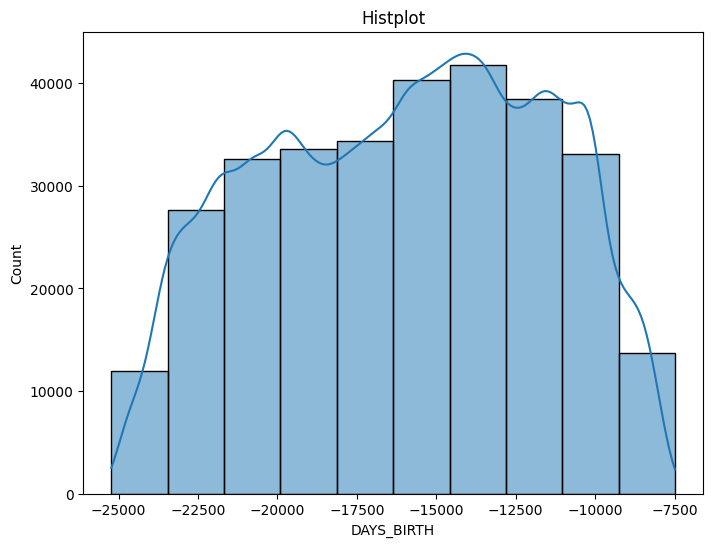

In [72]:
display_histplot(application_train, x='DAYS_BIRTH',kde=True, bins=10)

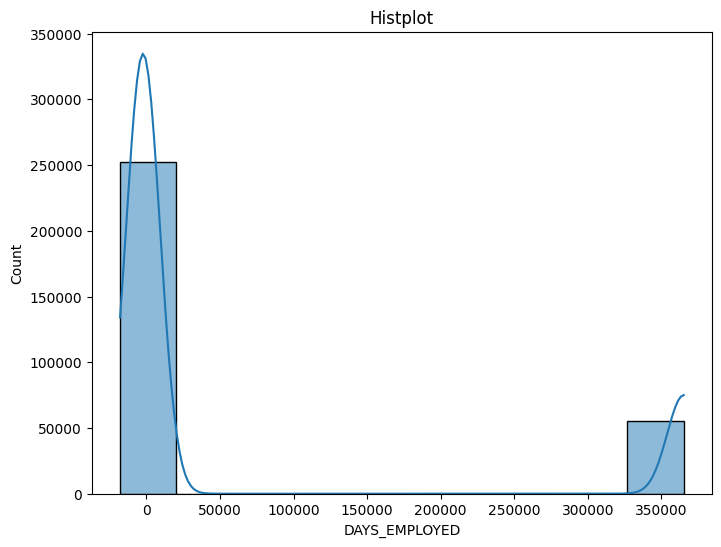

In [73]:
display_histplot(application_train, x='DAYS_EMPLOYED',kde=True, bins=10)

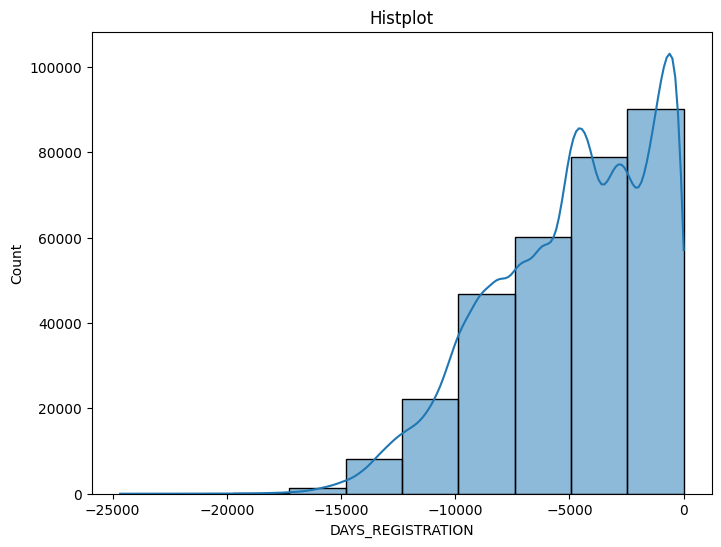

In [74]:
display_histplot(application_train, x='DAYS_REGISTRATION',kde=True, bins=10)

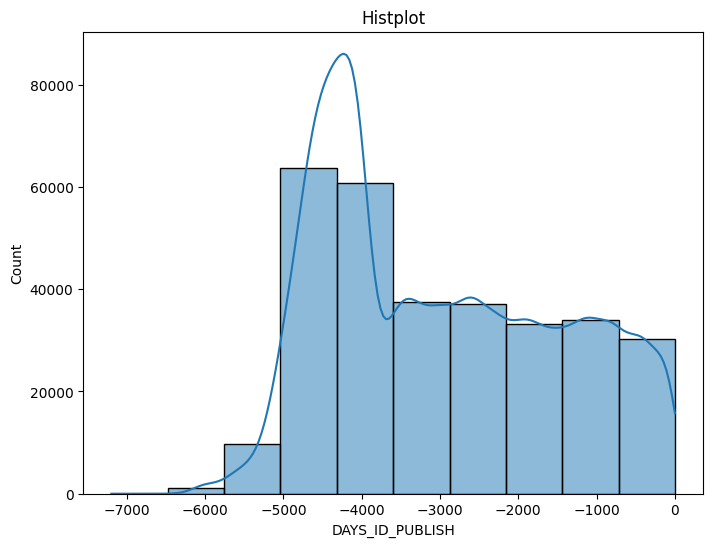

In [75]:
display_histplot(application_train, x='DAYS_ID_PUBLISH',kde=True, bins=10)

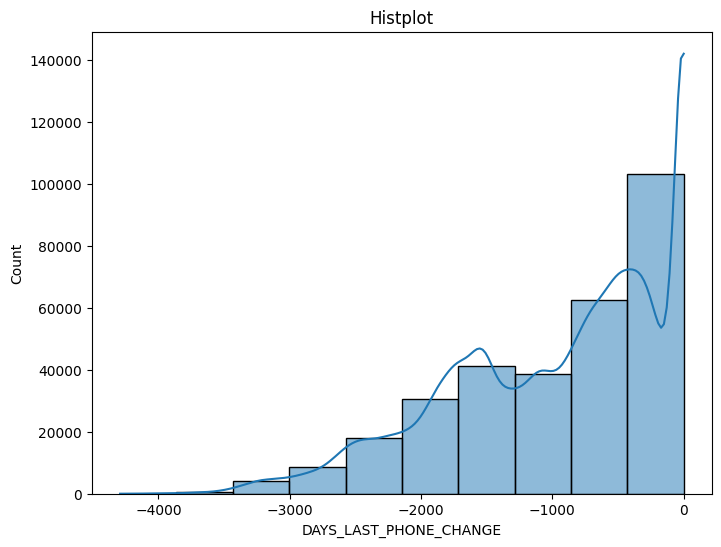

In [76]:
display_histplot(application_train, x='DAYS_LAST_PHONE_CHANGE',kde=True, bins=10)

<div class="alert alert-success">
 
En analysant la définition de chaque variable et les statistiques descriptives fournies, une anomalie se démarque clairement pour la variable **DAYS_EMPLOYED** :
    
**Anomalie dans DAYS_EMPLOYED:**
    
**- Définition:** Nombre de jours écoulés avant la demande de prêt depuis le début de l'emploi actuel du client.

**- Statistique:** La valeur moyenne est de 63815 jours (ce qui équivaut à environ 175 ans), avec un écart-type de 141275 jours, et une valeur maximale de 365243 jours (ce qui est environ 1000 ans et n'est clairement pas possible).
    
**==>** Cela suggère qu'il y a des erreurs de saisie dans cette colonne.
    
</div>

<div class="alert alert-success">
 
**- Correction :** Après avoir identifié ces valeurs anormales, appliquer une correction appropriée, comme remplacer ces valeurs par NULL pourrait être nécessaire pour des analyses futures.
    
</div>

In [77]:
# Remplacer les valeurs extrêmement positives dans 'DAYS_EMPLOYED' par NaN

application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)

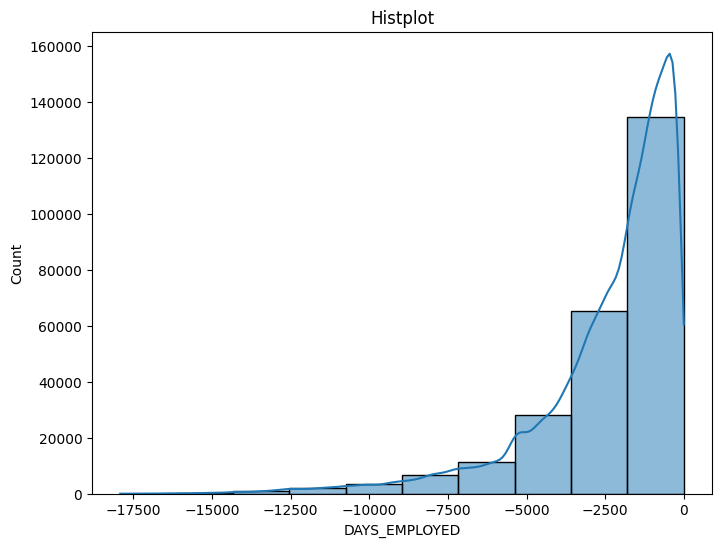

In [78]:
display_histplot(application_train, x='DAYS_EMPLOYED',kde=True, bins=10)

### <div class="alert alert-info"><font color='dimgray'>IV.3 Aperçu général: jeu de données application_test  </font> </div>

In [79]:
print('Taille de jeu de données: ', application_test.shape)
application_test.head()

Taille de jeu de données:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

<div class="alert alert-success">
 
La base de données **application_test** compile les données relatives aux demandes de prêt. Chaque ligne représente une demande distincte, identifiée par la clé **SK_ID_CURR**. Cette base sert à des fins de test.
    
</div>

In [80]:
application_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  48744.000000   48744.000000       48744.000000     48744.000000   
mean  -16068.084605   67485.366322       -4967.652716     -3051.712949   
std     4325.900393  144348.507136        3552.612035      1569.276709   
min   -25195.000000  -17463.000000      -23722.000000     -6348.000000   
25%   -19637.000000   -2910.000000       -7459.250000     -4448.000000   
50%   -15785.000000   -1293.000000       -4490.000000     -3234.000000   
75%   -12496.000000    -296.000000       -1901.000000     -1706.000000   
max    -7338.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  16432.000000  48744.000000    48744.000000     48744.000000   
mean      11.786027      0.999979        0.809720         0.204702   
std       11.462889      0.004529        0.392526         0.403488   
min        0.000000      0.000000        0.000000         0.000000   
25%        4.000000      1.000000        1.000000         0.000000   
50%        9.000000      1.000000        1.000000         0.000000   
75%       15.000000      1.000000        1.000000         0.000000   
max       74.000000      1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      48744.000000  48744.000000  48744.000000     48744.000000   
mean           0.998400      0.263130      0.162646         2.146767   
std            0.039971      0.440337      0.369046         0.890423   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      1.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        21.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          48744.000000                 48744.000000   
mean               2.038159                     2.012596   
std                0.522694                     0.515804   
min                1.000000                    -1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             48744.000000                48744.000000   
mean                 12.007365                    0.018833   
std                   3.278172                    0.135937   
min                  

In [81]:
test_remplissage(application_test)

Taux de remplissage  \
SK_ID_CURR                                 100.00   
FLAG_DOCUMENT_14                           100.00   
REG_REGION_NOT_LIVE_REGION                 100.00   
LIVE_REGION_NOT_WORK_REGION                100.00   
REG_CITY_NOT_LIVE_CITY                     100.00   
REG_CITY_NOT_WORK_CITY                     100.00   
LIVE_CITY_NOT_WORK_CITY                    100.00   
ORGANIZATION_TYPE                          100.00   
FLAG_DOCUMENT_21                           100.00   
FLAG_DOCUMENT_20                           100.00   
FLAG_DOCUMENT_19                           100.00   
FLAG_DOCUMENT_18                           100.00   
FLAG_DOCUMENT_17                           100.00   
FLAG_DOCUMENT_16                           100.00   
FLAG_DOCUMENT_15                           100.00   
FLAG_DOCUMENT_13                           100.00   
WEEKDAY_APPR_PROCESS_START                 100.00   
FLAG_DOCUMENT_12                           100.00   
FLAG_DOCUMENT_11                           100.00   
FLAG_DOCUMENT_10                           100.00   
FLAG_DOCUMENT_9                            100.00   
FLAG_DOCUMENT_8                            100.00   
FLAG_DOCUMENT_7                            100.00   
FLAG_DOCUMENT_6                            100.00   
NAME_CONTRACT_TYPE                         100.00   
FLAG_DOCUMENT_5                            100.00   
FLAG_DOCUMENT_4                            100.00   
FLAG_DOCUMENT_3                            100.00   
FLAG_DOCUMENT_2                            100.00   
DAYS_LAST_PHONE_CHANGE                     100.00   
HOUR_APPR_PROCESS_START                    100.00   
REG_REGION_NOT_WORK_REGION                 100.00   
REGION_RATING_CLIENT_W_CITY                100.00   
DAYS_REGISTRATION                          100.00   
CODE_GENDER                                100.00   
FLAG_OWN_CAR                               100.00   
FLAG_OWN_REALTY                            100.00   
CNT_CHILDREN                               100.00   
AMT_INCOME_TOTAL                           100.00   
AMT_CREDIT                                 100.00   
AMT_GOODS_PRICE                            100.00   
NAME_INCOME_TYPE                           100.00   
NAME_EDUCATION_TYPE                        100.00   
NAME_FAMILY_STATUS                         100.00   
NAME_HOUSING_TYPE                          100.00   
REGION_POPULATION_RELATIVE                 100.00   
DAYS_BIRTH                                 100.00   
REGION_RATING_CLIENT                       100.00   
DAYS_EMPLOYED                              100.00   
DAYS_ID_PUBLISH                            100.00   
FLAG_CONT_MOBILE                           100.00   
FLAG_MOBIL                                 100.00   
FLAG_EMP_PHONE                             100.00   
FLAG_WORK_PHONE                            100.00   
CNT_FAM_MEMBERS                            100.00   
FLAG_EMAIL                                 100.00   
FLAG_PHONE                                 100.00   
EXT_SOURCE_2                                99.98   
AMT_ANNUITY                                 99.95   
OBS_30_CNT_SOCIAL_CIRCLE                    99.94   
DEF_60_CNT_SOCIAL_CIRCLE                    99.94   
OBS_60_CNT_SOCIAL_CIRCLE                    99.94   
DEF_30_CNT_SOCIAL_CIRCLE                    99.94   
NAME_TYPE_SUITE                             98.13   
AMT_REQ_CREDIT_BUREAU_QRT                   87.59   
AMT_REQ_CREDIT_BUREAU_WEEK                  87.59   
AMT_REQ_CREDIT_BUREAU_DAY                   87.59   
AMT_REQ_CREDIT_BUREAU_MON                   87.59   
AMT_REQ_CREDIT_BUREAU_HOUR                  87.59   
AMT_REQ_CREDIT_BUREAU_YEAR                  87.59   
EXT_SOURCE_3                                82.22   
OCCUPATION_TYPE                             67.99   
EXT_SOURCE_1                                57.88   
EMERGENCYSTATE_MODE                         54.44   
TOTALAREA_MODE                              53.59   
YE

In [82]:
num_var_manquante_test=test_remplissage(application_test)

In [83]:
compte_valeurs = num_var_manquante_test['Taux de remplissage'].value_counts()

In [84]:
nombre_de_100 = compte_valeurs.get(100, 0)

In [85]:
print("Le nombre de variables avec un taux de remplissage 100% est :", nombre_de_100)

Le nombre de variables avec un taux de remplissage 100% est : 57


In [86]:
num_var_manquante_train=test_remplissage(application_train)
num_var_manquante_train

Taux de remplissage  \
SK_ID_CURR                                 100.00   
WEEKDAY_APPR_PROCESS_START                 100.00   
REG_REGION_NOT_LIVE_REGION                 100.00   
REG_REGION_NOT_WORK_REGION                 100.00   
LIVE_REGION_NOT_WORK_REGION                100.00   
REG_CITY_NOT_LIVE_CITY                     100.00   
REG_CITY_NOT_WORK_CITY                     100.00   
LIVE_CITY_NOT_WORK_CITY                    100.00   
ORGANIZATION_TYPE                          100.00   
TARGET                                     100.00   
DAYS_LAST_PHONE_CHANGE                     100.00   
FLAG_DOCUMENT_2                            100.00   
FLAG_DOCUMENT_3                            100.00   
FLAG_DOCUMENT_4                            100.00   
FLAG_DOCUMENT_5                            100.00   
FLAG_DOCUMENT_6                            100.00   
FLAG_DOCUMENT_7                            100.00   
FLAG_DOCUMENT_8                            100.00   
FLAG_DOCUMENT_9                            100.00   
FLAG_DOCUMENT_10                           100.00   
FLAG_DOCUMENT_11                           100.00   
FLAG_DOCUMENT_12                           100.00   
FLAG_DOCUMENT_13                           100.00   
FLAG_DOCUMENT_14                           100.00   
FLAG_DOCUMENT_15                           100.00   
FLAG_DOCUMENT_16                           100.00   
FLAG_DOCUMENT_17                           100.00   
FLAG_DOCUMENT_18                           100.00   
FLAG_DOCUMENT_19                           100.00   
FLAG_DOCUMENT_20                           100.00   
FLAG_DOCUMENT_21                           100.00   
HOUR_APPR_PROCESS_START                    100.00   
AGE_client                                 100.00   
REGION_RATING_CLIENT_W_CITY                100.00   
CODE_GENDER                                100.00   
FLAG_OWN_REALTY                            100.00   
CNT_CHILDREN                               100.00   
AMT_INCOME_TOTAL                           100.00   
AMT_CREDIT                                 100.00   
FLAG_EMP_PHONE                             100.00   
NAME_INCOME_TYPE                           100.00   
NAME_EDUCATION_TYPE                        100.00   
NAME_FAMILY_STATUS                         100.00   
NAME_HOUSING_TYPE                          100.00   
REGION_POPULATION_RELATIVE                 100.00   
DAYS_BIRTH                                 100.00   
DAYS_REGISTRATION                          100.00   
DAYS_ID_PUBLISH                            100.00   
FLAG_MOBIL                                 100.00   
REGION_RATING_CLIENT                       100.00   
FLAG_OWN_CAR                               100.00   
AMT_ANNUITY                                100.00   
CNT_FAM_MEMBERS                            100.00   
FLAG_EMAIL                                 100.00   
FLAG_PHONE                                 100.00   
FLAG_CONT_MOBILE                           100.00   
FLAG_WORK_PHONE                            100.00   
NAME_CONTRACT_TYPE                         100.00   
AMT_GOODS_PRICE                             99.91   
EXT_SOURCE_2                                99.79   
DEF_60_CNT_SOCIAL_CIRCLE                    99.67   
OBS_60_CNT_SOCIAL_CIRCLE                    99.67   
DEF_30_CNT_SOCIAL_CIRCLE                    99.67   
OBS_30_CNT_SOCIAL_CIRCLE                    99.67   
NAME_TYPE_SUITE                             99.58   
AMT_REQ_CREDIT_BUREAU_QRT                   86.50   
AMT_REQ_CREDIT_BUREAU_MON                   86.50   
AMT_REQ_CREDIT_BUREAU_YEAR                  86.50   
AMT_REQ_CREDIT_BUREAU_WEEK                  86.50   
AMT_REQ_CREDIT_BUREAU_DAY                   86.50   
AMT_REQ_CREDIT_BUREAU_HOUR                  86.50   
DAYS_EMPLOYED                               81.99   
EXT_SOURCE_3                                80.17   
OCCUPATION_TYPE                             68.65   
EMERGENCYSTATE_MODE                         52.60   
TO

In [87]:
def tracer_taux_remplissage_groupes_train_test(train_df, test_df, groupe_taille=40):
    """
    Trace les taux de remplissage des variables pour les DataFrames 'train' et 'test' en groupes.

    :param train_df: DataFrame avec les taux de remplissage pour le train set.
    :param test_df: DataFrame avec les taux de remplissage pour le test set.
    :param groupe_taille: Nombre de variables à inclure dans chaque sous-graphique.
    """
    # Nombre total de groupes
    n_groupes = int(np.ceil(len(train_df) / groupe_taille))

    for i in range(n_groupes):
        # Extraction du sous-ensemble de données pour le groupe actuel
        start_idx = i * groupe_taille
        end_idx = start_idx + groupe_taille
        subset_train = train_df[start_idx:end_idx]
        subset_test = test_df[start_idx:end_idx]

        # Création du sous-graphique
        plt.figure(figsize=(15, 5))
        ax = plt.subplot(111)
        indices = np.arange(len(subset_train))
        bar_width = 0.35

        ax.bar(indices, subset_train['Taux de remplissage'], bar_width, label='Train')
        ax.bar(indices + bar_width, subset_test['Taux de remplissage'], bar_width, label='Test')

        ax.set_xlabel('Variables')
        ax.set_ylabel('Taux de remplissage (%)')
        ax.set_title(f'Taux de remplissage des variables - Groupe {i + 1}')
        ax.set_xticks(indices + bar_width / 2)
        ax.set_xticklabels(subset_train.index, rotation=90)
        ax.legend()

        plt.tight_layout()
        plt.show()

# Exemple d'utilisation de la fonction :
# tracer_taux_remplissage_groupes(num_var_manquante_train, num_var_manquante_test)


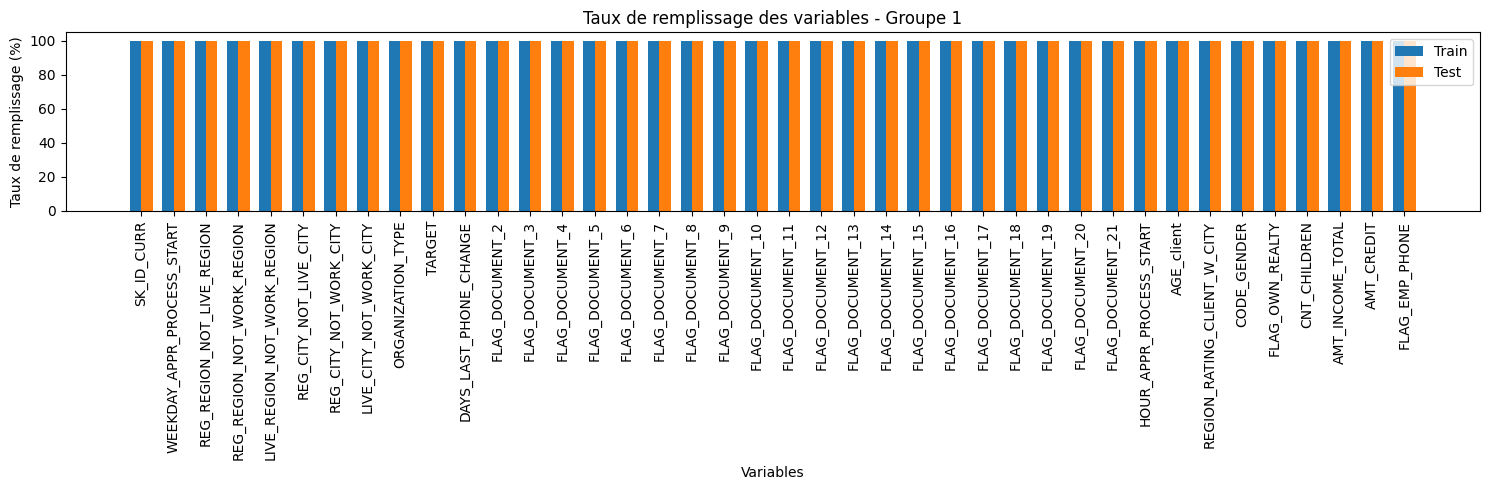

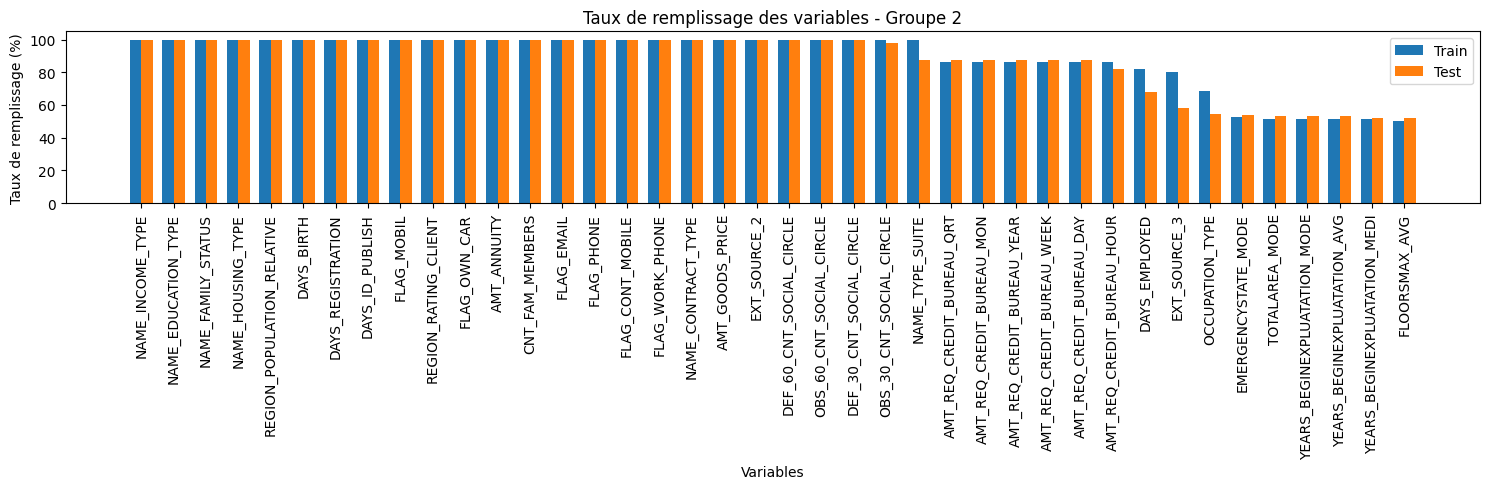

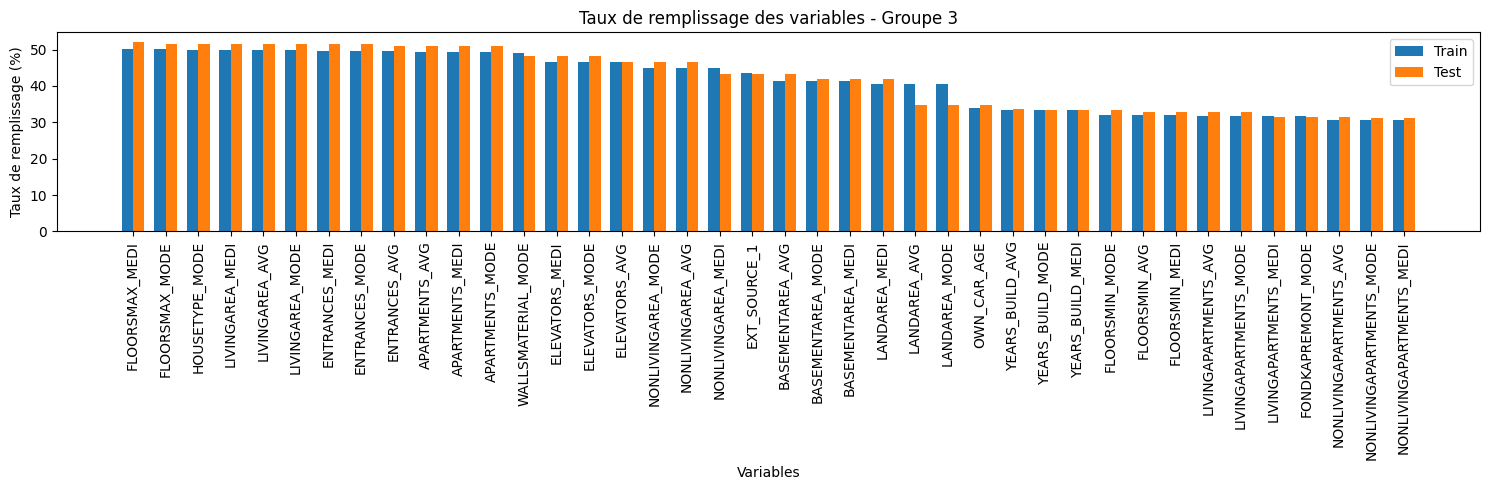

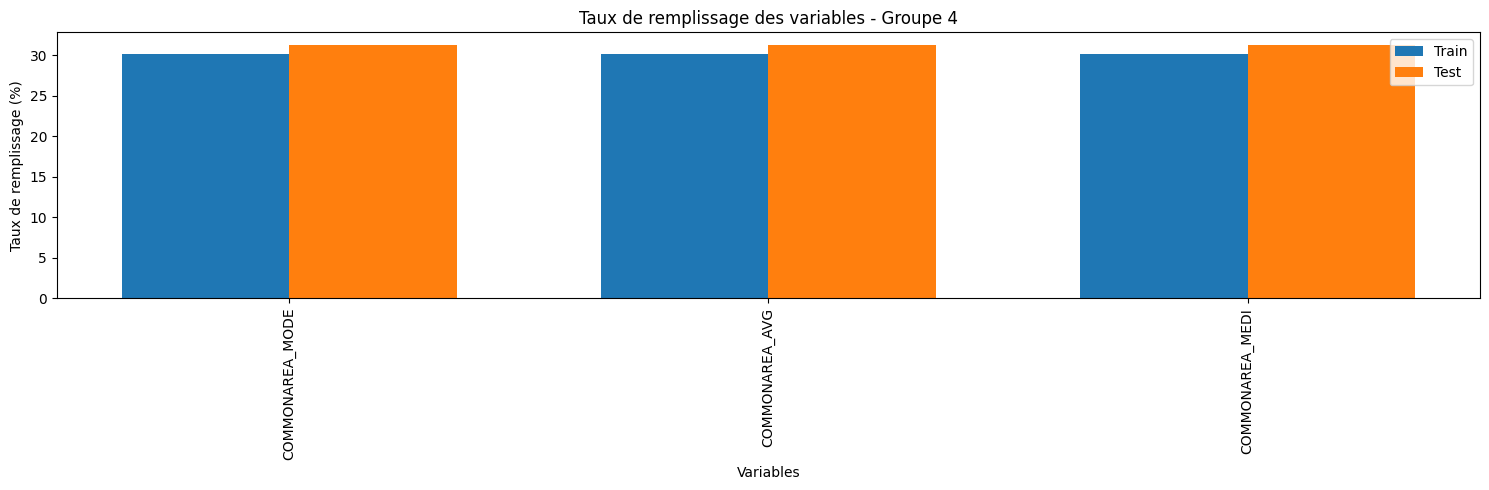

In [88]:
tracer_taux_remplissage_groupes_train_test(num_var_manquante_train, num_var_manquante_test)

### <div class="alert alert-info"><font color='dimgray'> IV.3.1 Variables Days</font> </div> 

In [89]:
# Identifier les colonnes qui commencent par "DAYS"
colonnes_days_test = [col for col in application_test.columns if col.startswith('DAYS')]

In [90]:
colonnes_days_test

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

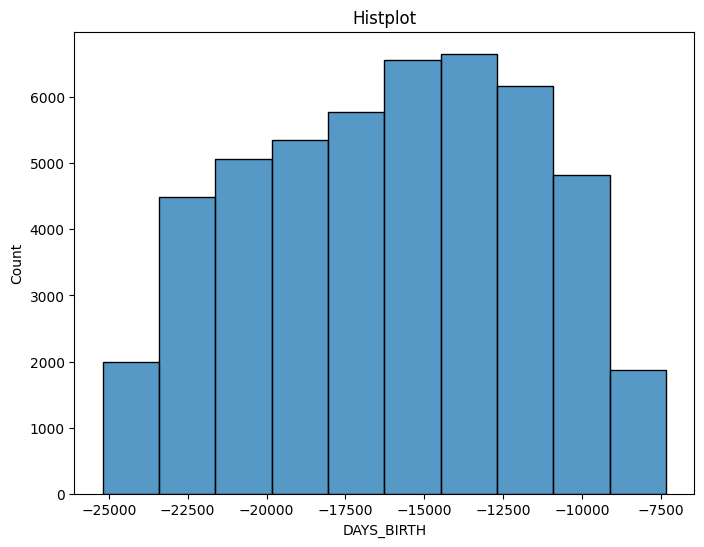

In [91]:
display_histplot(application_test, x='DAYS_BIRTH', bins=10)

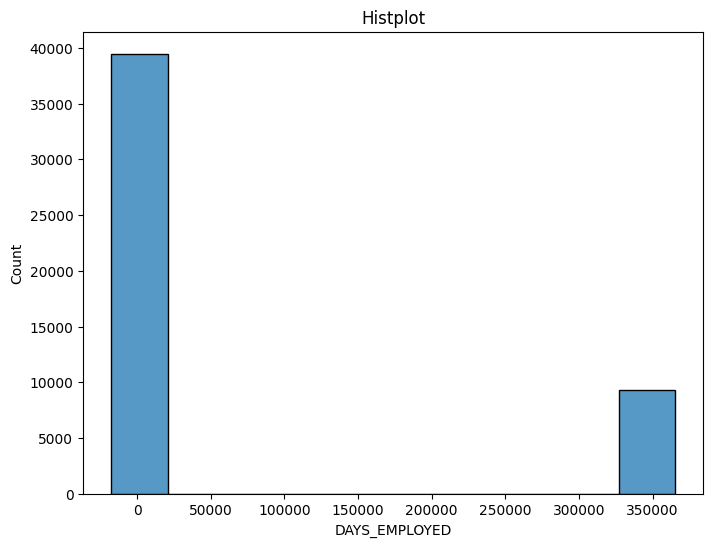

In [92]:
display_histplot(application_test, x='DAYS_EMPLOYED', bins=10)

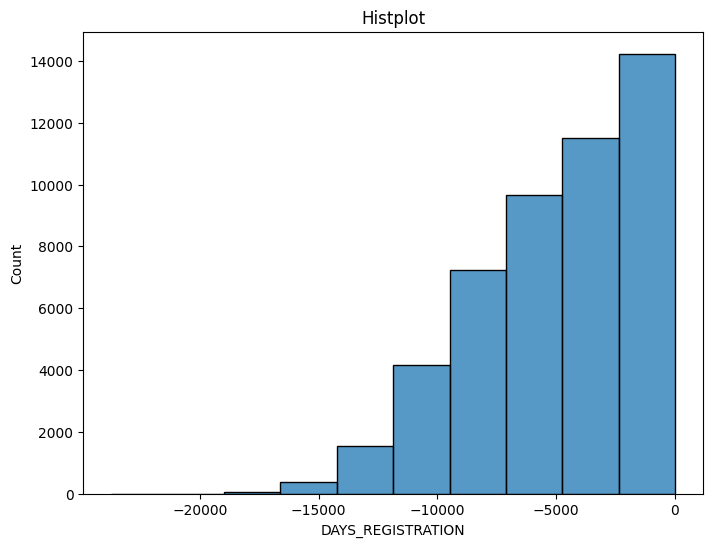

In [93]:
display_histplot(application_test, x='DAYS_REGISTRATION', bins=10)

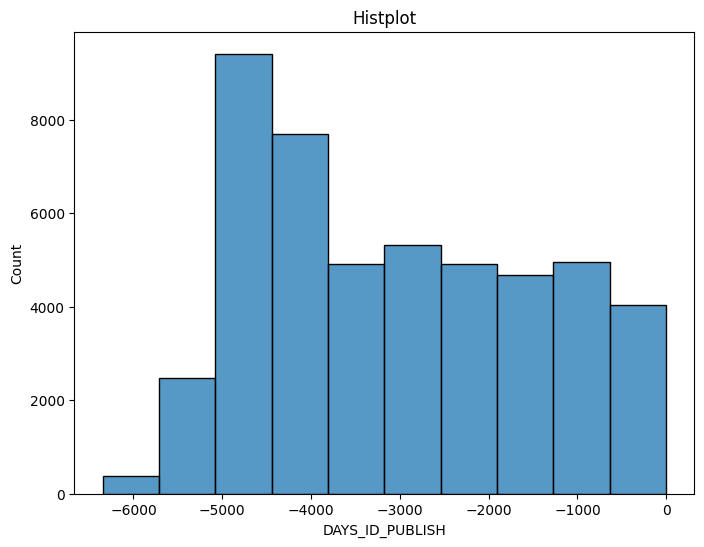

In [94]:
display_histplot(application_test, x='DAYS_ID_PUBLISH', bins=10)

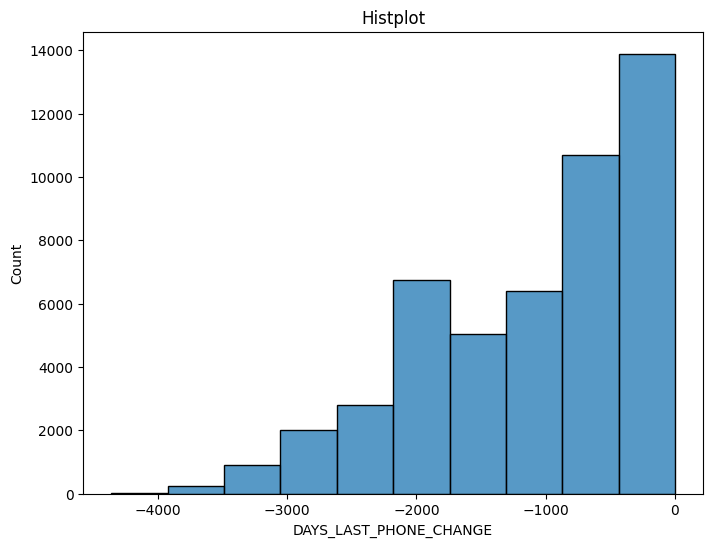

In [95]:
display_histplot(application_test, x='DAYS_LAST_PHONE_CHANGE', bins=10)

In [96]:
# Remplacer les valeurs extrêmement positives dans 'DAYS_EMPLOYED' par NaN

application_test['DAYS_EMPLOYED'] = application_test['DAYS_EMPLOYED'].apply(lambda x: np.nan if x > 0 else x)

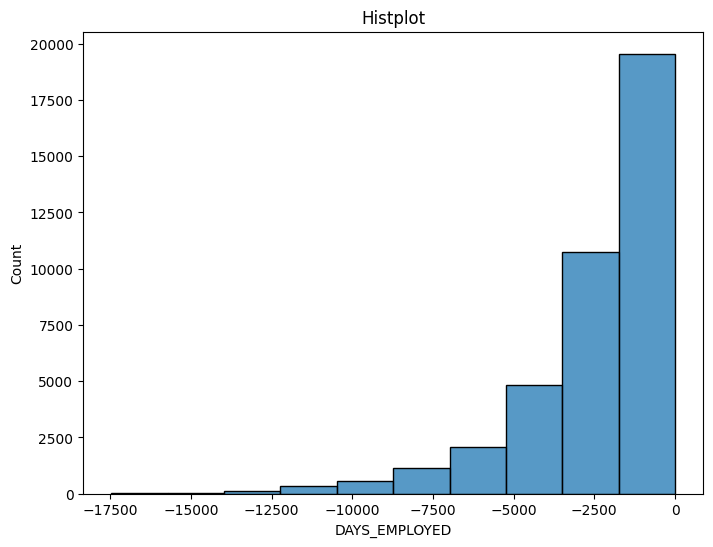

In [97]:
display_histplot(application_test, x='DAYS_EMPLOYED', bins=10)

### <div class="alert alert-info"><font color='dimgray'>IV.4 Aperçu général: jeu de données bureau  </font> </div>

In [98]:
print('Taille de jeu de données: ', bureau.shape)
bureau.head()

Taille de jeu de données:  (1716428, 17)


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

<div class="alert alert-success">
 
La base de données **bureau** contient les informations sur les crédits antérieurs des clients, accordés par d'autres institutions financières. Chaque enregistrement dans cette base représente un crédit distinct. Il est à noter qu'un seul client, qui demande un prêt, peut se voir associé à **plusieurs enregistrements** (c'est-à-dire plusieurs crédits existants). Ainsi, une entrée unique dans la base de données **application_train** ou **application_test** peut correspondre à une ou plusieurs lignes dans la base de données **bureau**.
    
</div>

In [99]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [100]:
test_remplissage(bureau)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_CURR                           100.00                             0
DAYS_CREDIT_UPDATE                   100.00                             0
CREDIT_ACTIVE                        100.00                             0
CREDIT_CURRENCY                      100.00                             0
DAYS_CREDIT                          100.00                             0
CREDIT_DAY_OVERDUE                   100.00                             0
SK_ID_BUREAU                         100.00                             0
CNT_CREDIT_PROLONG                   100.00                             0
AMT_CREDIT_SUM                       100.00                            13
AMT_CREDIT_SUM_OVERDUE               100.00                             0
CREDIT_TYPE                          100.00                             0
DAYS_CREDIT_ENDDATE                   93.85                        105553
AMT_CREDIT_SUM_DEBT                   84.99                        257669
AMT_CREDIT_SUM_LIMIT                  65.52                        591780
DAYS_ENDDATE_FACT                     63.08                        633653
AMT_CREDIT_MAX_OVERDUE                34.49                       1124488
AMT_ANNUITY                           28.53                       1226791

In [101]:
#compter le type de variables
data_type_bureau=bureau.dtypes.value_counts(normalize=True)
data_type_bureau

float64    0.470588
int64      0.352941
object     0.176471
Name: proportion, dtype: float64

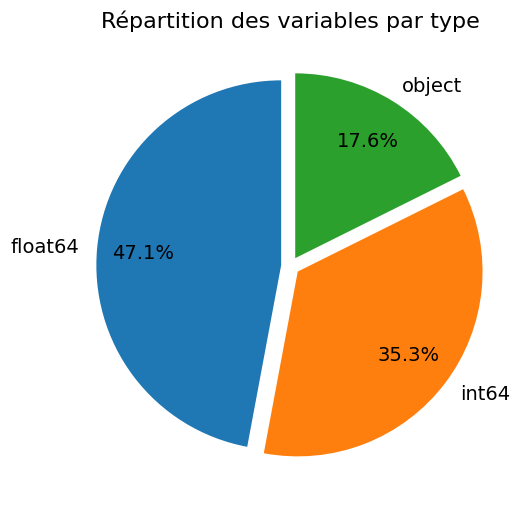

In [102]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_bureau.index
explode = (0.05, 0.05, 0.05)
plt.pie(x=data_type_bureau, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

In [103]:
# Description colonnes num et catg
print("\nColonnes numériques: ")
display(bureau.describe(include=[np.number]))
print("\ncolonnes catégorielles: ")
display(bureau.describe(exclude=[np.number]))


Colonnes numériques: 


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08


colonnes catégorielles: 


CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
count        1716428         1716428          1716428
unique             4               4               15
top           Closed      currency 1  Consumer credit
freq         1079273         1715020          1251615

#### <div class="alert alert-info"><font color='dimgray'>IV.4.1 Matrice de corrélation  </font> </div>

In [104]:
# Ajout de la variable Targuet : 

bureau_target = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')

In [105]:
bureau.shape, bureau_target.shape

((1716428, 17), (1509345, 18))

In [106]:
bureau_target.head()

SK_ID_CURR TARGET  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      100002      1     6158904.0        Closed      currency 1      -1125.0   
1      100002      1     6158905.0        Closed      currency 1       -476.0   
2      100002      1     6158906.0        Closed      currency 1      -1437.0   
3      100002      1     6158907.0        Closed      currency 1      -1121.0   
4      100002      1     6158908.0        Closed      currency 1       -645.0   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                 0.0              -1038.0            -1038.0   
1                 0.0                  NaN              -48.0   
2                 0.0              -1072.0            -1185.0   
3                 0.0               -911.0             -911.0   
4                 0.0                 85.0              -36.0   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                 0.0         40761.0   
1                     NaN                 0.0             0.0   
2                   0.000                 0.0        135000.0   
3                3321.000                 0.0         19071.0   
4                5043.645                 0.0        120735.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  NaN                   NaN                     0.0   
1                  0.0                   NaN                     0.0   
2                  0.0                   0.0                     0.0   
3                  NaN                   NaN                     0.0   
4                  0.0                   0.0                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0      Credit card             -1038.0          0.0  
1      Credit card               -47.0          NaN  
2  Consumer credit             -1185.0          0.0  
3  Consumer credit              -906.0          0.0  
4  Consumer credit               -34.0          0.0

**Variables Catégorielles**

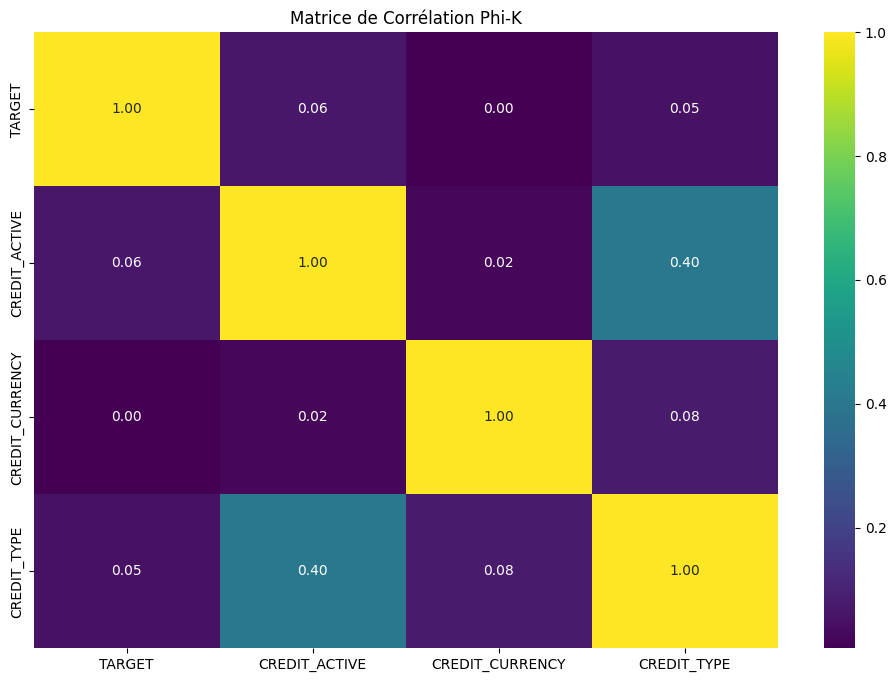

TARGET  CREDIT_ACTIVE  CREDIT_CURRENCY  CREDIT_TYPE
TARGET           1.000000       0.064481         0.004993     0.049954
CREDIT_ACTIVE    0.064481       1.000000         0.021348     0.404209
CREDIT_CURRENCY  0.004993       0.021348         1.000000     0.075804
CREDIT_TYPE      0.049954       0.404209         0.075804     1.000000

In [107]:
calculer_et_visualiser_phi_k_train(bureau_target, "TARGET")

In [108]:
calculer_et_afficher_top_phi_k(bureau_target, 'TARGET', 10)

Variable  PhiK-Correlation
1    CREDIT_ACTIVE          0.064481
2      CREDIT_TYPE          0.049954
3  CREDIT_CURRENCY          0.004993

**Variables numériques**

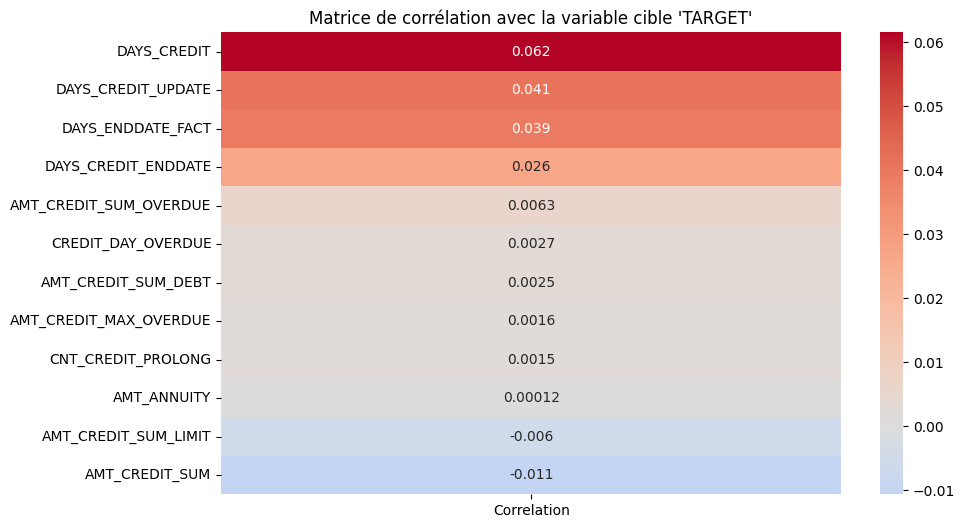

Correlation
DAYS_CREDIT                0.061556
CREDIT_DAY_OVERDUE         0.002652
DAYS_CREDIT_ENDDATE        0.026497
DAYS_ENDDATE_FACT          0.039057
AMT_CREDIT_MAX_OVERDUE     0.001587
CNT_CREDIT_PROLONG         0.001523
AMT_CREDIT_SUM            -0.010606
AMT_CREDIT_SUM_DEBT        0.002539
AMT_CREDIT_SUM_LIMIT      -0.005990
AMT_CREDIT_SUM_OVERDUE     0.006253
DAYS_CREDIT_UPDATE         0.041076
AMT_ANNUITY                0.000117

In [109]:
calculer_et_visualiser_correlation_avec_target(bureau_target, 'TARGET')

In [110]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(bureau_target, 'TARGET', 10)

In [111]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0             DAYS_CREDIT                          0.061556
1      DAYS_CREDIT_UPDATE                          0.041076
2       DAYS_ENDDATE_FACT                          0.039057
3     DAYS_CREDIT_ENDDATE                          0.026497
4  AMT_CREDIT_SUM_OVERDUE                          0.006253
5      CREDIT_DAY_OVERDUE                          0.002652
6     AMT_CREDIT_SUM_DEBT                          0.002539
7  AMT_CREDIT_MAX_OVERDUE                          0.001587
8      CNT_CREDIT_PROLONG                          0.001523
9             AMT_ANNUITY                          0.000117

In [112]:
top_negatives_train

Variable  Corrélation Négative avec TARGET
0        AMT_CREDIT_SUM                         -0.010606
1  AMT_CREDIT_SUM_LIMIT                         -0.005990

In [113]:
bureau["DAYS_CREDIT"].describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

In [114]:
# Transformation DAYS_CREDIT en années à partir du nombre de jours : 
bureau['YEARS_CREDIT'] = bureau['DAYS_CREDIT']*(-1) / 365

In [115]:
bureau_target['YEARS_CREDIT'] = bureau_target['DAYS_CREDIT']*(-1) / 365

c:\Windows\Temp\ipykernel_12740\2369242595.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Windows\Temp\ipykernel_12740\2369242595.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


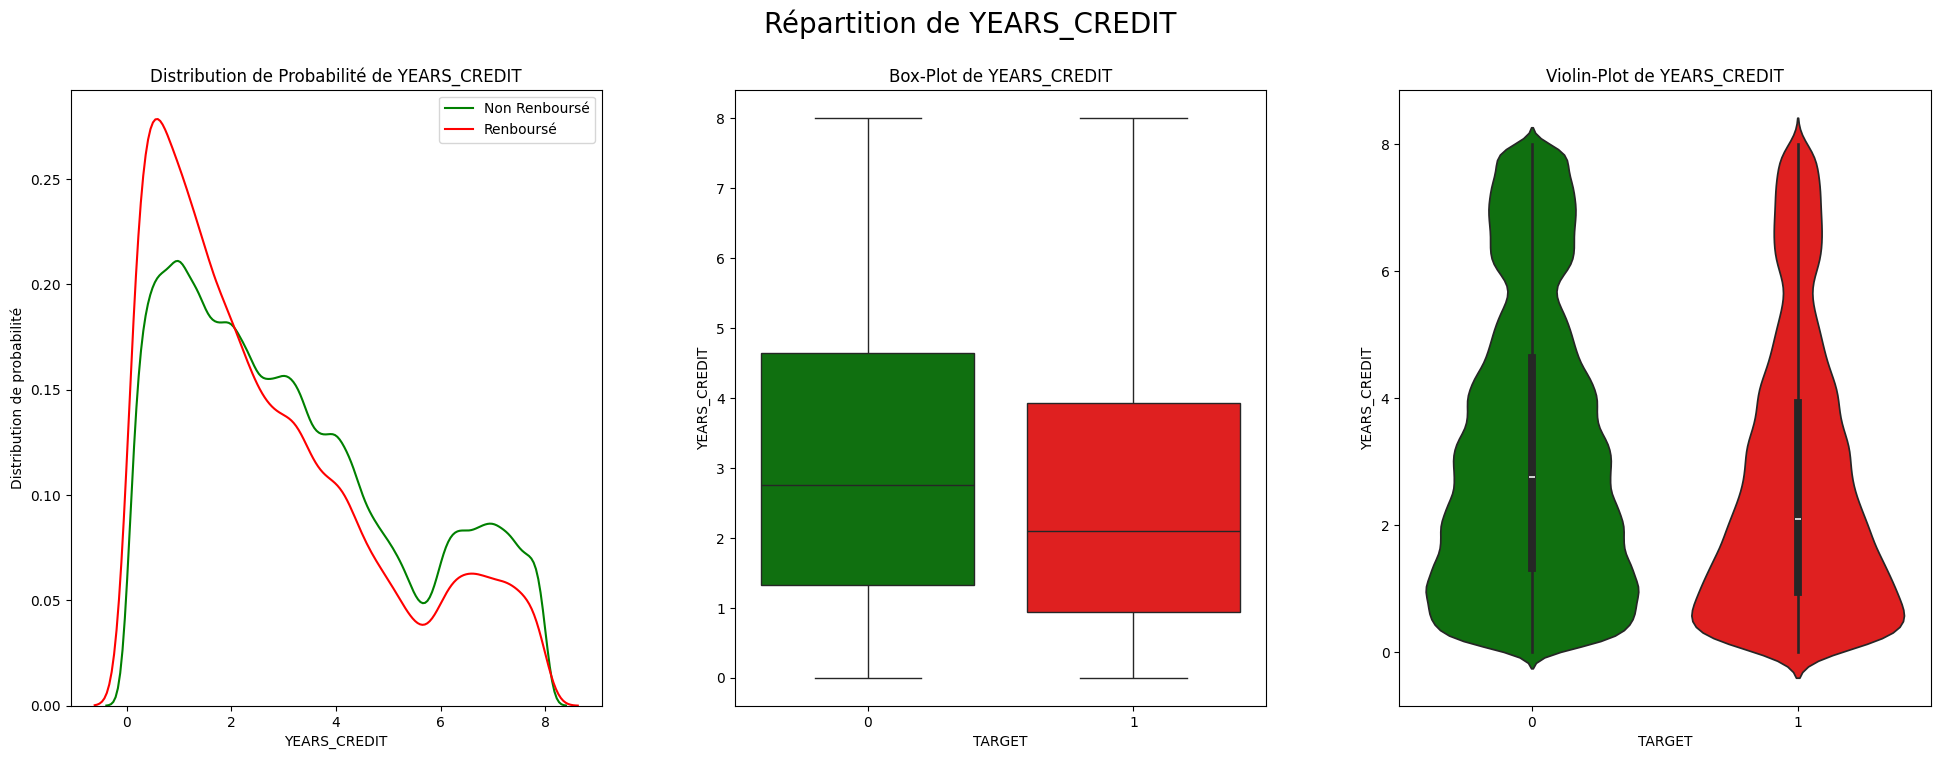

In [116]:
graph_variable_EXT_SOURCE(bureau_target,'YEARS_CREDIT', plots=['kde', 'box','violin'], figsize=(24, 8))

### <div class="alert alert-info"><font color='dimgray'>IV.5 Aperçu général: jeu de données bureau_balance  </font> </div>

In [117]:
print('Taille de jeu de données: ', bureau_balance.shape)
bureau_balance.head()

Taille de jeu de données:  (27299925, 3)


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

<div class="alert alert-success">
 
La base de données **bureau_balance** offre une vue mensuelle des informations présentes dans la base de données **bureau**. Dans cette base, chaque ligne représente un mois spécifique d'un crédit. Le nombre de lignes pour un crédit donné est donc équivalent au nombre de mois pendant lesquels ce crédit a été actif.
    
</div>

In [118]:
bureau_balance.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [119]:
test_remplissage(bureau_balance)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_BUREAU                  100.0                             0
MONTHS_BALANCE                100.0                             0
STATUS                        100.0                             0

In [120]:
#compter le type de variables
data_type_bureau_balance=bureau_balance.dtypes.value_counts(normalize=True)
data_type_bureau_balance

int64     0.666667
object    0.333333
Name: proportion, dtype: float64

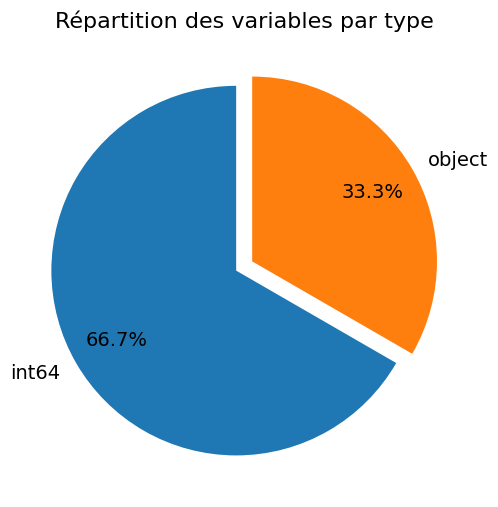

In [121]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_bureau_balance.index
explode = (0.05, 0.05)
plt.pie(x=data_type_bureau_balance, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

### <div class="alert alert-info"><font color='dimgray'>IV.6 Aperçu général: jeu de données credit_card_balance  </font> </div>

In [122]:
print('Taille de jeu de données: ', credit_card_balance.shape)
credit_card_balance.head()

Taille de jeu de données:  (3840312, 23)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

<div class="alert alert-success">
 
La base de données **credit_card_balance** contient des informations mensuelles relatives aux cartes de crédit détenues par les clients auprès de Home Credit. Chaque enregistrement dans cette base représente un mois donné, et le nombre total de lignes pour une carte de crédit spécifique correspond au nombre de mois pendant lesquels cette carte a été utilisée.
    
</div>

In [123]:
credit_card_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

In [124]:
test_remplissage(credit_card_balance)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_PREV                               100.00                             0
SK_ID_CURR                               100.00                             0
SK_DPD                                   100.00                             0
NAME_CONTRACT_STATUS                     100.00                             0
CNT_DRAWINGS_CURRENT                     100.00                             0
AMT_TOTAL_RECEIVABLE                     100.00                             0
AMT_RECIVABLE                            100.00                             0
AMT_RECEIVABLE_PRINCIPAL                 100.00                             0
AMT_PAYMENT_TOTAL_CURRENT                100.00                             0
AMT_DRAWINGS_CURRENT                     100.00                             0
AMT_CREDIT_LIMIT_ACTUAL                  100.00                             0
AMT_BALANCE                              100.00                             0
MONTHS_BALANCE                           100.00                             0
SK_DPD_DEF                               100.00                             0
AMT_INST_MIN_REGULARITY                   92.05                        305236
CNT_INSTALMENT_MATURE_CUM                 92.05                        305236
AMT_DRAWINGS_POS_CURRENT                  80.48                        749816
AMT_DRAWINGS_OTHER_CURRENT                80.48                        749816
AMT_DRAWINGS_ATM_CURRENT                  80.48                        749816
CNT_DRAWINGS_ATM_CURRENT                  80.48                        749816
CNT_DRAWINGS_OTHER_CURRENT                80.48                        749816
CNT_DRAWINGS_POS_CURRENT                  80.48                        749816
AMT_PAYMENT_CURRENT                       80.00                        767988

In [125]:
#compter le type de variables
data_type_credit_card_balance=credit_card_balance.dtypes.value_counts(normalize=True)
data_type_credit_card_balance

float64    0.652174
int64      0.304348
object     0.043478
Name: proportion, dtype: float64

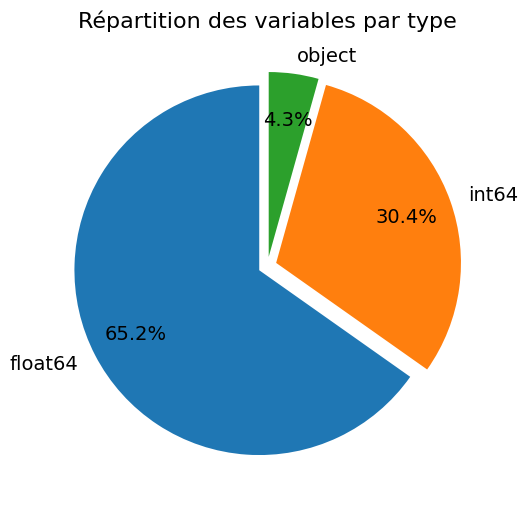

In [126]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_credit_card_balance.index
explode = (0.05, 0.05,0.05)
plt.pie(x=data_type_credit_card_balance, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

#### <div class="alert alert-info"><font color='dimgray'>IV.6.1 Matrice de corrélation  </font> </div>

In [127]:
# Ajout de la variable cible : 

credit_card_balance_target = application_train.iloc[:, :2].merge(credit_card_balance,
                                                    on='SK_ID_CURR',
                                                    how='left') 

In [128]:
credit_card_balance.shape, credit_card_balance_target.shape

((3840312, 23), (3448571, 24))

In [129]:
credit_card_balance_target.head()

SK_ID_CURR TARGET  SK_ID_PREV  MONTHS_BALANCE  AMT_BALANCE  \
0      100002      1         NaN             NaN          NaN   
1      100003      0         NaN             NaN          NaN   
2      100004      0         NaN             NaN          NaN   
3      100006      0   1489396.0            -2.0          0.0   
4      100006      0   1489396.0            -1.0          0.0   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                      NaN                       NaN                   NaN   
1                      NaN                       NaN                   NaN   
2                      NaN                       NaN                   NaN   
3                 270000.0                       NaN                   0.0   
4                 270000.0                       NaN                   0.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         NaN                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                      NaN                  NaN                        NaN   
1                      NaN                  NaN                        NaN   
2                      NaN                  NaN                        NaN   
3                      0.0                  NaN                        0.0   
4                      0.0                  NaN                        0.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                       NaN            NaN                   NaN   
1                       NaN            NaN                   NaN   
2                       NaN            NaN                   NaN   
3                       0.0            0.0                   0.0   
4                       0.0            0.0                   0.0   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       NaN                   NaN                         NaN   
1                       NaN                   NaN                         NaN   
2                       NaN                   NaN                         NaN   
3                       NaN                   0.0                         NaN   
4                       NaN                   0.0                         NaN   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       NaN                        NaN                  NaN   
1                       NaN                        NaN                  NaN   
2                       NaN                        NaN                  NaN   
3                       NaN                        0.0               Active   
4                       NaN                        0.0               Active   

   SK_DPD  SK_DPD_DEF  
0     NaN         NaN  
1     NaN         NaN  
2     NaN         NaN  
3     0.0         0.0  
4     0.0         0.0

**Variables catégorielle**

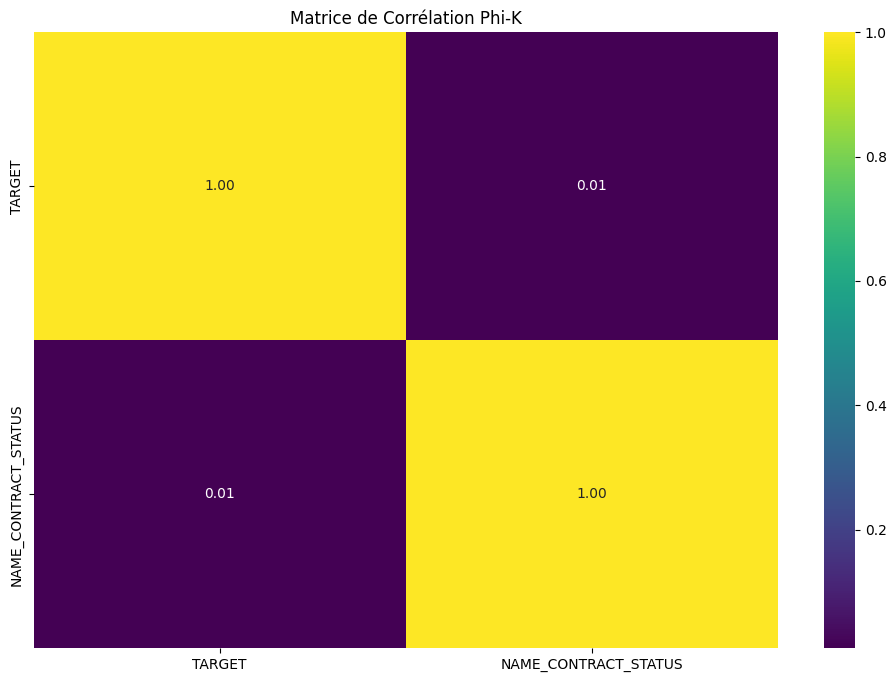

TARGET  NAME_CONTRACT_STATUS
TARGET                1.000000              0.008896
NAME_CONTRACT_STATUS  0.008896              1.000000

In [130]:
calculer_et_visualiser_phi_k_train(credit_card_balance_target, "TARGET")

**Variables Numérique**

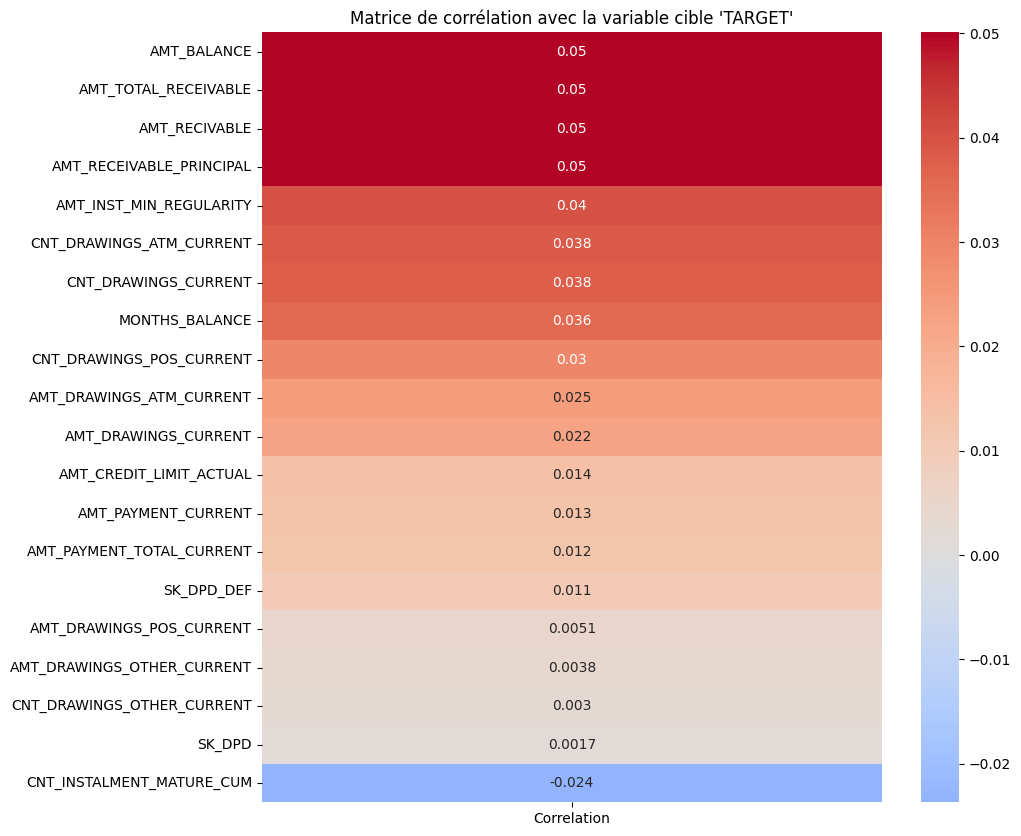

Correlation
MONTHS_BALANCE                 0.035695
AMT_BALANCE                    0.050098
AMT_CREDIT_LIMIT_ACTUAL        0.013823
AMT_DRAWINGS_ATM_CURRENT       0.024700
AMT_DRAWINGS_CURRENT           0.022378
AMT_DRAWINGS_OTHER_CURRENT     0.003843
AMT_DRAWINGS_POS_CURRENT       0.005084
AMT_INST_MIN_REGULARITY        0.039798
AMT_PAYMENT_CURRENT            0.012929
AMT_PAYMENT_TOTAL_CURRENT      0.012302
AMT_RECEIVABLE_PRINCIPAL       0.049692
AMT_RECIVABLE                  0.049803
AMT_TOTAL_RECEIVABLE           0.049839
CNT_DRAWINGS_ATM_CURRENT       0.038437
CNT_DRAWINGS_CURRENT           0.037793
CNT_DRAWINGS_OTHER_CURRENT     0.003044
CNT_DRAWINGS_POS_CURRENT       0.029536
CNT_INSTALMENT_MATURE_CUM     -0.023684
SK_DPD                         0.001684
SK_DPD_DEF                     0.010538

In [131]:
calculer_et_visualiser_correlation_avec_target(credit_card_balance_target, 'TARGET')

In [132]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(credit_card_balance_target, 'TARGET', 10)

In [133]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0               AMT_BALANCE                          0.050098
1      AMT_TOTAL_RECEIVABLE                          0.049839
2             AMT_RECIVABLE                          0.049803
3  AMT_RECEIVABLE_PRINCIPAL                          0.049692
4   AMT_INST_MIN_REGULARITY                          0.039798
5  CNT_DRAWINGS_ATM_CURRENT                          0.038437
6      CNT_DRAWINGS_CURRENT                          0.037793
7            MONTHS_BALANCE                          0.035695
8  CNT_DRAWINGS_POS_CURRENT                          0.029536
9  AMT_DRAWINGS_ATM_CURRENT                          0.024700

In [134]:
top_negatives_train

Variable  Corrélation Négative avec TARGET
0  CNT_INSTALMENT_MATURE_CUM                         -0.023684

### <div class="alert alert-info"><font color='dimgray'>IV.7 Aperçu général: jeu de données installments_payment  </font> </div>

In [135]:
print('Taille de jeu de données: ', installments_payments.shape)
installments_payments.head()

Taille de jeu de données:  (13605401, 8)


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

<div class="alert alert-success">
 
La base de données **installments_payments** recueille l'historique des remboursements des crédits antérieurs octroyés par Home Credit, où chaque ligne documente un crédit spécifique.
    
</div>

In [136]:
test_remplissage(installments_payments)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_PREV                           100.00                             0
SK_ID_CURR                           100.00                             0
NUM_INSTALMENT_VERSION               100.00                             0
NUM_INSTALMENT_NUMBER                100.00                             0
DAYS_INSTALMENT                      100.00                             0
AMT_INSTALMENT                       100.00                             0
DAYS_ENTRY_PAYMENT                    99.98                          2905
AMT_PAYMENT                           99.98                          2905

In [137]:
installments_payments.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

In [138]:
#compter le type de variables
data_type_installments_payments=installments_payments.dtypes.value_counts(normalize=True)
data_type_installments_payments

float64    0.625
int64      0.375
Name: proportion, dtype: float64

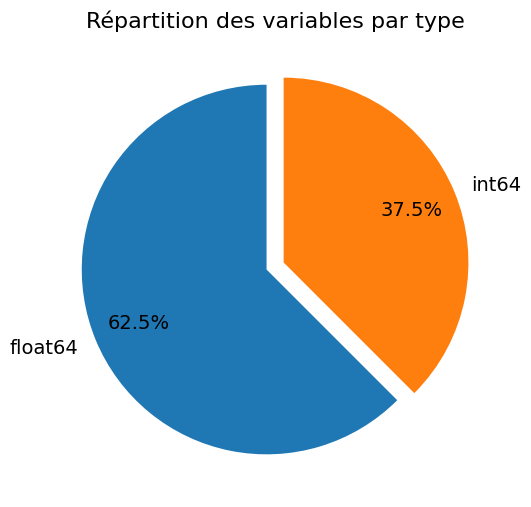

In [139]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_installments_payments.index
explode = (0.05, 0.05)
plt.pie(x=data_type_installments_payments, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

#### <div class="alert alert-info"><font color='dimgray'>IV.7. Matrice de corrélation  </font> </div>

In [140]:
# Ajout de la variable cible : 

installments_payments_target = application_train.iloc[:, :2].merge(installments_payments,
                                                    on='SK_ID_CURR',
                                                    how='left') 

In [141]:
installments_payments.shape, installments_payments_target.shape

((13605401, 8), (11607460, 9))

**Variables Numériques**

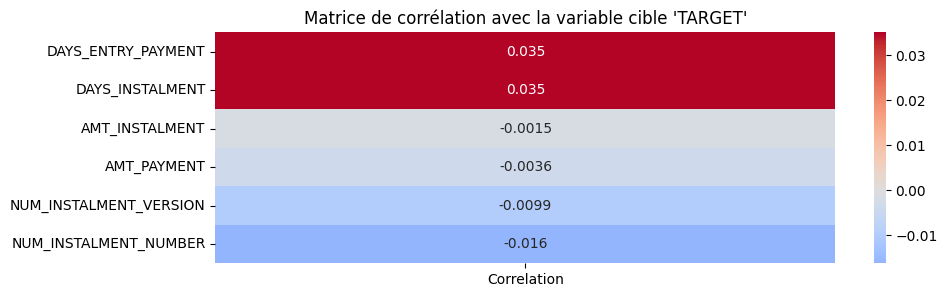

Correlation
NUM_INSTALMENT_VERSION    -0.009896
NUM_INSTALMENT_NUMBER     -0.016190
DAYS_INSTALMENT            0.034974
DAYS_ENTRY_PAYMENT         0.035122
AMT_INSTALMENT            -0.001498
AMT_PAYMENT               -0.003623

In [142]:
calculer_et_visualiser_correlation_avec_target(installments_payments_target, 'TARGET')

In [143]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(installments_payments_target, 'TARGET', 10)

In [144]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0  DAYS_ENTRY_PAYMENT                          0.035122
1     DAYS_INSTALMENT                          0.034974

In [145]:
top_negatives_train

Variable  Corrélation Négative avec TARGET
0   NUM_INSTALMENT_NUMBER                         -0.016190
1  NUM_INSTALMENT_VERSION                         -0.009896
2             AMT_PAYMENT                         -0.003623
3          AMT_INSTALMENT                         -0.001498

### <div class="alert alert-info"><font color='dimgray'>IV.8 Aperçu général: jeu de données POS_CASH_balance </font> </div>

In [146]:
print('Taille de jeu de données: ', POS_CASH_balance.shape)
POS_CASH_balance.head()

Taille de jeu de données:  (10001358, 8)


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [147]:
test_remplissage(POS_CASH_balance)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_PREV                          100.00                             0
SK_ID_CURR                          100.00                             0
MONTHS_BALANCE                      100.00                             0
NAME_CONTRACT_STATUS                100.00                             0
SK_DPD                              100.00                             0
SK_DPD_DEF                          100.00                             0
CNT_INSTALMENT                       99.74                         26071
CNT_INSTALMENT_FUTURE                99.74                         26087

In [148]:
POS_CASH_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [149]:
#compter le type de variables
data_type_POS_CASH_balance=POS_CASH_balance.dtypes.value_counts(normalize=True)
data_type_POS_CASH_balance

int64      0.625
float64    0.250
object     0.125
Name: proportion, dtype: float64

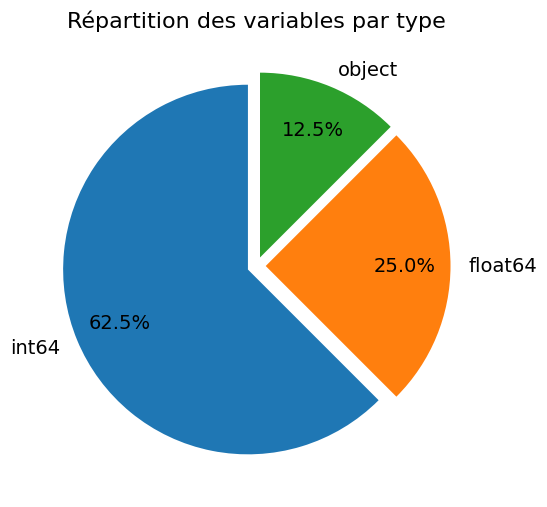

In [150]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_POS_CASH_balance.index
explode = (0.05, 0.05,0.05)
plt.pie(x=data_type_POS_CASH_balance, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

#### <div class="alert alert-info"><font color='dimgray'>IV.8.1 Matrice de corrélation </font> </div>

In [151]:
# Ajout de la variable cible : 

POS_CASH_balance_target = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                    on='SK_ID_CURR',
                                                    how='left') 

In [152]:
POS_CASH_balance_target.shape, POS_CASH_balance.shape

((8561442, 9), (10001358, 8))

**Variables Catégorielles**

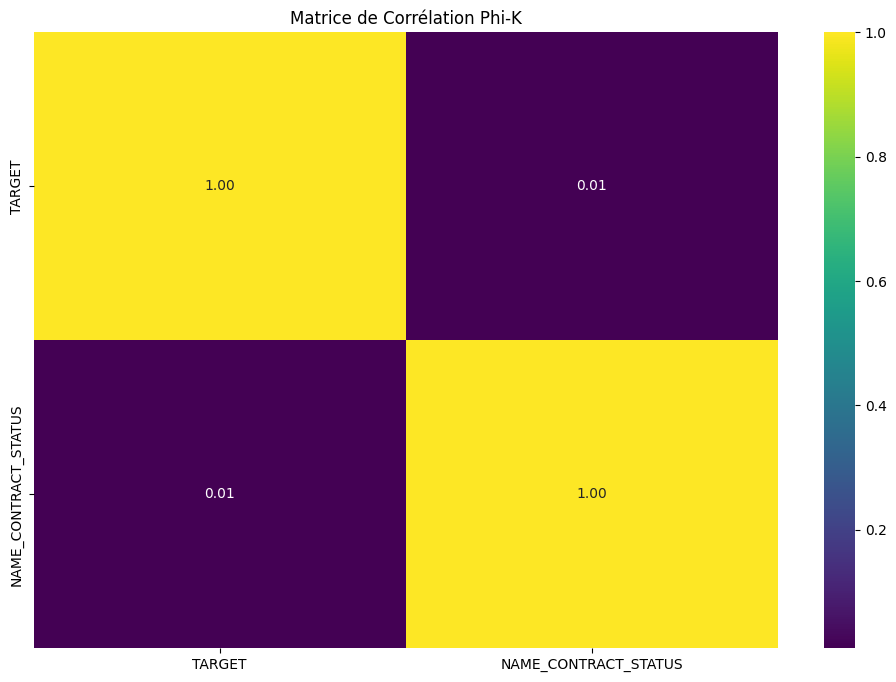

TARGET  NAME_CONTRACT_STATUS
TARGET                1.000000              0.009566
NAME_CONTRACT_STATUS  0.009566              1.000000

In [153]:
calculer_et_visualiser_phi_k_train(POS_CASH_balance_target, "TARGET")

**Variables Numériques**

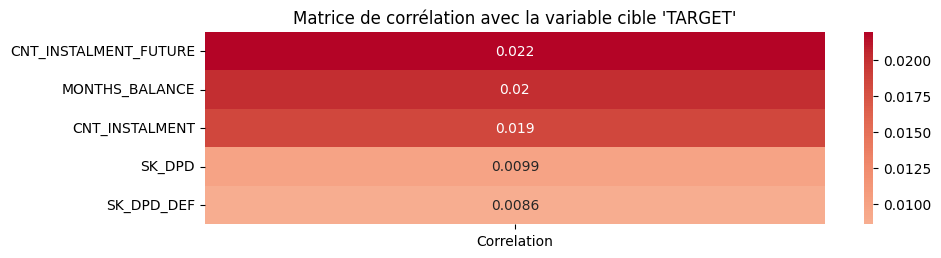

Correlation
MONTHS_BALANCE            0.020147
CNT_INSTALMENT            0.018506
CNT_INSTALMENT_FUTURE     0.021972
SK_DPD                    0.009866
SK_DPD_DEF                0.008594

In [154]:
calculer_et_visualiser_correlation_avec_target(POS_CASH_balance_target, 'TARGET')

In [155]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(POS_CASH_balance_target, 'TARGET', 10)

In [156]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0  CNT_INSTALMENT_FUTURE                          0.021972
1         MONTHS_BALANCE                          0.020147
2         CNT_INSTALMENT                          0.018506
3                 SK_DPD                          0.009866
4             SK_DPD_DEF                          0.008594

In [157]:
top_negatives_train

Empty DataFrame
Columns: [Variable, Corrélation Négative avec TARGET]
Index: []

In [158]:
POS_CASH_balance_target["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Active                   7818577
Completed                 634872
Signed                     74625
Demand                      6110
Returned to the store       4591
Approved                    4221
Amortized debt               365
Canceled                      12
XNA                            2
Name: count, dtype: int64

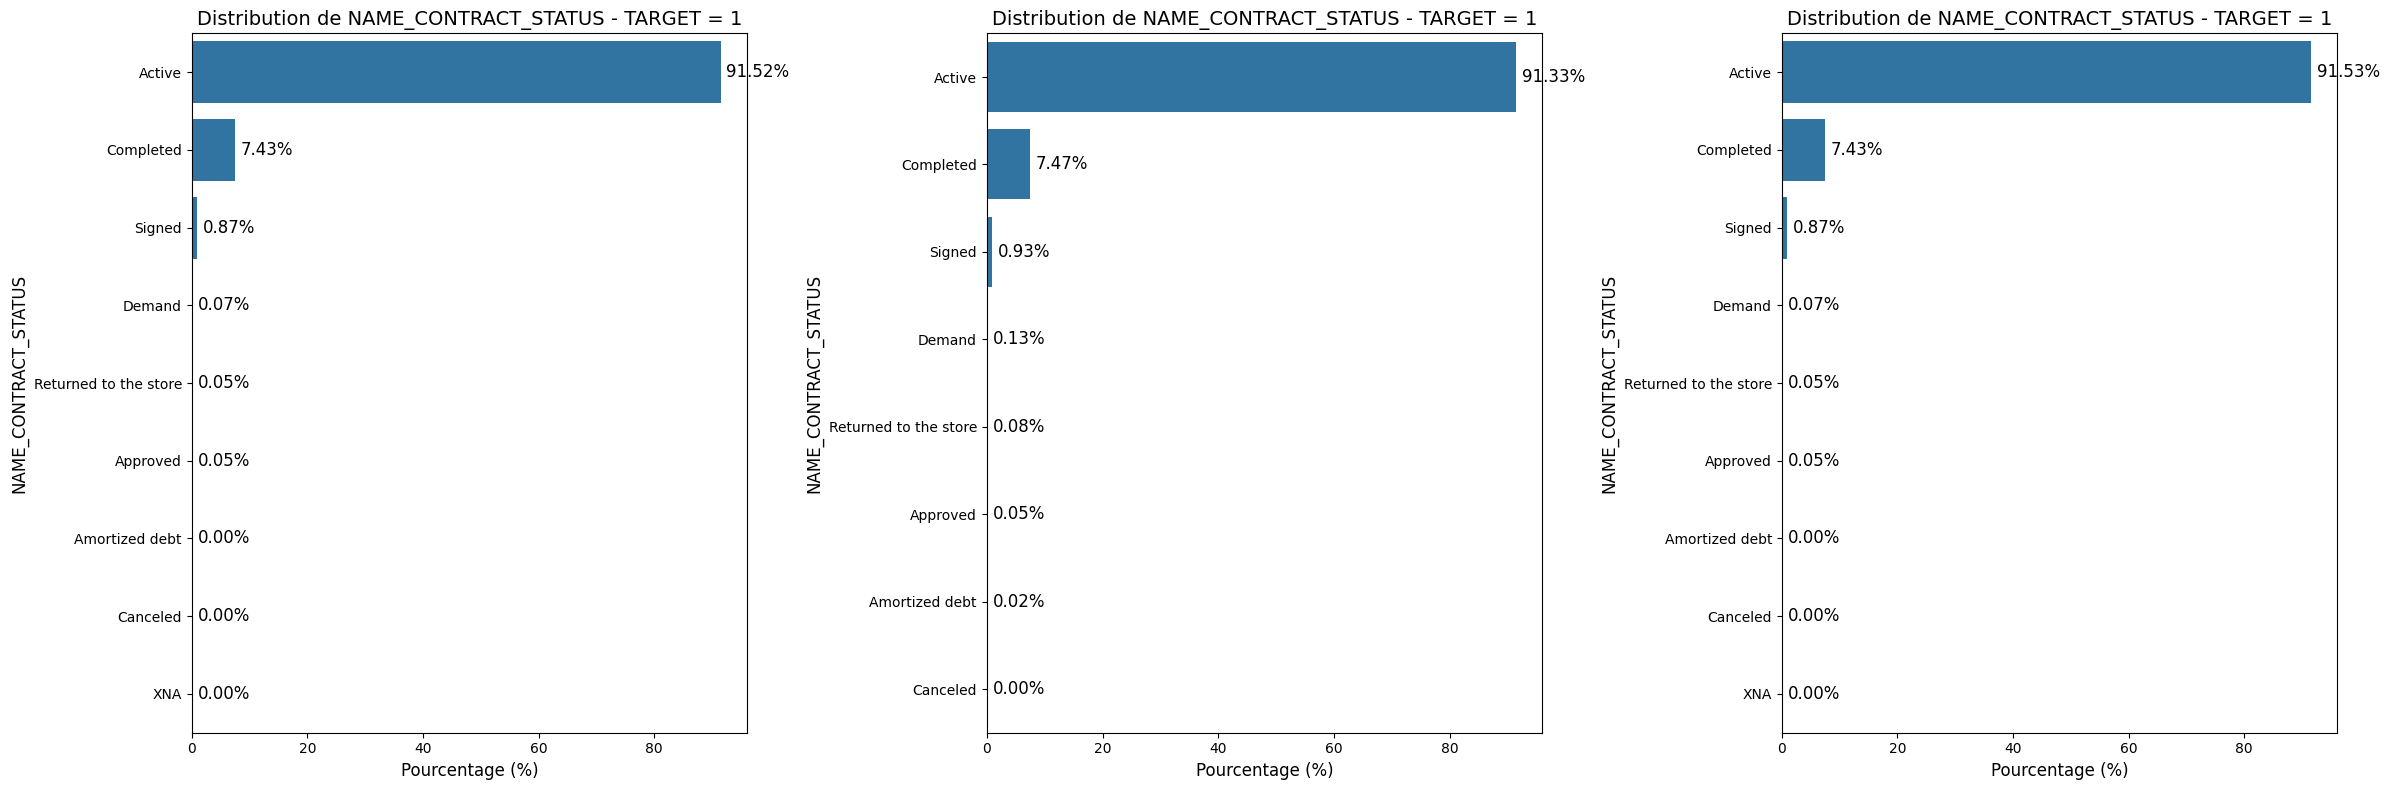

In [159]:
tracer_distribution_variable_en_pourcentage(POS_CASH_balance_target, "NAME_CONTRACT_STATUS", target_col='TARGET')

### <div class="alert alert-info"><font color='dimgray'>IV.9 Aperçu général: jeu de données previous_application </font> </div>

In [160]:
print('Taille de jeu de données: ', previous_application.shape)
previous_application.head()

Taille de jeu de données:  (1670214, 37)


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

<div class="alert alert-success">
 
La base de données **previous_application** compile les demandes antérieures des clients figurant dans la base de données **application_data**. Chaque demande y est enregistrée sous une ligne distincte et est identifiable par le numéro unique **SK_ID_PREV**.
    
</div>

In [161]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [162]:
test_remplissage(previous_application)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_PREV                                100.00                             0
NAME_CASH_LOAN_PURPOSE                    100.00                             0
NAME_YIELD_GROUP                          100.00                             0
NAME_SELLER_INDUSTRY                      100.00                             0
SELLERPLACE_AREA                          100.00                             0
CHANNEL_TYPE                              100.00                             0
NAME_PRODUCT_TYPE                         100.00                             0
NAME_PORTFOLIO                            100.00                             0
NAME_GOODS_CATEGORY                       100.00                             0
NAME_CLIENT_TYPE                          100.00                             0
CODE_REJECT_REASON                        100.00                             0
SK_ID_CURR                                100.00                             0
DAYS_DECISION                             100.00                             0
NAME_CONTRACT_STATUS                      100.00                             0
NAME_PAYMENT_TYPE                         100.00                             0
AMT_APPLICATION                           100.00                             0
NFLAG_LAST_APPL_IN_DAY                    100.00                             0
FLAG_LAST_APPL_PER_CONTRACT               100.00                             0
HOUR_APPR_PROCESS_START                   100.00                             0
WEEKDAY_APPR_PROCESS_START                100.00                             0
AMT_CREDIT                                100.00                             1
NAME_CONTRACT_TYPE                        100.00                             0
PRODUCT_COMBINATION                        99.98                           346
AMT_ANNUITY                                77.71                        372235
CNT_PAYMENT                                77.71                        372230
AMT_GOODS_PRICE                            76.92                        385515
DAYS_FIRST_DRAWING                         59.70                        673065
DAYS_TERMINATION                           59.70                        673065
DAYS_LAST_DUE                              59.70                        673065
DAYS_LAST_DUE_1ST_VERSION                  59.70                        673065
DAYS_FIRST_DUE                             59.70                        673065
NFLAG_INSURED_ON_APPROVAL                  59.70                        673065
NAME_TYPE_SUITE                            50.88                        820405
AMT_DOWN_PAYMENT                           46.36                        895844
RATE_DOWN_PAYMENT                          46.36                        895844
RATE_INTEREST_PRIMARY                       0.36                       1664263
RATE_INTEREST_PRIVILEGED                    0.36                       1664263

In [163]:
#compter le type de variables
data_type_previous_application=previous_application.dtypes.value_counts(normalize=True)
data_type_previous_application

object     0.432432
float64    0.405405
int64      0.162162
Name: proportion, dtype: float64

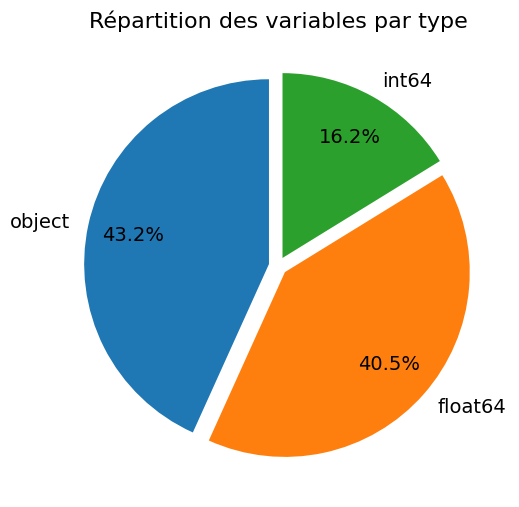

In [164]:
# tracer un graphique de type "pie" 
pie, ax = plt.subplots(figsize=(10,6))
labels=data_type_previous_application.index
explode = (0.05, 0.05,0.05)
plt.pie(x=data_type_previous_application, autopct="%.1f%%",startangle=90,  pctdistance=0.75,explode=explode, textprops={'fontsize': 14},labels=labels)
plt.title('Répartition des variables par type', fontsize=16)
plt.show()

#### <div class="alert alert-info"><font color='dimgray'>IV.9.1 Matrice de corrélation </font> </div>

In [165]:
# Ajout de la variable cible : 

previous_application_target = application_train.iloc[:, :2].merge(previous_application,
                                                    on='SK_ID_CURR',
                                                    how='left') 

In [166]:
previous_application_target.shape, previous_application.shape

((1430155, 38), (1670214, 37))

**Variables Catégorielle**

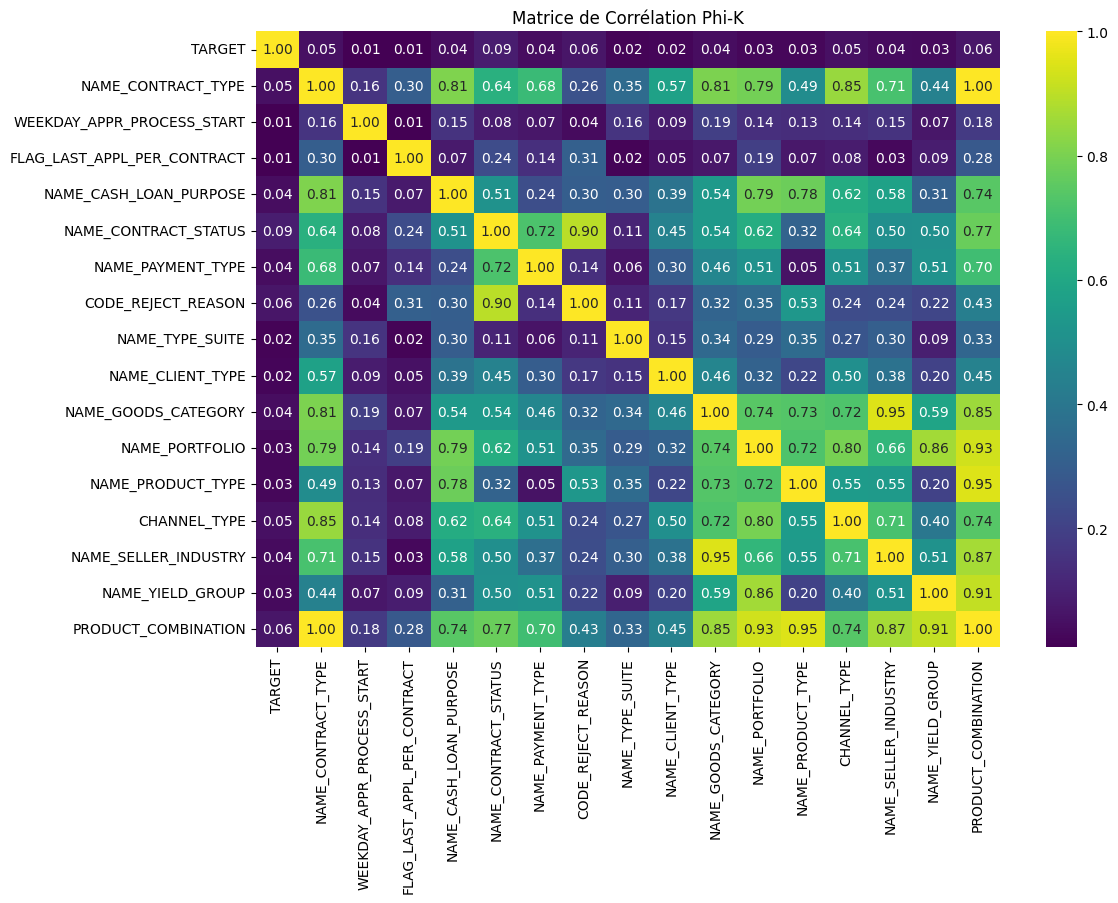

TARGET  NAME_CONTRACT_TYPE  \
TARGET                       1.000000            0.050859   
NAME_CONTRACT_TYPE           0.050859            1.000000   
WEEKDAY_APPR_PROCESS_START   0.008425            0.158083   
FLAG_LAST_APPL_PER_CONTRACT  0.008572            0.301352   
NAME_CASH_LOAN_PURPOSE       0.040305            0.808269   
NAME_CONTRACT_STATUS         0.088266            0.637250   
NAME_PAYMENT_TYPE            0.039752            0.681649   
CODE_REJECT_REASON           0.062771            0.258111   
NAME_TYPE_SUITE              0.016511            0.350977   
NAME_CLIENT_TYPE             0.021842            0.574434   
NAME_GOODS_CATEGORY          0.042951            0.805305   
NAME_PORTFOLIO               0.027619            0.787022   
NAME_PRODUCT_TYPE            0.025912            0.487719   
CHANNEL_TYPE                 0.050302            0.848438   
NAME_SELLER_INDUSTRY         0.038077            0.711412   
NAME_YIELD_GROUP             0.034626            0.441841   
PRODUCT_COMBINATION          0.063839            1.000000   

                             WEEKDAY_APPR_PROCESS_START  \
TARGET                                         0.008425   
NAME_CONTRACT_TYPE                             0.158083   
WEEKDAY_APPR_PROCESS_START                     1.000000   
FLAG_LAST_APPL_PER_CONTRACT                    0.008305   
NAME_CASH_LOAN_PURPOSE                         0.153258   
NAME_CONTRACT_STATUS                           0.082514   
NAME_PAYMENT_TYPE                              0.068508   
CODE_REJECT_REASON                             0.038752   
NAME_TYPE_SUITE                                0.157919   
NAME_CLIENT_TYPE                               0.085653   
NAME_GOODS_CATEGORY                            0.191473   
NAME_PORTFOLIO                                 0.143542   
NAME_PRODUCT_TYPE                              0.134447   
CHANNEL_TYPE                                   0.139835   
NAME_SELLER_INDUSTRY                           0.154371   
NAME_YIELD_GROUP                               0.068624   
PRODUCT_COMBINATION                            0.176167   

                             FLAG_LAST_APPL_PER_CONTRACT  \
TARGET                                          0.008572   
NAME_CONTRACT_TYPE                              0.301352   
WEEKDAY_APPR_PROCESS_START                      0.008305   
FLAG_LAST_APPL_PER_CONTRACT                     1.000000   
NAME_CASH_LOAN_PURPOSE                          0.074238   
NAME_CONTRACT_STATUS                            0.236763   
NAME_PAYMENT_TYPE                               0.141879   
CODE_REJECT_REASON                              0.308118   
NAME_TYPE_SUITE                                 0.018567   
NAME_CLIENT_TYPE                                0.051684   
NAME_GOODS_CATEGORY                             0.073664   
NAME_PORTFOLIO                                  0.191720   
NAME_PRODUCT_TYPE                               0.070817   
CHANNEL_TYPE                                    0.083399   
NAME_SELLER_INDUSTRY                            0.031378   
NAME_YIELD_GROUP                                0.089188   
PRODUCT_COMBINATION                             0.281389   

                             NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  \
TARGET                                     0.040305              0.088266   
NAME_CONTRACT_TYPE                         0.808269              0.637250   
WEEKDAY_APPR_PROCESS_START                 0.153258              0.082514   
FLAG_LAST_APPL_PER_CONTRACT                0.074238              0.236763   
NAME_CASH_LOAN_PURPOSE                     1.000000              0.511752   
NAME_CONTRACT_STATUS                       0.511752              1.000000   
NAME_PAYMENT_TYPE                          0.243967              0.718717   
CODE_REJECT_REASON                         0.299676              0.896251   
NAME_TYPE_SUITE                            0.298184              0.108540   
NAME_CLIENT_TYPE  

In [167]:
calculer_et_visualiser_phi_k_train(previous_application_target, "TARGET")

In [168]:
calculer_et_afficher_top_phi_k(previous_application_target, 'TARGET', 10)

Variable  PhiK-Correlation
1     NAME_CONTRACT_STATUS          0.088266
2      PRODUCT_COMBINATION          0.063839
3       CODE_REJECT_REASON          0.062771
4       NAME_CONTRACT_TYPE          0.050859
5             CHANNEL_TYPE          0.050302
6      NAME_GOODS_CATEGORY          0.042951
7   NAME_CASH_LOAN_PURPOSE          0.040305
8        NAME_PAYMENT_TYPE          0.039752
9     NAME_SELLER_INDUSTRY          0.038077
10        NAME_YIELD_GROUP          0.034626

In [169]:
previous_application_target.head()

SK_ID_CURR TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002      1   1038818.0     Consumer loans     9251.775   
1      100003      0   1810518.0         Cash loans    98356.995   
2      100003      0   2636178.0     Consumer loans    64567.665   
3      100003      0   2396755.0     Consumer loans     6737.310   
4      100004      0   1564014.0     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0         179055.0    179055.0               0.0         179055.0   
1         900000.0   1035882.0               NaN         900000.0   
2         337500.0    348637.5               0.0         337500.0   
3          68809.5     68053.5            6885.0          68809.5   
4          24282.0     20106.0            4860.0          24282.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                      9.0   
1                     FRIDAY                     12.0   
2                     SUNDAY                     17.0   
3                   SATURDAY                     15.0   
4                     FRIDAY                      5.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                     1.0           0.000000   
1                           Y                     1.0                NaN   
2                           Y                     1.0           0.000000   
3                           Y                     1.0           0.100061   
4                           Y                     1.0           0.212008   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0                    NaN                       NaN                    XAP   
1                    NaN                       NaN                    XNA   
2                    NaN                       NaN                    XAP   
3                    NaN                       NaN                    XAP   
4                    NaN                       NaN                    XAP   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved         -606.0                    XNA   
1             Approved         -746.0                    XNA   
2             Approved         -828.0  Cash through the bank   
3             Approved        -2341.0  Cash through the bank   
4             Approved         -815.0  Cash through the bank   

  CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0                XAP             NaN              New              Vehicles   
1                XAP   Unaccompanied         Repeater                   XNA   
2                XAP          Family        Refreshed             Furniture   
3                XAP          Family        Refreshed  Consumer Electronics   
4                XAP   Unaccompanied              New                Mobile   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA                    Stone             500.0   
1           Cash            x-sell  Credit and cash offices              -1.0   
2            POS               XNA                    Stone            1400.0   
3            POS               XNA             Country-wide             200.0   
4            POS               XNA         Regional / Local              30.0   

   NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0       Auto technology         24.0       low_normal   
1                   XNA         12.0       low_normal   
2             Furniture          6.0           middle   
3  Consumer electronics         12.0           middle   
4          Connectivity          4.0           middle   

           PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0      POS other with interest            365243.0          -565.0   
1             Cash X-Sell: low            365243.0          -716.0   
2   POS industry

**Variables Numériques**

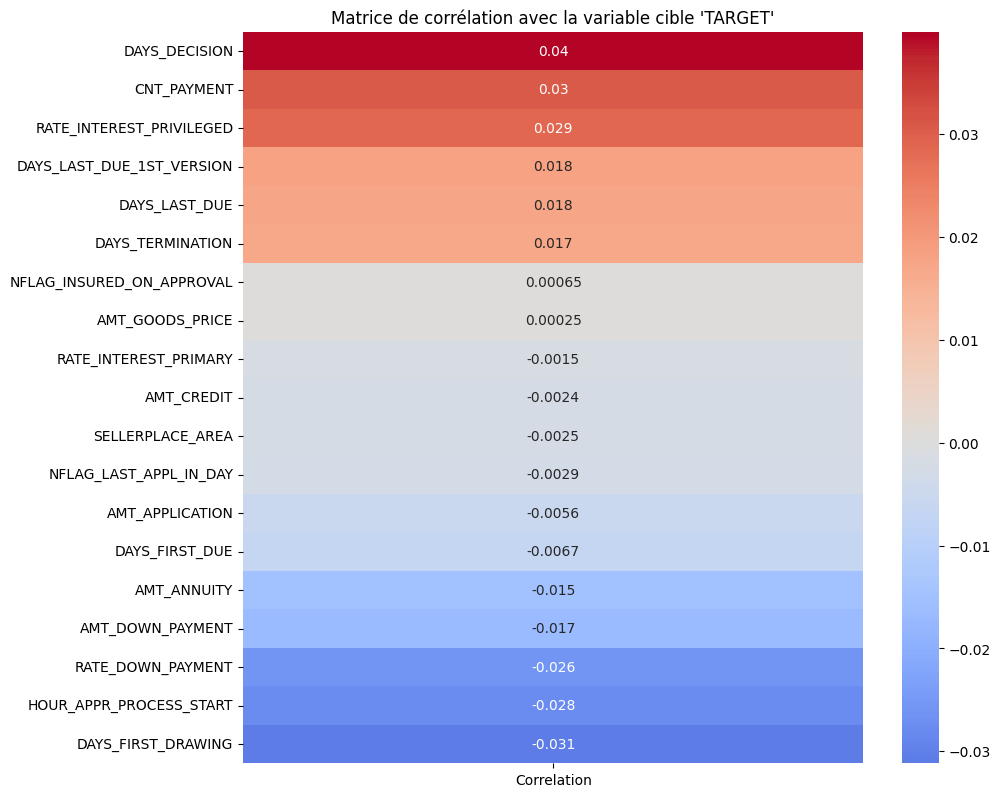

Correlation
AMT_ANNUITY                  -0.014922
AMT_APPLICATION              -0.005583
AMT_CREDIT                   -0.002350
AMT_DOWN_PAYMENT             -0.016918
AMT_GOODS_PRICE               0.000254
HOUR_APPR_PROCESS_START      -0.027809
NFLAG_LAST_APPL_IN_DAY       -0.002887
RATE_DOWN_PAYMENT            -0.026111
RATE_INTEREST_PRIMARY        -0.001470
RATE_INTEREST_PRIVILEGED      0.028640
DAYS_DECISION                 0.039901
SELLERPLACE_AREA             -0.002539
CNT_PAYMENT                   0.030480
DAYS_FIRST_DRAWING           -0.031154
DAYS_FIRST_DUE               -0.006651
DAYS_LAST_DUE_1ST_VERSION     0.018021
DAYS_LAST_DUE                 0.017522
DAYS_TERMINATION              0.016981
NFLAG_INSURED_ON_APPROVAL     0.000653

In [170]:
calculer_et_visualiser_correlation_avec_target(previous_application_target, 'TARGET')

In [171]:
top_positives_train, top_negatives_train = top_correlations_positives_et_negatives_var_num_avec_target(previous_application_target, 'TARGET', 10)

In [172]:
top_positives_train

Variable  Corrélation Positive avec TARGET
0              DAYS_DECISION                          0.039901
1                CNT_PAYMENT                          0.030480
2   RATE_INTEREST_PRIVILEGED                          0.028640
3  DAYS_LAST_DUE_1ST_VERSION                          0.018021
4              DAYS_LAST_DUE                          0.017522
5           DAYS_TERMINATION                          0.016981
6  NFLAG_INSURED_ON_APPROVAL                          0.000653
7            AMT_GOODS_PRICE                          0.000254

In [173]:
top_negatives_train

Variable  Corrélation Négative avec TARGET
0       DAYS_FIRST_DRAWING                         -0.031154
1  HOUR_APPR_PROCESS_START                         -0.027809
2        RATE_DOWN_PAYMENT                         -0.026111
3         AMT_DOWN_PAYMENT                         -0.016918
4              AMT_ANNUITY                         -0.014922
5           DAYS_FIRST_DUE                         -0.006651
6          AMT_APPLICATION                         -0.005583
7   NFLAG_LAST_APPL_IN_DAY                         -0.002887
8         SELLERPLACE_AREA                         -0.002539
9               AMT_CREDIT                         -0.002350

In [174]:
previous_application_target["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64

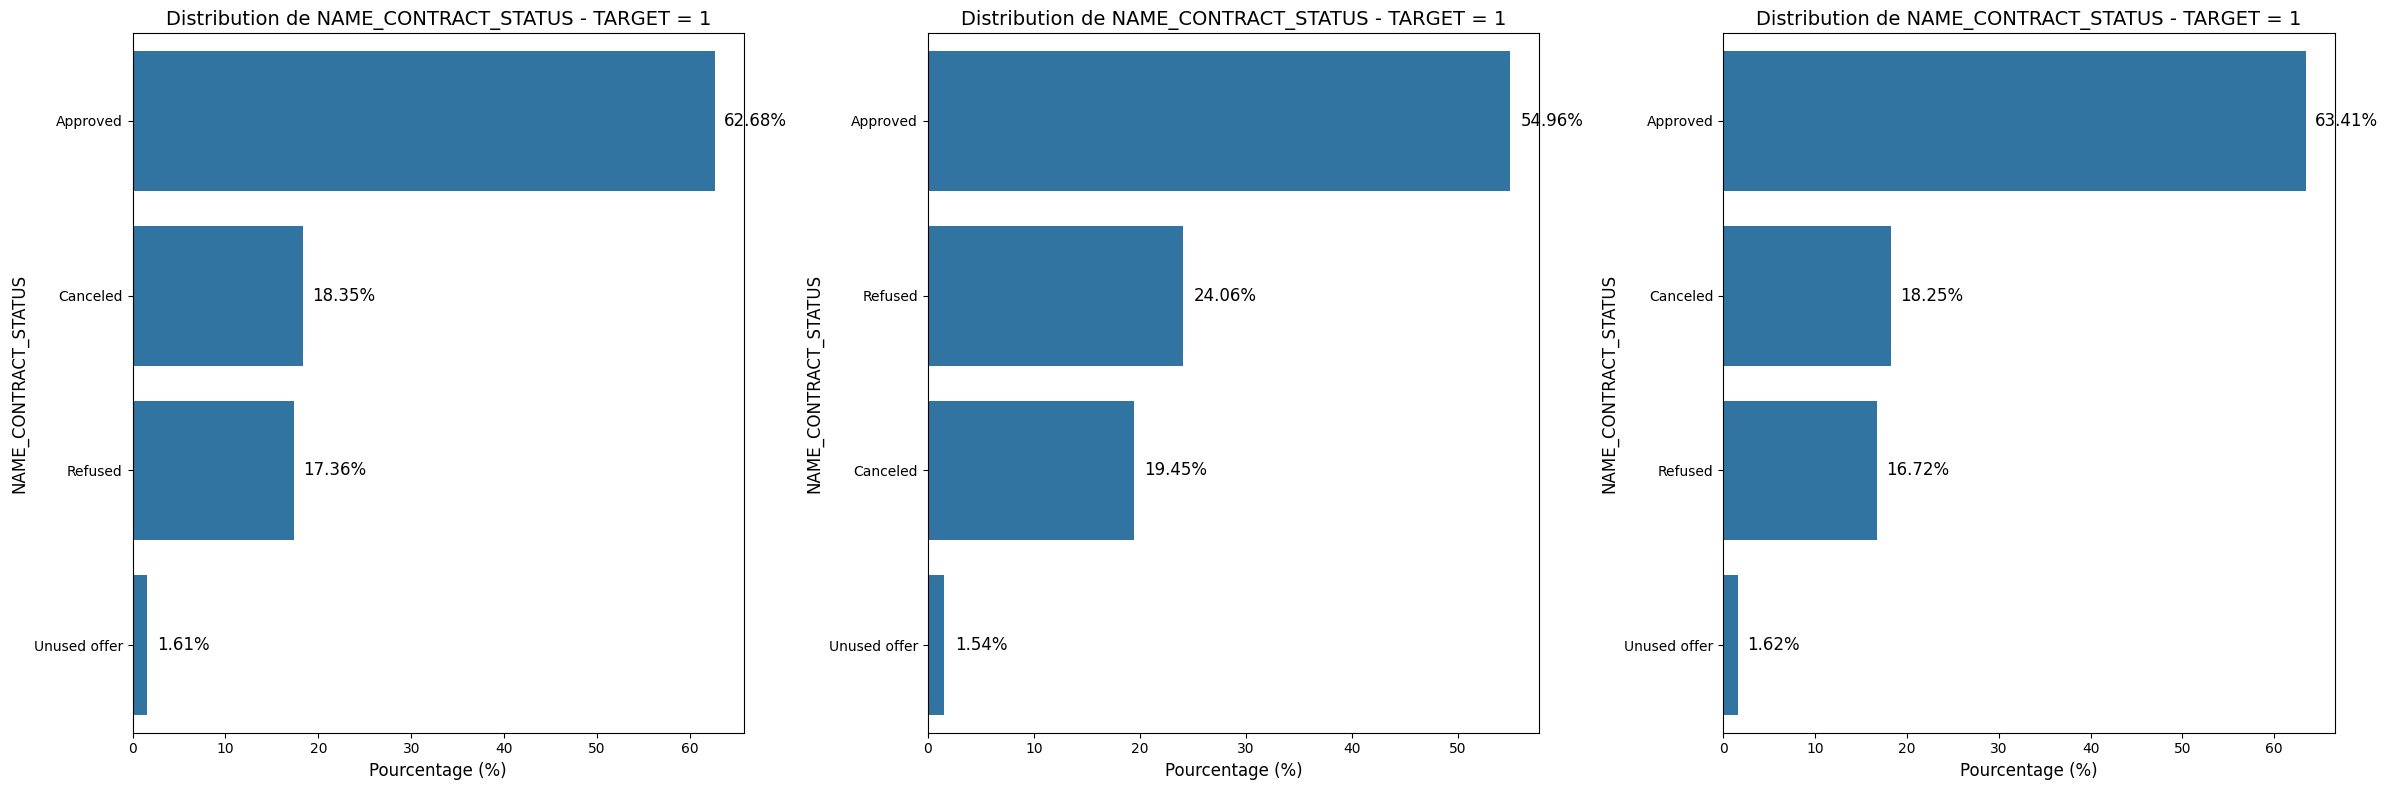

In [175]:
tracer_distribution_variable_en_pourcentage(previous_application_target, "NAME_CONTRACT_STATUS", target_col='TARGET')

### <div class="alert alert-info"><font color='dimgray'>IV.10 Aperçu général: jeu de données sample_submission </font> </div>

In [176]:
print('Taille de jeu de données: ', sample_submission.shape)
sample_submission.head()

Taille de jeu de données:  (48744, 2)


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

<div class="alert alert-success">
 
La base de données **sample_submission** sert d'exemple illustratif pour montrer le format attendu de la base de données des résultats soumis.
    
</div>

In [177]:
sample_submission.describe()

SK_ID_CURR   TARGET
count   48744.000000  48744.0
mean   277796.676350      0.5
std    103169.547296      0.0
min    100001.000000      0.5
25%    188557.750000      0.5
50%    277549.000000      0.5
75%    367555.500000      0.5
max    456250.000000      0.5

In [178]:
test_remplissage(sample_submission)

Taux de remplissage  Nombre de valeurs manquantes
SK_ID_CURR                100.0                             0
TARGET                    100.0                             0

### <div class="alert alert-info"><font color='dimgray'>IV.3 Regroupement et préparation de données </font> </div>

<div class="alert alert-success">
 
Dans le contexte de Kaggle, un "kernel" est un notebook Jupyter partagé par les utilisateurs sur la plateforme Kaggle. Ces kernels peuvent inclure des analyses exploratoires, des visualisations, du prétraitement des données, du feature engineering, des modèles de machine learning, des prédictions, et plus encore.
    
**L'intérêt d'utiliser un kernel de Kaggle est multiple :**

- **Gagner du temps :** Les kernels offrent souvent des solutions déjà éprouvées et des approches créatives que vous pouvez réutiliser plutôt que de partir de zéro.
    
- **S'inspirer pour améliorer les performances :** Les kernels avec de bons scores de performance peuvent vous donner des idées pour améliorer vos propres modèles.
    
</div>

<div class="alert alert-success">
 
Pour cette étape, je me base sur les kernels Kaggle suivants : 

- https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook
- https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script
    
</div>

<div class="alert alert-success">
 
L'Exploration de Données est une étape importante où l'on réalise des calculs statistiques et crée des graphiques pour identifier des tendances ou liens au sein des données. 
 
Le but de l'ED est de comprendre les enseignements que nos données peuvent apporter. Ce processus débute souvent par un aperçu global avant de se focaliser progressivement sur des aspects spécifiques.
</div


<div class="alert alert-success">
 
Il y a un total de **10 fichiers** :

- 1 fichier principal pour l'entraînement (avec la Target);
- 1 fichier principal pour le test (sans la Target);
- 1 fichier de soumission d'exemples;
- 7 autres fichiers contenant des informations supplémentaires sur chaque prêt.
</div

In [179]:
data_files ='C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/'

In [180]:
data_files

'C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/home-credit-default-risk/'

### <div class="alert alert-info"><font color='dimgray'>IV.3.1 Importation des bibliothèques nécessaires </font> </div>

In [181]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [182]:
# Ignorer les avertissements de catégorie FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-success">
 
**Jointure des tables**
    
Toutes les tables sont jointes à la DataFrame principale (application_train/test) en utilisant la clé **SK_ID_CURR**, à l'exception de **bureau_balance**. Cela signifie que les données de différentes sources sont fusionnées en se basant sur l'identifiant unique du client pour créer un ensemble de données complet.
</div>

In [183]:
# Fonction pour mesurer le temps d'exécution d'un bloc de code
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

In [184]:
# Fonction pour l'encodage one-hot des variables catégorielles
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, dtype='uint8')
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

### <div class="alert alert-info"><font color='dimgray'>IV.3.2 Prétraitement des données d'application Train/Test </font> </div>

<div class="alert alert-success">
 
**Etapes que nous prévoyons d'effectuer sur le dataset application_train/test :**
    
    

**Supprimer les entrées où CODE_GENDER est égal à "XNA" :** Il s'agit d'éliminer les lignes du dataset où la colonne CODE_GENDER (sexe du demandeur) a la valeur "XNA", qui est probablement une valeur manquante ou non applicable.

**Encoder en binaire les variables**: NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY et EMERGENCY_STATE_MODE : Ces colonnes seront transformées en utilisant un encodage binaire, où chaque variable catégorielle avec deux catégories possibles sera représentée par 0 ou 1, plutôt que par des chaînes de caractères.

**Encoder en One-hot les autres variables catégorielles :** Pour les autres variables catégorielles du dataset, un encodage One-hot sera appliqué. Cela signifie que chaque catégorie unique dans chaque variable sera transformée en une nouvelle colonne binaire.

**Créer 5 nouvelles variables :** Ajouter cinq nouvelles variables au dataset, en se basant probablement sur les données existantes, pour enrichir l'ensemble de données avec de nouvelles informations qui pourraient améliorer les performances de modèles prédictifs ultérieurs:
    
    
**1 DAYS_EMPLOYED_PERC (Pourcentage de jours employés) :** Cette variable représente le rapport entre le nombre de jours employés (DAYS_EMPLOYED) et l'âge du client en jours (DAYS_BIRTH). Cela permet d'évaluer la proportion de la vie d'un client passée en emploi.

**2 INCOME_CREDIT_PERC (Pourcentage du revenu sur crédit) :** Il s'agit du rapport entre le revenu total du client (AMT_INCOME_TOTAL) et le montant du crédit (AMT_CREDIT). Cette variable permet de mesurer la charge de crédit par rapport au revenu total du client.

**3 INCOME_PER_PERSON (Revenu par personne) :** Cette variable calcule le revenu total du client (AMT_INCOME_TOTAL) divisé par le nombre de membres de la famille (CNT_FAM_MEMBERS). Elle donne une idée du revenu disponible par personne au sein du foyer.

**4 ANNUITY_INCOME_PERC (Pourcentage de l'annuité sur le revenu) :** Ce rapport entre le montant de l'annuité (AMT_ANNUITY) et le revenu total (AMT_INCOME_TOTAL) indique la part du revenu annuel du client consacrée au paiement de l'annuité.

**5 PAYMENT_RATE (Taux de paiement) :** Il représente le rapport entre le montant de l'annuité (AMT_ANNUITY) et le montant du crédit (AMT_CREDIT). Cette variable reflète la vitesse à laquelle le client rembourse le crédit en termes de pourcentage du montant total du crédit.
</div>

In [185]:
application_train['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [186]:
# Fonction de prétraitement pour application_train.csv et application_test.csv
def application_train_test(num_rows = None, nan_as_category = False):
    # Charger les données d'application
    df = pd.read_csv(f"{data_files}{'application_train.csv'}", nrows= num_rows)
    test_df = pd.read_csv(f"{data_files}{'application_test.csv'}", nrows= num_rows)
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    #Jointure application_train et application_test
    df = pd.concat([df, test_df], ignore_index=True)
    
    # Filtre des XNA sur la variable CODE_GENDER
    count_xna = df[df['CODE_GENDER'] == 'XNA'].index
    print("CODE_GENDER: {} observations (XNA) sont identifiées".format(len(count_xna)))
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Sélection des colonnes qui ne sont pas de type numérique
    bin_features = [col for col in application_train.select_dtypes(include=['category']).columns 
                if application_train[col].nunique() == 2 
                and all(isinstance(cat, str) for cat in application_train[col].cat.categories)]
    print("Binary features with string values = ", bin_features)
    
    # Encodage des colonnes avec variables Binaires
    for bin_feature in bin_features:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    
    # Encodage one-hot des variables catégorielles
    df, cat_cols = one_hot_encoder(df, nan_as_category)

    # Création de nouvelles caractéristiques (ratios et pourcentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    
    return df

### <div class="alert alert-info"><font color='dimgray'>IV.3.3 Prétraitement des données de bureau et bureau_balance </font> </div>

<div class="alert alert-success">
 
**Etapes que nous prévoyons d'effectuer sur le dataset bureau et bureau_balance :**

**Encoder en One-hot les variables catégorielles :** Appliquer l'encodage One-hot aux variables catégorielles des datasets. Cela consiste à transformer chaque catégorie unique d'une variable en une nouvelle colonne binaire, permettant ainsi une meilleure intégration de ces variables dans des modèles d'analyse.

**Fusionner bureau_balance avec bureau en utilisant SK_ID_BUREAU :** Joindre le dataset bureau_balance au dataset bureau en se basant sur la clé SK_ID_BUREAU. Cette étape vise à enrichir les informations disponibles dans le dataset bureau avec les données de balance contenues dans bureau_balance.

**Fusionner bureau avec application_train en utilisant SK_ID_CURR :** Joindre le dataset bureau, qui inclut maintenant les informations de bureau_balance, au dataset application_train en se basant sur l'identifiant du client (SK_ID_CURR). Cette étape permet d'associer les informations relatives aux antécédents de crédit du client avec ses données de demande de prêt actuelles.
</div>

In [187]:
# Fonction de prétraitement pour bureau.csv et bureau_balance.csv
def bureau_and_balance(num_rows = None, nan_as_category = True):
    # Charger les données de bureau
    bureau = pd.read_csv(f"{data_files}{'bureau.csv'}", nrows = num_rows)
    bb = pd.read_csv(f"{data_files}{'bureau_balance.csv'}", nrows = num_rows)
    
    # Encodage one-hotdes variables catégorielles de bureau_balance et bureau :
    bb, bb_cat = one_hot_encoder(bb, nan_as_category=True)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=True)
    
    # Agrégation des données de bureau_balance et fusion avec bureau
    bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    for col in bb_cat:
        bb_aggregations[col] = ['mean']
    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    
    # Création d'un dictionnaire d'aggrégation pour les variables numériques de bureau :
    num_aggregations = {
        'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['max', 'mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'MONTHS_BALANCE_MIN': ['min'],
        'MONTHS_BALANCE_MAX': ['max'],
        'MONTHS_BALANCE_SIZE': ['mean', 'sum']
    }
        
        
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    # Aggrégation de bureau en fonction de la variable 'SK_ID_CURR' :   
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    
    #Création de variables spécifiques pour les crédits Actifs (utilisation uniquement des variables numériques)
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    
    
    
    # Création de variables spécifiques pour les crédits clôturés (utilisation uniquement des variables numériques)
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg


### <div class="alert alert-info"><font color='dimgray'>IV.3.4 Prétraitement des données de previous_applications </font> </div>

<div class="alert alert-success">
 
**Etapes que nous prévoyons d'effectuer sur le dataset previous_applications :**
    
**Remplacer les valeurs anormales des variables DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE et DAYS_TERMINATION  par NaN** : Toutes les valeurs considérées comme anormales dans les colonnes commençant par DAYS_ (qui représentent typiquement le nombre de jours depuis un certain événement) seront remplacées par des valeurs NaN (Not a Number), indiquant des données manquantes ou non valides.

**Créer une fonctionnalité : APP_CREDIT_PERC ** : Calculer et ajouter une nouvelle variable nommée APP_CREDIT_PERC. Cette variable représentera le pourcentage du montant du crédit demandé par rapport au montant du crédit approuvé dans l'application, offrant ainsi un aperçu de la proportion du crédit demandé qui est effectivement accordé.

**Encoder en One-hot les variables catégorielles** : Appliquer l'encodage One-hot aux variables catégorielles présentes dans les datasets. Cette méthode transforme chaque catégorie unique d'une variable en une colonne distincte avec des valeurs binaires (0 ou 1), facilitant l'utilisation de ces variables dans des analyses ultérieures.

**Fusionner avec application_train en utilisant l'SK_ID_CURR** 

</div>

In [188]:
# Preprocess previous_applications.csv
def previous_applications(num_rows = None, nan_as_category = True):
    #Récupération du fichier
    prev = pd.read_csv(f"{data_files}{'previous_application.csv'}", nrows = num_rows)
    
    #Encodage des variables catégorielles : 
    prev, cat_cols = one_hot_encoder(prev, nan_as_category= True)
    
    #  Gestion des jours égals à 365243 : mise à valeur = nan
    prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    
    # réation d'une nouvelle variable : (pourcentage - valeur demandé / valeur reçue)
    prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
    
    
    # Création d'un dictionnaire d'aggrégation pour les variables numériques de previous :
    num_aggregations = {
        'AMT_ANNUITY': ['min', 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'max', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
    
    
    # Création d'un dictionnaire d'aggrégation pour les variables catgorielles de previous : 
    cat_aggregations = {}
    for cat in cat_cols:
        cat_aggregations[cat] = ['mean']
    
    #Aggrégation de previous en fonction de la variable 'SK_ID_CURR' :
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    
    
    # Création de variables spécifiques pour les candidatures approuvées (utilisation uniquement des variables numériques)
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    
    
    
    # Création de variables spécifiques pour les candidatures refusées (utilisation uniquement des variables numériques)
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg

### <div class="alert alert-info"><font color='dimgray'>IV.3.5 Prétraitement des données de POS_CASH_balance </font> </div>

<div class="alert alert-success">
 
**Etapes que nous prévoyons d'effectuer sur le dataset POS_CASH_balance :**

**Encoder en One-hot les variables catégorielles** : Appliquer l'encodage One-hot sur les variables catégorielles des datasets. Cet encodage consiste à transformer chaque catégorie d'une variable en une colonne distincte de valeurs binaires (0 ou 1), ce qui facilite l'analyse statistique et la modélisation.

**Créer la variable: POS_COUNT ** : Calculer et ajouter une nouvelle variable POS_COUNT qui représente le nombre de comptes de paiement ou comptes de liquidité disponibles pour le client. Cette fonctionnalité vise à fournir un aperçu du nombre de transactions ou de crédits en cours dans le cadre de paiements.

**Fusionner pos_cash_balance avec application_train** 
</div>

In [189]:
# Preprocess POS_CASH_balance.csv
def pos_cash(num_rows = None, nan_as_category = True):
    
    #Récupération du fichier :
    pos = pd.read_csv(f"{data_files}{'POS_CASH_balance.csv'}", nrows = num_rows)
    
    #Encodage des variables catégorielles de pos_cash: 
    pos, cat_cols = one_hot_encoder(pos, nan_as_category= True)
    
    # Création d'un dictionnaire d'aggrégation pour pos_cash : 
    aggregations = {
        'MONTHS_BALANCE': ['max', 'mean', 'size'],
        'SK_DPD': ['max', 'mean'],
        'SK_DPD_DEF': ['max', 'mean']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
    
    #Aggrégation de pos_cash en fonction de la variable 'SK_ID_CURR' : 
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    
    # Création de la variables 'POS_COUNT' (nombre de dépôt effectué par le demandeur)
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg

### <div class="alert alert-info"><font color='dimgray'>IV.3.6 Prétraitement des données de  installments_payments </font> </div>

<div class="alert alert-success">
 
**Encoder en One-hot les variables catégorielles :** Procéder à l'encodage One-hot des variables catégorielles présentes dans les datasets. Cette technique transforme chaque catégorie d'une variable en une colonne séparée contenant des valeurs binaires (0 ou 1), simplifiant ainsi les analyses statistiques et le processus de modélisation.

**Ajouter quatre nouvelles variables :**

- PAYMENT_PERC : Créer une variable calculant le pourcentage de paiement, qui exprime la proportion du paiement effectué par rapport au montant dû.
    
- PAYMENT_DIFF : Introduire une variable représentant la différence de paiement, soit l'écart entre le montant payé et le montant initialement prévu.
    
- DPD : Ajouter une variable mesurant le nombre de jours de retard sur le paiement d'une échéance.
    
- DBD : Générer une variable calculant le nombre de jours avant l'arrivée à échéance d'un paiement.
    
Ajouter la variable : INSTAL_COUNT : Déterminer et ajouter une nouvelle variable INSTAL_COUNT pour comptabiliser le nombre de comptes associés à des échéances de paiement, offrant une vue d'ensemble sur le volume de transactions ou de crédits en cours impliquant des paiements échelonnés.

**Fusionner installments_payments avec application_train** 
</div>

In [190]:
# Preprocess installments_payments.csv
def installments_payments(num_rows = None, nan_as_category = True):
    
    #Récupération du fichier :
    ins = pd.read_csv(f"{data_files}{'installments_payments.csv'}", nrows = num_rows)
    
    #Encodage des variables catégorielles de pos_cash: 
    ins, cat_cols = one_hot_encoder(ins, nan_as_category= True)
    
    # Création de nouvelles variables : (Pourcentage et différence payés à chaque versement) 
    ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
    ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    
    # Créaton des variables DPD et DBD :
    
    """
    DPD (days past due) : nombre de jours de retard dans le paiement. 
    DBD (days before due) : nombre de jours restants avant la date prévue de paiement. 

    Supression des valeurs négatives (mise à O).
    """
    
    ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
    ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
    ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    
    # Création d'un dictionnaire d'aggrégation pour installments : 
    aggregations = {
        'NUM_INSTALMENT_VERSION': ['nunique'],
        'DPD': ['max', 'mean', 'sum'],
        'DBD': ['max', 'mean', 'sum'],
        'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
        'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
        'AMT_INSTALMENT': ['max', 'mean', 'sum'],
        'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
        'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    }
    for cat in cat_cols:
        aggregations[cat] = ['mean']
        
    # Aggrégation de installments en fonction de la variable 'SK_ID_CURR' :     
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    
    # Création de la variables 'INSTAL_COUNT' (nombre de versemant effectué par le demandeur)
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg

### <div class="alert alert-info"><font color='dimgray'>IV.3.7 Prétraitement des données de credit_card_balance </font> </div>

<div class="alert alert-success">
 
**Encoder en One-hot les variables catégorielles :** Appliquer l'encodage One-hot sur les variables catégorielles des datasets. Cette méthode consiste à transformer chaque catégorie unique d'une variable en une colonne individuelle de valeurs binaires (0 ou 1), rendant l'analyse statistique et le processus de modélisation plus aisés et plus efficaces.

**Ajouter la variable : CC_COUNT (nombre de comptes de cartes de crédit) :** Calculer et intégrer une nouvelle variable nommée CC_COUNT qui indique le nombre de comptes de cartes de crédit associés à chaque client. 

**Fusionner credit_card_balance avec application_train** 
</div>

In [191]:
# Preprocess credit_card_balance.csv
def credit_card_balance(num_rows = None, nan_as_category = True):
    
    #Récupération du fichier : 
    cc = pd.read_csv(f"{data_files}{'credit_card_balance.csv'}", nrows = num_rows)
    
    #Encodage des variables catégorielles de credit_card_balance:
    cc, cat_cols = one_hot_encoder(cc, nan_as_category= True)
    
    # Suppression de 'SK_ID_PREV' :
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)

    # Aggrégation de credit_card :
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    
    # Création de la variables 'CC_COUNT' (nombre de carte de crédit par demandeur)
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg

### <div class="alert alert-info"><font color='dimgray'>IV.3.8 Fonction principale </font> </div>

<div class="alert alert-success">
 
La fonction **main** est une fonction centrale qui orchestre le processus de prétraitement et de fusion de divers jeux de données en un seul ensemble de données consolidé pour la modélisation. 
    
</div>

In [192]:
def main(debug = False):
    # Si le mode debug est activé, ne traitez que 10000 lignes, sinon traitez toutes les lignes
    num_rows = 10000 if debug else None

    # Chargez et prétraitez les données d'application
    df = application_train_test(num_rows)

    # Traitement des données de bureau et bureau_balance
    with timer("Process bureau and bureau_balance"):
        # Chargez et prétraitez les données de bureau
        bureau = bureau_and_balance(num_rows)
        print("Bureau df shape:", bureau.shape)
        # Joignez les données de bureau au dataframe principal
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        # Libérez la mémoire en supprimant le dataframe bureau
        del bureau
        # libérer de la mémoire
        gc.collect()

    # Traitement des données de previous_applications
    with timer("Process previous_applications"):
        # Chargez et prétraitez les données de previous_applications
        prev = previous_applications(num_rows)
        print("Previous applications df shape:", prev.shape)
        # Joignez les données de previous_applications au dataframe principal
        df = df.join(prev, how='left', on='SK_ID_CURR')
        # Libérez la mémoire en supprimant le dataframe prev
        del prev
        # libérer de la mémoire
        gc.collect()

    # Traitement des données POS-CASH balance
    with timer("Process POS-CASH balance"):
        # Chargez et prétraitez les données POS-CASH balance
        pos = pos_cash(num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        # Joignez les données POS-CASH balance au dataframe principal
        df = df.join(pos, how='left', on='SK_ID_CURR')
        # Libérez la mémoire en supprimant le dataframe pos
        del pos
        # libérer de la mémoire
        gc.collect()

    # Traitement des données de installments_payments
    with timer("Process installments payments"):
        # Chargez et prétraitez les données de installments_payments
        ins = installments_payments(num_rows)
        print("Installments payments df shape:", ins.shape)
        # Joignez les données de installments_payments au dataframe principal
        df = df.join(ins, how='left', on='SK_ID_CURR')
        # Libérez la mémoire en supprimant le dataframe ins
        del ins
        # libérer de la mémoire
        gc.collect()

    # Traitement des données de credit_card_balance
    with timer("Process credit card balance"):
        # Chargez et prétraitez les données de credit_card_balance
        cc = credit_card_balance(num_rows)
        print("Credit card balance df shape:", cc.shape)
        # Joignez les données de credit_card_balance au dataframe principal
        df = df.join(cc, how='left', on='SK_ID_CURR')
        # Libérez la mémoire en supprimant le dataframe cc
        del cc
        # libérer de la mémoire
        gc.collect()

    # Retournez le dataframe final après le prétraitement et la fusion de toutes les sources de données
    return df


In [193]:
# Exécution de la fonction principale main avec le mode debug désactivé
df_merged = main(False)

Train samples: 307511, test samples: 48744
CODE_GENDER: 4 observations (XNA) sont identifiées
Binary features with string values =  ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 29s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 40s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 18s
Installments payments df shape: (339587, 26)
Process installments payments - done in 37s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 21s


<div class="alert alert-success">
 
- **main(False)**: Cette ligne appelle la fonction main avec l'argument debug défini sur False. Cela signifie que la fonction main va exécuter le traitement complet des données (c'est-à-dire, elle traitera toutes les lignes des fichiers de données, et non pas seulement un sous-ensemble restreint pour le débogage rapide). 

- Le résultat de **main(False)** (qui est un DataFrame pandas) est assigné à la variable **df_merged**. Ce DataFrame résultant est une fusion des différents jeux de données traités (comme application_train, bureau, previous_applications, etc.) avec les prétraitements et agrégations appliqués.
</div>

### <div class="alert alert-info"><font color='dimgray'>IV.3.9 Exportons les données fusionnées </font> </div>

In [194]:
df_merged.shape

(356251, 796)

In [195]:
df_merged.to_csv('df_merged.csv', index=False)

In [196]:
import joblib

In [197]:
def enregistrement_joblib(name, chemin, data):
    """
    Sérialise les données dans un fichier en utilisant Joblib.

    Args:
        name (str): Le nom du fichier (sans l'extension).
        chemin (str): Le chemin du répertoire où enregistrer le fichier.
        data: Les données à sérialiser.

    Returns:
        str: Le chemin complet du fichier créé.
    """
    path = chemin + '/' + name + '.joblib'

    try:
        joblib.dump(data, path)
        return path
    except Exception as e:
        return str(e)


In [198]:
data_to_serialize = df_merged
file_path = enregistrement_joblib('mes_donnees', 'C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7', data_to_serialize)
print(f"Les données ont été sérialisées dans le fichier : {file_path}")

Les données ont été sérialisées dans le fichier : C:/Users/belaziw/Desktop/Dossier_Alternance_BELAZI-Walid/Librable_Projet_OpenClassRooms/Projet 7/mes_donnees.joblib
